# **Handling Data with Duplicates**

**Importing important Libraries**

In [1]:
import time
start = time.time()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

In [3]:
from wordcloud import WordCloud
from textblob import TextBlob
from nltk import word_tokenize,sent_tokenize

In [4]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['ner'])
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
import warnings
warnings.filterwarnings('ignore')
end = time.time()
print(f'Importing Libraries took {(end - start)/(6 * 4)} seconds per parameter attempt')

Importing Libraries took 1.1424838105837505 seconds per parameter attempt


**Mounting Google Drive**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading the Dataset**

In [7]:
data=pd.read_csv('/content/drive/MyDrive/Biomedical Data - Cancer.csv', encoding="latin-1" )

In [8]:
data.head()

Unnamed: 0               0  \
0           0  Thyroid_Cancer   
1           1  Thyroid_Cancer   
2           2  Thyroid_Cancer   
3           3  Thyroid_Cancer   
4           4  Thyroid_Cancer   

                                                   a  
0  Thyroid surgery in  children in a single insti...  
1  " The adopted strategy was the same as that us...  
2  coronary arterybypass grafting thrombosis ï¬b...  
3   Solitary plasmacytoma SP of the skull is an u...  
4   This study aimed to investigate serum matrix ...

**Retrieving the Dataset Information**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7570 non-null   int64 
 1   0           7570 non-null   object
 2   a           7570 non-null   object
dtypes: int64(1), object(2)
memory usage: 177.5+ KB


**Checking the shape of the Dataset**

In [10]:
data.shape

(7570, 3)

**Checking for any null values in the Dataset**

In [11]:
data.isna().sum()

Unnamed: 0    0
0             0
a             0
dtype: int64

**Pre-processing the Dataset**

In [12]:
#Removing the unnecassary columns in the dataset
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.head().style.background_gradient(cmap='winter')

In [13]:
#Renaming the column names
data.rename({'0':'Label','a':'Text'},axis=1,inplace=True)

In [14]:
data.head()

Label                                               Text
0  Thyroid_Cancer  Thyroid surgery in  children in a single insti...
1  Thyroid_Cancer  " The adopted strategy was the same as that us...
2  Thyroid_Cancer  coronary arterybypass grafting thrombosis ï¬b...
3  Thyroid_Cancer   Solitary plasmacytoma SP of the skull is an u...
4  Thyroid_Cancer   This study aimed to investigate serum matrix ...

In [15]:
data['Label'].value_counts()/data['Label'].count()*100

Thyroid_Cancer    37.120211
Colon_Cancer      34.081902
Lung_Cancer       28.797886
Name: Label, dtype: float64

**Exploratory Data Analysis on the Dataset**

In [16]:
#Checking the data columns
data.columns

Index(['Label', 'Text'], dtype='object')

In [17]:
data['Label'].unique()

array(['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer'], dtype=object)

In [18]:
data[data.Label=='Lung_Cancer'].Text[539]

'"We lack biomarkers for identifying aggressive primary tumor subsets that give rise to metastases and impact early cancer detection and treatment. Many solid tumors are known to accumulate hyaluronan (HA) a glycosaminoglycan which is also produced by the tumor cells themselves. We report a quantitative approach for uncovering breast cancer heterogeneity using fluorescent HA to detect differential binding patterns to CD44 and RHAMM/HMMR receptors. This approach permits identification of tumor-cell subsets that bind high levels of HA and may be applicable to other ligands/receptors and disease models. Despite representing the invasive/metastatic subset of parental tumors unexpectedly the high HA-binding subset was slow-growing and is thus likely to be a source of dormancy and relapse. Tumor heterogeneity confounds cancer diagnosis and the outcome of therapy necessitating analysis of tumor cell subsets within the tumor mass. Elevated expression of hyaluronan (HA) and HA receptors recepto

In [19]:
#Counting the label values in the Dataset
label=data['Label'].value_counts()
label

Thyroid_Cancer    2810
Colon_Cancer      2580
Lung_Cancer       2180
Name: Label, dtype: int64

**Pie Chart**

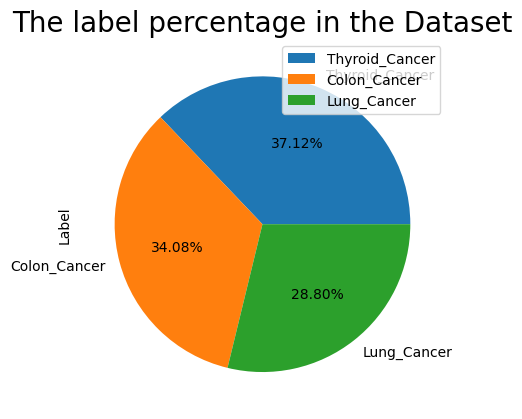

In [20]:
data['Label'].value_counts().plot(kind='pie',autopct="%1.2f%%")
plt.legend()
plt.title("The label percentage in the Dataset",fontsize=20)
plt.show()

**Bar Chart**

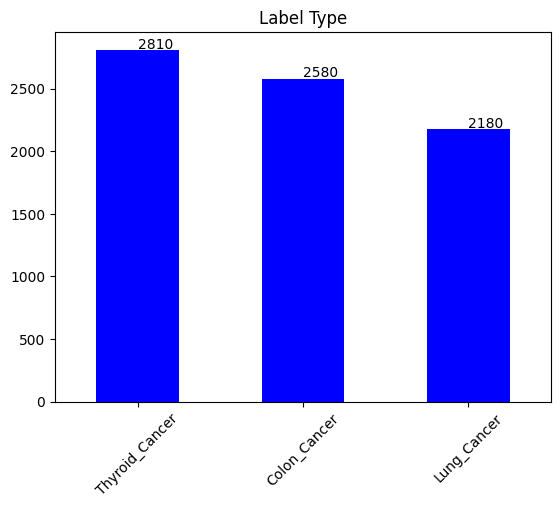

In [21]:
data['Label'].value_counts().plot(kind='bar',color='Blue')
plt.title("Label Type")
plt.xticks(rotation=45)
for i,v in enumerate(data['Label'].value_counts()):
    plt.text(i,v+10,str(v),fontweight='light')
plt.show()

**Kernel distribution of number of words**

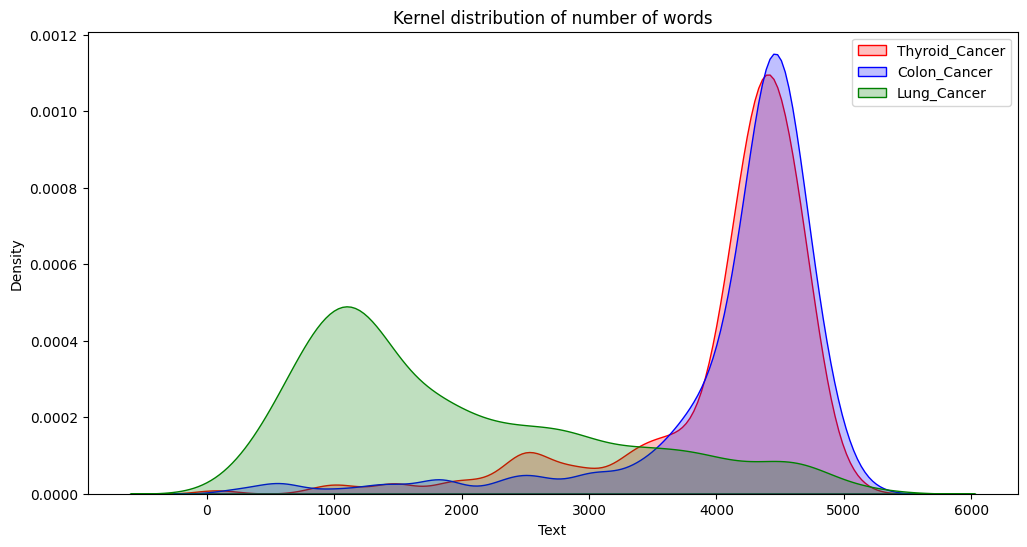

In [22]:
num_1 = data[data['Label']== 'Thyroid_Cancer']['Text'].apply(lambda x: len(x.split()))
num_2 = data[data['Label']== 'Colon_Cancer']['Text'].apply(lambda x: len(x.split()))
num_3 = data[data['Label']== 'Lung_Cancer']['Text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12,6))
sns.kdeplot(num_1, shade=True, color = 'red').set_title('Kernel distribution of number of words')
sns.kdeplot(num_2, shade=True, color = 'blue')
sns.kdeplot(num_3, shade=True, color = 'green')

plt.legend(labels=['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer'])
plt.show()

**Word Cloud**

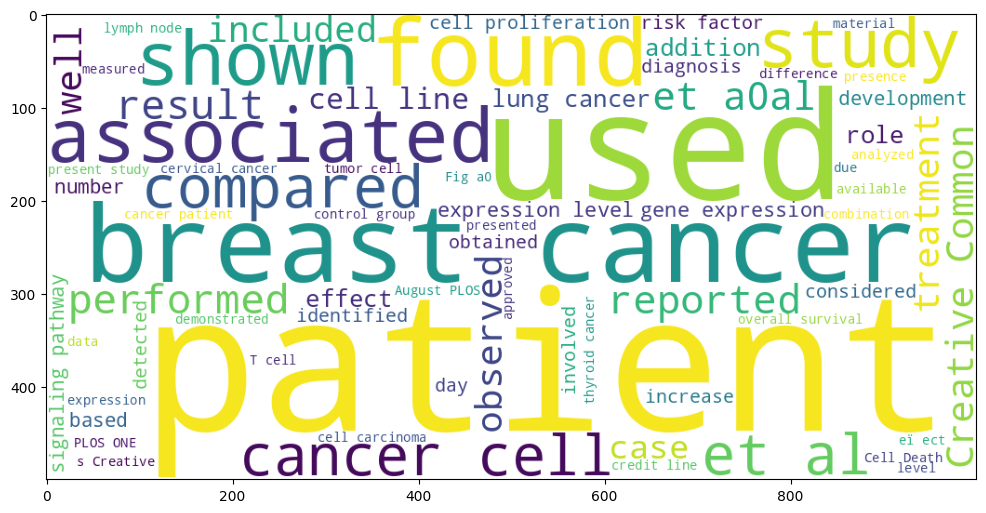

In [23]:
#Visualizing the WordCloud for Thyroid_Cancer from the dataset
plt.figure(figsize=(12,15))
wc=WordCloud(height=500,width=1000,min_font_size=10,background_color='White')
w_c= wc.generate(data[data['Label']=='Thyroid_Cancer']['Text'].str.cat(sep=" "))
plt.imshow(w_c)


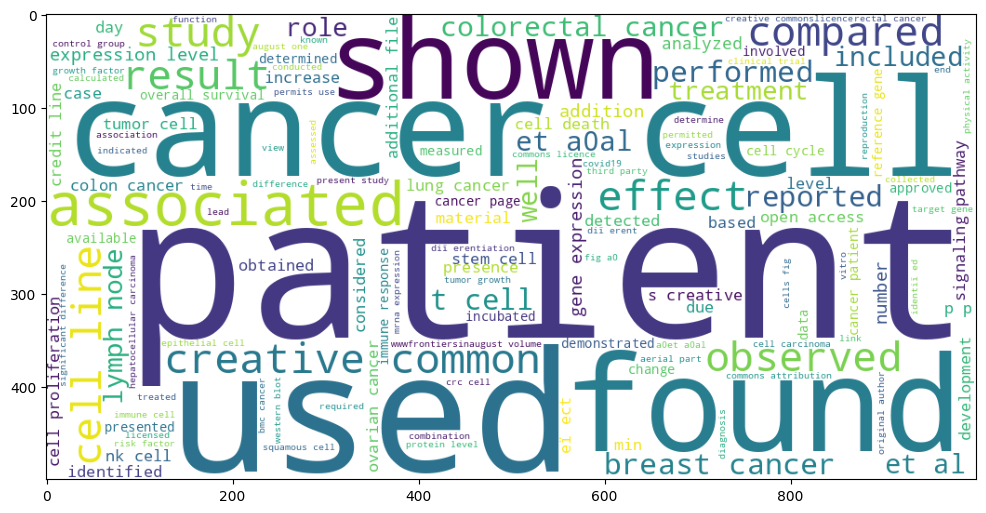

In [24]:
#Visualizing the WordCloud for Colon_Cancer from the dataset
plt.figure(figsize=(12,15))
wc=WordCloud(height=500,width=1000,min_font_size=10,background_color='White')
wc_1=wc.generate(data[data['Label']=='Colon_Cancer']['Text'].str.cat(sep=" "))
plt.imshow(wc_1)

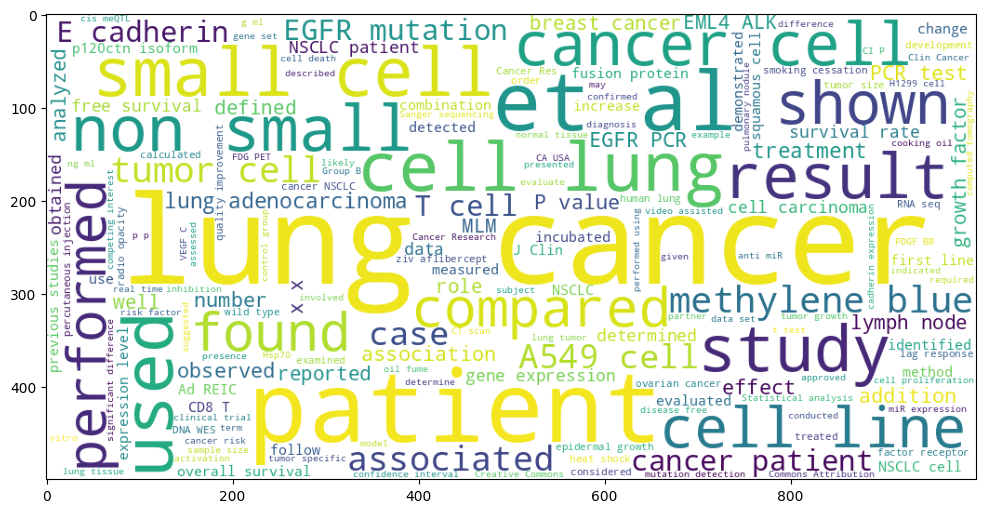

In [25]:
#Visualizing the WordCloud for Lung_Cancer from the dataset
plt.figure(figsize=(12,15))
wc=WordCloud(height=500,width=1000,min_font_size=10,background_color='White')
wc_2=wc.generate(data[data['Label']=='Lung_Cancer']['Text'].str.cat(sep=" "))
plt.imshow(wc_2)

**DATA PREPROCESSING**

**Removing the numbers in the dataset**

In [26]:
#Define the function for remove the numbers in the dataset
start = time.time()
def remove_number(text):
 #Create loop for remove the digits in the dataset
 text="".join([i for i in text if not i.isdigit()])
 #Return to the dataset
 return text
#Apply the above function to the dataset
data['Text']=data['Text'].apply(remove_number)

**Cleaning the text**

In [27]:
#Define the function to clean the text
def clean_text(text):
 pattern = r'[^a-zA-Z\s]'
 text=re.sub(pattern,'',text)
 return text
#Apply to the function to the dataset
data['Text']=data['Text'].apply(clean_text)

**Removing the stopwords**

In [28]:
#Create function to the remove the stopwods
import nltk
nltk.download('stopwords')
names = ['Colon_Cancer', 'Lung_Cancer', 'Thyroid_Cancer']
def clean_stop(text):
  stop_words = stopwords.words('english')
  for name in names:
    stop_words.append(name)
  return " ".join([w.lower() for w in text.split() if w.lower() not in stop_words])
#And finally apply the above function to the dataset
data['Text']=data['Text'].apply(clean_stop)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Tokenization**

In [29]:
#Define the tokenize function
nltk.download('punkt')
def tokenize(d):
 return word_tokenize(d)
data['Text']=data['Text'].apply(tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [30]:
data.head()

Label                                               Text
0  Thyroid_Cancer  [thyroid, surgery, children, single, instituti...
1  Thyroid_Cancer  [adopted, strategy, used, prior, years, based,...
2  Thyroid_Cancer  [coronary, arterybypass, grafting, thrombosis,...
3  Thyroid_Cancer  [solitary, plasmacytoma, sp, skull, uncommon, ...
4  Thyroid_Cancer  [study, aimed, investigate, serum, matrix, met...

**Removing Special Characters**

In [31]:
#removing special character
def remove_special_char(list):
    y=[]
    for string in list:
      if string.isalnum():
        y.append(string)
    return y
data['Text']=data['Text'].apply(lambda x:remove_special_char(x))

In [32]:
data.head()

Label                                               Text
0  Thyroid_Cancer  [thyroid, surgery, children, single, instituti...
1  Thyroid_Cancer  [adopted, strategy, used, prior, years, based,...
2  Thyroid_Cancer  [coronary, arterybypass, grafting, thrombosis,...
3  Thyroid_Cancer  [solitary, plasmacytoma, sp, skull, uncommon, ...
4  Thyroid_Cancer  [study, aimed, investigate, serum, matrix, met...

**Stemming process**

In [33]:
#Create a function to the stemming processs
ps=PorterStemmer()
def stemming(list):
    #Create a empty list
    y=[]
    #Create a for loop for text in list
    for text in list:
        #Then i finallay append to the empty list
        y.append(ps.stem(text))
    #then return to the empty list
    return y
data['Text']=data['Text'].apply(lambda x:stemming(x))
#join the words
data['Text']=data['Text'].apply(lambda x:" ".join(x))


In [34]:
end = time.time()
print(f'Tme taken for Pre-processing is {(end - start)/(6 * 4)} seconds')

Tme taken for Pre-processing is 25.697493026653927 seconds


In [35]:
data.to_csv("Processed_Data.csv", index=False)

In [36]:
data.tail()

Label                                               Text
7565  Colon_Cancer  report case yearold man present chief complain...
7566  Colon_Cancer  among synchron colorect cancer scrc report pre...
7567  Colon_Cancer  heterogen cancer cell gener accept astem celll...
7568  Colon_Cancer  adipogenesi process mesenchymalstem cell msc c...
7569  Colon_Cancer  periparturi period one challeng period dairi c...

**Finding total no. of characters,words and sentences**

In [37]:
data['char_count']=data['Text'].apply(len)
data['word_count']=data['Text'].apply(lambda x:len(word_tokenize(x)))
data['sentence_count']=data['Text'].apply(lambda x:len(sent_tokenize(x)))
data

Label                                               Text  \
0     Thyroid_Cancer  thyroid surgeri children singl institut osama ...   
1     Thyroid_Cancer  adopt strategi use prior year base four exclus...   
2     Thyroid_Cancer  coronari arterybypass graft thrombosi brin bri...   
3     Thyroid_Cancer  solitari plasmacytoma sp skull uncommon clinic...   
4     Thyroid_Cancer  studi aim investig serum matrix metalloprotein...   
...              ...                                                ...   
7565    Colon_Cancer  report case yearold man present chief complain...   
7566    Colon_Cancer  among synchron colorect cancer scrc report pre...   
7567    Colon_Cancer  heterogen cancer cell gener accept astem celll...   
7568    Colon_Cancer  adipogenesi process mesenchymalstem cell msc c...   
7569    Colon_Cancer  periparturi period one challeng period dairi c...   

      char_count  word_count  sentence_count  
0          14419        2020               1  
1          11359        1649               1  
2          15621        2102               1  
3          10068        1283               1  
4          17002        2104               1  
...          ...         ...             ...  
7565        8492        1017               1  
7566        6474         844               1  
7567       21882        3068               1  
7568       22365        2769               1  
7569       21500        2982               1  

[7570 rows x 5 columns]

Text(0.5, 1.0, 'The Character count for each Label')

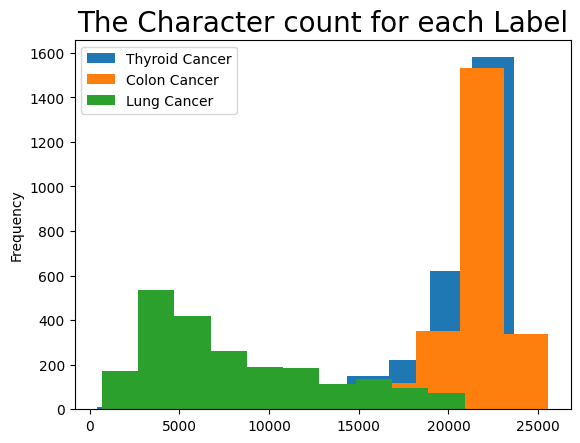

In [38]:
data[data['Label'] == 'Thyroid_Cancer']['char_count'].plot(kind='hist', label='Thyroid Cancer')
data[data['Label'] == 'Colon_Cancer']['char_count'].plot(kind='hist', label='Colon Cancer')
data[data['Label'] == 'Lung_Cancer']['char_count'].plot(kind='hist', label='Lung Cancer')
plt.legend()
plt.title("The Character count for each Label",fontsize=20)

Text(0.5, 1.0, 'The Word count for each Label')

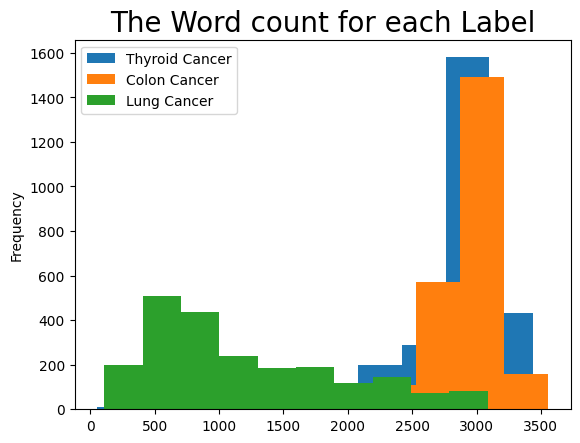

In [39]:
data[data['Label'] == 'Thyroid_Cancer']['word_count'].plot(kind='hist', label='Thyroid Cancer')
data[data['Label']=='Colon_Cancer']['word_count'].plot(kind='hist', label='Colon Cancer')
data[data['Label']=='Lung_Cancer']['word_count'].plot(kind='hist', label='Lung Cancer')
plt.legend()
plt.title("The Word count for each Label",fontsize=20)

Text(0.5, 1.0, 'The Sentence count for each Label')

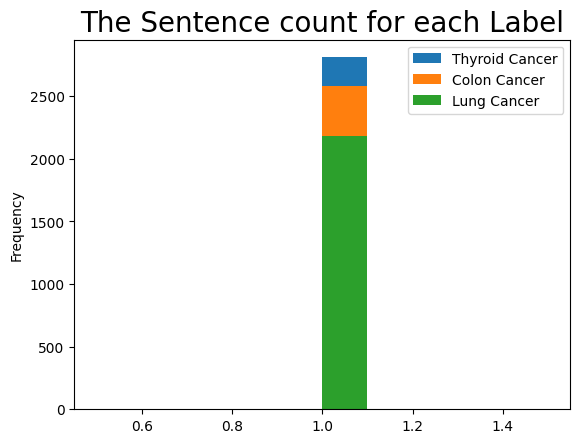

In [40]:
data[data['Label']=='Thyroid_Cancer']['sentence_count'].plot(kind='hist', label='Thyroid Cancer')
data[data['Label']=='Colon_Cancer']['sentence_count'].plot(kind='hist', label='Colon Cancer')
data[data['Label']=='Lung_Cancer']['sentence_count'].plot(kind='hist', label='Lung Cancer')
plt.legend()
plt.title("The Sentence count for each Label",fontsize=20)

In [41]:
data[['word_count','sentence_count','char_count']]

word_count  sentence_count  char_count
0           2020               1       14419
1           1649               1       11359
2           2102               1       15621
3           1283               1       10068
4           2104               1       17002
...          ...             ...         ...
7565        1017               1        8492
7566         844               1        6474
7567        3068               1       21882
7568        2769               1       22365
7569        2982               1       21500

[7570 rows x 3 columns]

**Understanding and Identifying trends, correlations, or potential clusters using sns pairplot**

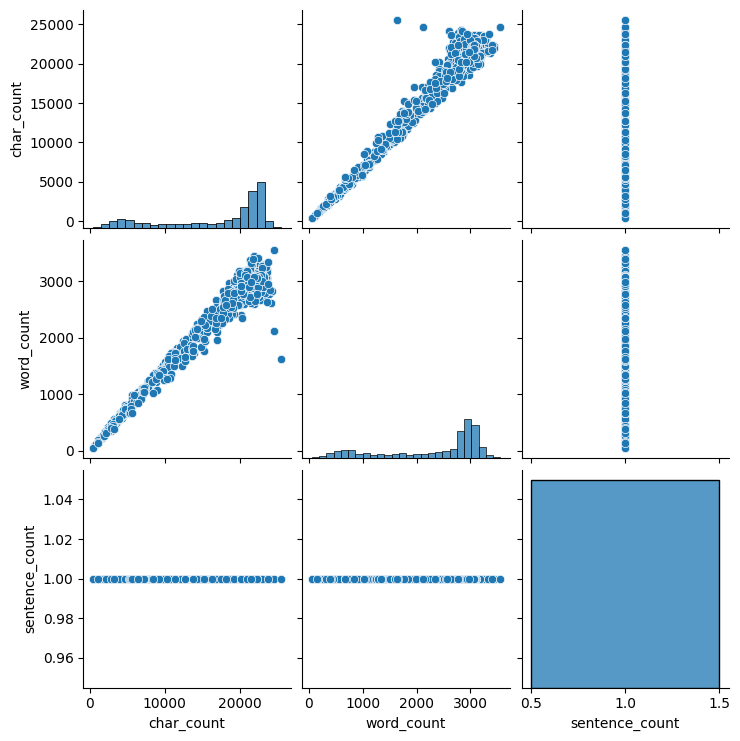

In [42]:
sns.pairplot(data)

**MODEL BUILDING**

In [43]:
#Divided the data into two variables
X=data['Text']
y=data['Label']

In [44]:
#install the TfidfVectorizer
vector=TfidfVectorizer()
#Fit the X data to the TfidfVectorizer
vector.fit(X)
#And transform the
X=vector.transform(X)

In [45]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Logistic Regression**

In [46]:
#Install the logisticregression model
logistic=LogisticRegression()
#And fit the model to the train data
logistic.fit(X_train,y_train)

LogisticRegression()

In [47]:
#Prediction of the logisticregression algorithm
logistic_pred=logistic.predict(X_test)
logistic_pred

array(['Colon_Cancer', 'Colon_Cancer', 'Colon_Cancer', ..., 'Lung_Cancer',
       'Thyroid_Cancer', 'Colon_Cancer'], dtype=object)

In [48]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [49]:
#Check the test score and train score to the logisticregression algorithm
print(f'The Test_accuracy: {logistic.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {logistic.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The Accuracy_score: {accuracy_score(y_test,logistic_pred)*100:.2f}')

The Test_accuracy: 93.29
The Train_accuracy: 95.90
The Accuracy_score: 93.29


**Classification_report and Confusion_matrix**

                precision    recall  f1-score   support

  Colon_Cancer       0.91      0.90      0.90       664
   Lung_Cancer       1.00      1.00      1.00       515
Thyroid_Cancer       0.91      0.91      0.91       714

      accuracy                           0.93      1893
     macro avg       0.94      0.94      0.94      1893
  weighted avg       0.93      0.93      0.93      1893



<Axes: >

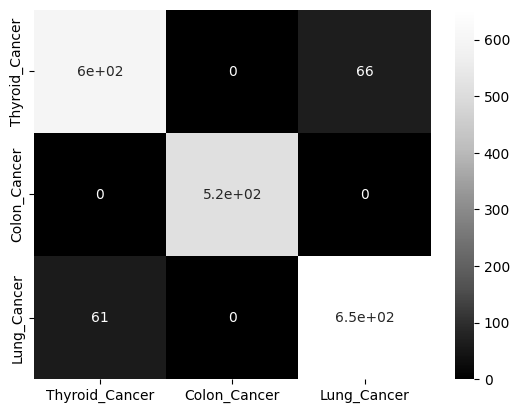

In [50]:
classes = ['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer']
#Classification report
print(classification_report(y_test,logistic_pred))
#confusion_matrix
cn=confusion_matrix(y_test,logistic_pred)
sns.heatmap(cn,annot=True,cmap='Greys_r',xticklabels=classes, yticklabels=classes)

**DecisionTree Classifier**

In [51]:
#Import the DecisionTreeClassifier algortihm
from sklearn.tree import DecisionTreeClassifier
#install the DecisionTreeClassifier model
tree=DecisionTreeClassifier()
#Fit the train data to the model
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
#Prediction of the DecisionTreeClassifier algorithm
tree_pred=tree.predict(X_test)
tree_pred

array(['Colon_Cancer', 'Colon_Cancer', 'Thyroid_Cancer', ...,
       'Lung_Cancer', 'Thyroid_Cancer', 'Colon_Cancer'], dtype=object)

In [53]:
#Check the test score and train score to the DecisionTreeClassifier algorithm
print(f'The Test_accuracy: {tree.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {tree.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The Accuracy_score: {accuracy_score(y_test,tree_pred)*100:.2f}')

The Test_accuracy: 100.00
The Train_accuracy: 100.00
The Accuracy_score: 100.00


                precision    recall  f1-score   support

  Colon_Cancer       1.00      1.00      1.00       664
   Lung_Cancer       1.00      1.00      1.00       515
Thyroid_Cancer       1.00      1.00      1.00       714

      accuracy                           1.00      1893
     macro avg       1.00      1.00      1.00      1893
  weighted avg       1.00      1.00      1.00      1893



<Axes: >

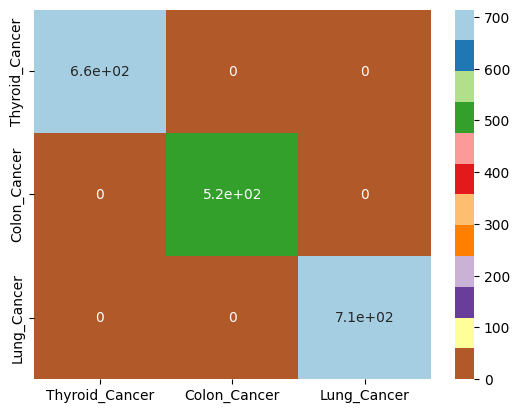

In [54]:
classes = ['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer']
#Classification report
print(classification_report(y_test,tree_pred))
#confusion_matrix
cn=confusion_matrix(y_test,tree_pred)
sns.heatmap(cn,annot=True,cmap='Paired_r',xticklabels=classes, yticklabels=classes)

**Handling Overfitting by pruning the DT**

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Install the DecisionTreeClassifier model with pruning
tree = DecisionTreeClassifier(max_depth=3, min_samples_split=4, min_samples_leaf=2)

# Fit the train data to the model
tree.fit(X_train, y_train)

# Prediction of the DecisionTreeClassifier algorithm
tree_pred = tree.predict(X_test)

# Check the test score and train score for the DecisionTreeClassifier algorithm
test_accuracy = tree.score(X_test, y_test) * 100
train_accuracy = tree.score(X_train, y_train) * 100
accuracy_score_result = accuracy_score(y_test, tree_pred) * 100

print(f'The Test_accuracy: {test_accuracy:.2f}')
print(f'The Train_accuracy: {train_accuracy:.2f}')
print(f'The Accuracy_score: {accuracy_score_result:.2f}')


The Test_accuracy: 77.50
The Train_accuracy: 78.79
The Accuracy_score: 77.50


**Classification_report and Confusion_matrix (DT)**

                precision    recall  f1-score   support

  Colon_Cancer       0.65      0.89      0.75       664
   Lung_Cancer       0.85      0.80      0.83       515
Thyroid_Cancer       0.94      0.65      0.77       714

      accuracy                           0.77      1893
     macro avg       0.81      0.78      0.78      1893
  weighted avg       0.81      0.77      0.78      1893



<Axes: >

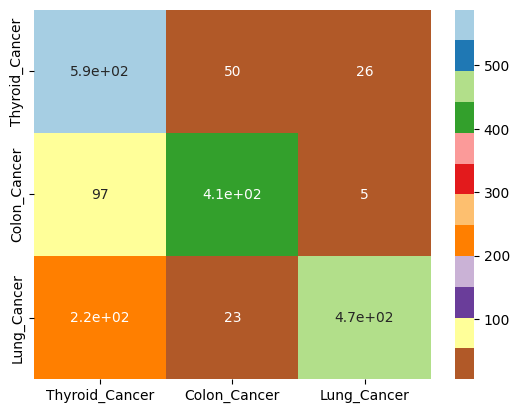

In [56]:
classes = ['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer']
#Classification report
print(classification_report(y_test,tree_pred))
#confusion_matrix
cn=confusion_matrix(y_test,tree_pred)
sns.heatmap(cn,annot=True,cmap='Paired_r',xticklabels=classes, yticklabels=classes)

**RandomForest Classifier**

In [57]:
#Import the RandomForestClassifier algortihm
from sklearn.ensemble import RandomForestClassifier
#install the DecisionTreeClassifier model
random=RandomForestClassifier()
#Fit the train data to the model
random.fit(X_train,y_train)

RandomForestClassifier()

In [58]:
#Prediction of the RandomForestClassifier algorithm
random_pred=random.predict(X_test)
random_pred

array(['Colon_Cancer', 'Colon_Cancer', 'Thyroid_Cancer', ...,
       'Lung_Cancer', 'Thyroid_Cancer', 'Colon_Cancer'], dtype=object)

In [59]:
#Check the test score and train score to the RandomForestClassifier algorithm
print(f'The Test_accuracy: {random.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {random.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The Accuracy_score: {accuracy_score(y_test,random_pred)*100:.2f}')

The Test_accuracy: 100.00
The Train_accuracy: 100.00
The Accuracy_score: 100.00


**Classification_report and Confusion_matrix(RF)**

                precision    recall  f1-score   support

  Colon_Cancer       1.00      1.00      1.00       664
   Lung_Cancer       1.00      1.00      1.00       515
Thyroid_Cancer       1.00      1.00      1.00       714

      accuracy                           1.00      1893
     macro avg       1.00      1.00      1.00      1893
  weighted avg       1.00      1.00      1.00      1893



<Axes: >

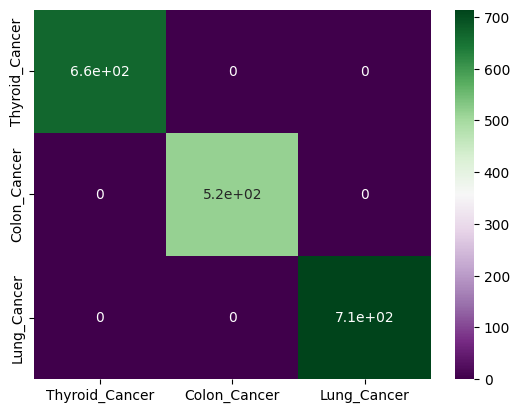

In [60]:
classes = ['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer']
#Classification report
print(classification_report(y_test,random_pred))
#confusion_matrix
cn=confusion_matrix(y_test,random_pred)
sns.heatmap(cn,annot=True,cmap='PRGn',xticklabels=classes, yticklabels=classes)

**MultinomialNB**

In [61]:
#Import the MultinomialNB algorithm to train the our model
from sklearn.naive_bayes import MultinomialNB
#install the model
multinomial=MultinomialNB()
#fit the train data to our model
multinomial.fit(X_train,y_train)

MultinomialNB()

In [62]:
#Prediction to the test data MultinomialNB
multinomial_pred=multinomial.predict(X_test)
multinomial_pred

array(['Colon_Cancer', 'Colon_Cancer', 'Thyroid_Cancer', ...,
       'Lung_Cancer', 'Thyroid_Cancer', 'Colon_Cancer'], dtype='<U14')

In [63]:
 #Check the test score and train score to the MultinomialNB algorithm
print(f'The Test_accuracy: {multinomial.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {multinomial.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The Accuracy_score: {accuracy_score(y_test,multinomial_pred)*100:.2f}')

The Test_accuracy: 90.86
The Train_accuracy: 93.62
The Accuracy_score: 90.86


**Classification_report and Confusion_matix (MNB)**

                precision    recall  f1-score   support

  Colon_Cancer       0.91      0.83      0.87       664
   Lung_Cancer       0.99      0.99      0.99       515
Thyroid_Cancer       0.85      0.93      0.89       714

      accuracy                           0.91      1893
     macro avg       0.92      0.91      0.92      1893
  weighted avg       0.91      0.91      0.91      1893



<Axes: >

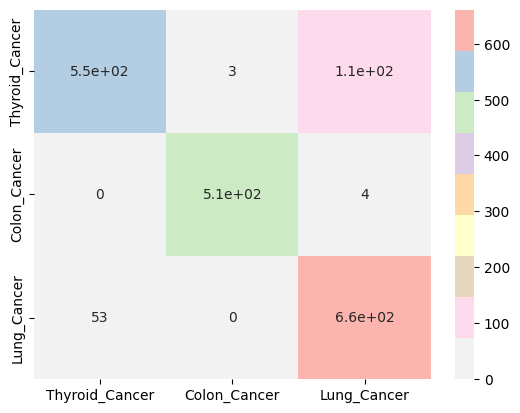

In [64]:
classes = ['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer']
#Classification report
print(classification_report(y_test,multinomial_pred))
#confusion_matrix
cn=confusion_matrix(y_test,multinomial_pred)
sns.heatmap(cn,annot=True,cmap='Pastel1_r',xticklabels=classes, yticklabels=classes)

**XGB Classifier**

In [65]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit and transform the target variable to encode the string labels to integers
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create the XGBClassifier instance
xgb = XGBClassifier()

# Fit the model with the transformed target variable
xgb.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [66]:
#Prediction to the test data XGBClassifier
xgb_pred = xgb.predict(X_test)
xgb_pred

array([0, 0, 2, ..., 1, 2, 0])

In [67]:
#Check the test score and train score to the XGBClassifier algorithm
print(f'The Test_accuracy: {xgb.score(X_test,y_test_encoded)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {xgb.score(X_train,y_train_encoded)*100:.2f}')
#Check the accuracy_score to the model
print(f'The Accuracy_score: {accuracy_score(y_test_encoded,xgb_pred)*100:.2f}')

The Test_accuracy: 100.00
The Train_accuracy: 100.00
The Accuracy_score: 100.00


**Classification_report and Confusion_matrix (XGB)**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       664
           1       1.00      1.00      1.00       515
           2       1.00      1.00      1.00       714

    accuracy                           1.00      1893
   macro avg       1.00      1.00      1.00      1893
weighted avg       1.00      1.00      1.00      1893



<Axes: >

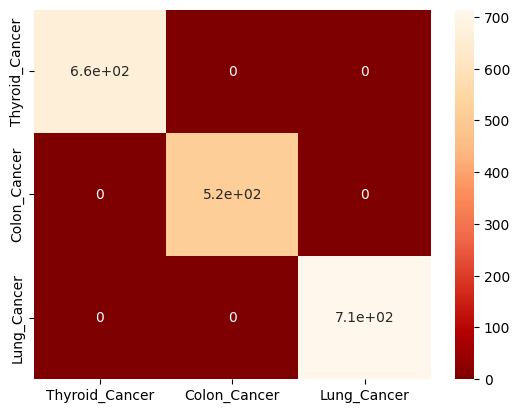

In [68]:
classes = ['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer']
#Classification report
print(classification_report(y_test_encoded,xgb_pred))
#confusion_matrix
cn=confusion_matrix(y_test_encoded,xgb_pred)
sns.heatmap(cn,annot=True,cmap='OrRd_r',xticklabels=classes, yticklabels=classes)

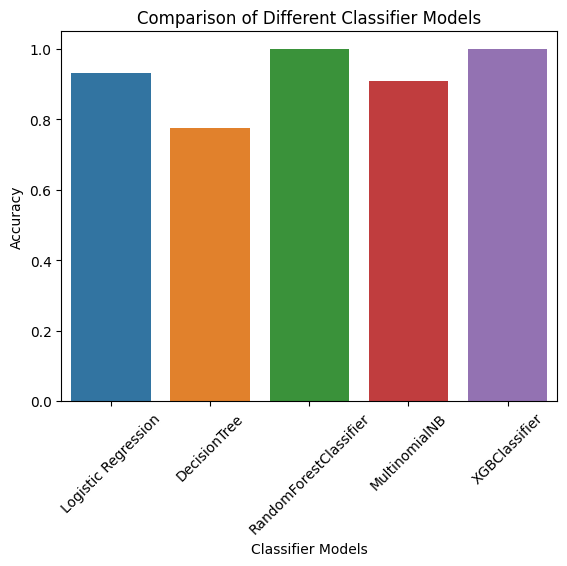

In [69]:
#comparing the accuracy of different models
models = ['Logistic Regression','DecisionTree', 'RandomForestClassifier', 'MultinomialNB', 'XGBClassifier']
preds = [logistic_pred,tree_pred,random_pred,multinomial_pred,xgb_pred]
# Calculating accuracies
accuracys = []
for i, pred in enumerate(preds):
    if models[i] == 'XGBClassifier':
        # Use y_test_encoded for XGBClassifier
        acc = accuracy_score(y_test_encoded, pred)
    else:
        # Use y_test for other models
        acc = accuracy_score(y_test, pred)
    accuracys.append(acc)

# Plotting
sns.barplot(x=models, y=accuracys)
plt.xlabel('Classifier Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Different Classifier Models')
plt.xticks(rotation=45)  # Rotating model names for better readability
plt.show()

**Deep Learning models**

In [70]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Input, Flatten, LSTM, Bidirectional, Embedding, Dropout, GlobalMaxPooling1D, TimeDistributed, GRU, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Sequential, load_model, Model
from keras.optimizers import Adam
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer

In [71]:
# Create dummy values for the dataset and split the data
y = pd.get_dummies(data['Label'])
X = data['Text']
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42)
X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, test_size=0.3, random_state=42)

In [72]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, Bidirectional, LSTM, Dropout, Dense
from keras.callbacks import EarlyStopping

# Tokenization and Padding
max_words = 5000
max_len = 300  # Adjust as necessary
tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
tokenizer.fit_on_texts(data['Text'])

def tokenize_and_pad(text):
    sequences = tokenizer.texts_to_sequences(text)
    padded = pad_sequences(sequences, maxlen=max_len, padding='post')
    return padded

# Apply to your dataset
X_trn_padded = tokenize_and_pad(X_trn)
X_vld_padded = tokenize_and_pad(X_vld)

# Model Building
vocab_size = 5000
embedding_size = 32
num_classes = y_trn.shape[1]

model = Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax' if num_classes > 2 else 'sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy', metrics=['accuracy'])

# Early Stopping
es = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

# Fit the model
history = model.fit(X_trn_padded, y_trn, validation_data=(X_vld_padded, y_vld), epochs=50, callbacks=[es])


Epoch 1/50
133/133 [==============================] - 43s 269ms/step - loss: 1.0198 - accuracy: 0.4541 - val_loss: 0.8894 - val_accuracy: 0.4645
Epoch 2/50
133/133 [==============================] - 38s 284ms/step - loss: 0.6287 - accuracy: 0.6645 - val_loss: 0.5129 - val_accuracy: 0.7281
Epoch 3/50
133/133 [==============================] - 35s 262ms/step - loss: 0.3633 - accuracy: 0.8511 - val_loss: 0.1502 - val_accuracy: 0.9593
Epoch 4/50
133/133 [==============================] - 35s 261ms/step - loss: 0.0794 - accuracy: 0.9795 - val_loss: 0.0435 - val_accuracy: 0.9846
Epoch 5/50
133/133 [==============================] - 35s 261ms/step - loss: 0.0384 - accuracy: 0.9887 - val_loss: 0.0480 - val_accuracy: 0.9840
Epoch 6/50
133/133 [==============================] - 35s 262ms/step - loss: 0.0327 - accuracy: 0.9884 - val_loss: 0.0349 - val_accuracy: 0.9895
Epoch 7/50
133/133 [==============================] - 35s 266ms/step - loss: 0.0321 - accuracy: 0.9873 - val_loss: 0.0720 - val_ac

In [73]:
# Assuming the tokenizer and max_len are already defined and set up as shown in the previous snippet

def tokenize_and_pad(text):
    sequences = tokenizer.texts_to_sequences(text)
    padded = pad_sequences(sequences, maxlen=max_len, padding='post')
    return padded

# Preprocess the test data
X_tst_padded = tokenize_and_pad(X_tst)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_tst_padded, y_tst, verbose=0)

# Print metrics
print('Accuracy : {:.4f}'.format(accuracy))

Accuracy : 0.9927


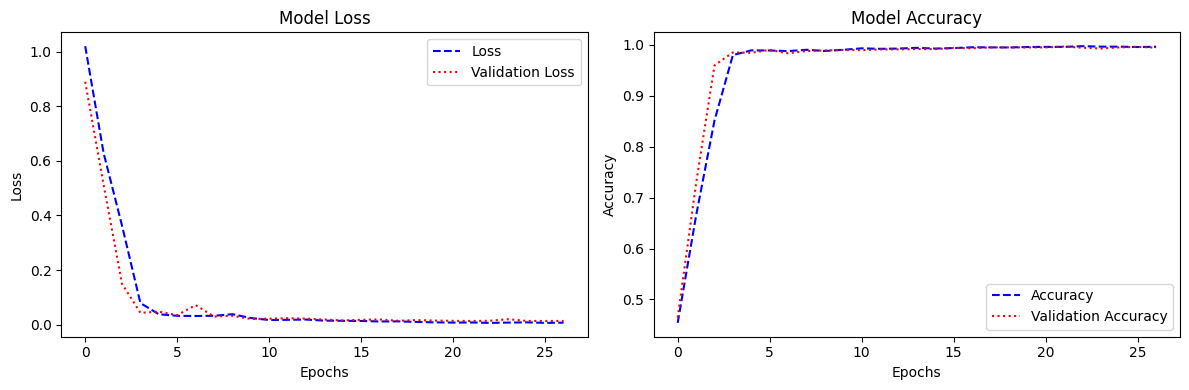

In [74]:
import matplotlib.pyplot as plt

# Assuming 'history' is the variable holding the output of the model.fit() method
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label='Loss')
plt.plot(history.history['val_loss'], 'r:', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b--', label='Accuracy')
plt.plot(history.history['val_accuracy'], 'r:', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


**Test The model predict the good result**

In [75]:
text='ulcer coliti type ammatori bowel diseas thatcan potenti lead cancer e age onset coliti istyp year old serious threaten thequal life patient e immunopathogenesi andimmunosuppress treatment coliti current theresearch topic signific interest e research goal areto diagnos treat coliti order prevent exacerbationof diseas e drug use treat coliti clinicoften advers eect longterm applicationanoth crucial area coliti research focus thediscoveri function food prevent coliti withoutsid eect natur plant includ aegl marmeloslinn also intervent eect coliti recentstudi shown intestin ora close relat tocol intestin ora particip mucosalimmun respons bacteria import promot ofammatori bowel diseas e symptom coliti beallevi regul intestin ora prevent oralimbal increas number probiot yak yoghurt natur ferment food rich innutri common minor area theqinghai tibet plateau previou research suggest thatyak yoghurt exert variou physiolog activ asantioxidationimmunitycholesterolreductionand cevidencebas complementari altern medicineenhanc e qinghai tibet plateau specicclim uniqu environ ferment yakyoghurt addit avail yak milk specialtibetan ferment utensil eg certain fermentationmicroan make avor qualiti yakyoghurt dier greatli ordinari ferment milk aprior studi intestin physiolog activ lacticacid bacteri speci yak yoghurt show lacticacidproduc bacteria isol yak yoghurt hadantioxid constip prevent eect studyth potenti eect lactobacillusplantarum ys lpi oxazolidoneinduc colitiswer investig rst time e nding provid aposs foundat develop lpysespeci applic function food medicineratio solut massnorm group daub treat ml ethanolwith remain four group daub treat ml oxazolidonesolv treatment day mice wereanesthet en blunt head silicon tube wasinsert intestin tract anu mous adepth cm e mice normal group administeredwith ml ethanol solut theremain four group administ ml oxazolidon solut mass ratio solvent ethanoltwenti second later cathet remov micewer lift tail half minut last dayof treatment day mice sacric decapit plasma sampl colon tissu collect e length weight colon documentedexperi anim materi materi methodsand reagentsexperiment strain strain isol yak yoghurt yushu area qinghai provinc china ourteam name lpi store china center fortyp cultur collect cctcc wuhan china nom e neg control strain lb purchasedfrom cctcc ab fifti male balbc mice week old purchasedfrom experiment anim center chongqingmed univers certic syxk yu oxazolon purchas sigmaaldrich co llcusa il il et sp ss vip serum cytokin kitswer purchas biolegend inc usa gsh sodmpo mda kit purchas nanj jiancheng bioengin institut nanj china trizol reagent oligodt rnase dntp mlv primer bca proteinquantit kit ap teme sdspage pvdf membran rst antibodi second antibodi purchasedfrom ermo fisher scientic inc usa instrument equip imark micropl readerwa purchas biorad usa steponeplu pcrinstrument purchas ermo fisher scienticinc usa tanon chemiluminesc imag waspurchas tanon scienc technolog co ltdchina sa v statist softwar packag purchasedfrom sa institut inc usalb anim group intervent total balbcmal mice assign group model groupnorm group lactobacillu bulgaricustreatmentgroup highdos lpysh lowdos lpysl treatment group mice group mice lb lpysh lpysl group fedwith cfukg ml livingbacteria physiolog salin correspond straindaili oral gavag consecut day normal andmodel group fed ml physiolog salineaft day treatment abdomen mice wereshav area cm cm e mous abdomen detect endothelin et substanc p spsomatostatin ss vasoact intestin peptid vipconcentr serum sampl e whole blood samplesof mice allow clot room temperatur h andthen centrifug rpmmin min collect serum sampl concentr et sssp vip detect use commerci kit determin interleukin il interleukinil level serum sampl e mous serum sampleswer prepar accord section en serumlevel il il cytokin assess usingcommerci kit determin glutathion gsh malondialdehydemda myeloperoxidas mpo superoxid dismutasesod activ colon tissu mixtur g colontissu ml normal salin prepar weightratio homogen mixtur activ gshmda mpo sod colon tissu evalu usingcommerci kit patholog observ stain e lesionsit cm colon cut scalpel etrim tissu correspond label place neutral formalin solut h e colon tissu wasdehydr embed slice dewax stain thendehydr transpar seal final pathologicalst colon tissu observ microscopebx olympu tokyo japan qpcr assay total rna isol use rnazol andthen dilut nal concentr gl cnasynthesi l dilut rna extract taken andcdna prepar use revers transcriptas kit enth cdna templat l ad l sybrgreen pcr master mix l forward primer andrevers primer tabl qpcr amplic wascarri cycl reaction condit ofoc c c c follow cevidencebas complementari altern medicineckitinosenosnnossequencegen namet sequenc primer use studyforward agagagatcgggttcacarevers cacagaactgagggtacaforward tcgtccaacttctgggctcttrevers ccttctcttcctcccctctcttcforward tcagccatcacagtgttcccrevers atagcccgcatagcgtatcagforward catagcccaggtaaagcacaatrevers gaacactccagaatcgtcaactcforward tcagggactacgctgcgaaagrevers aagagctggcagaccgactcaforward tgcaccaccaactgcttagrevers gatgcagggatgatgttcctdetect gene ctgapdh measur accord follow equat ct cycl reaction condit c andc gapdh use intern control thisdetermin rel mrna express wasgapdhscf western blot mg tissu sampl mixedwith l pmsf ml ripa homogen rmin oc min protein quanticationwa conduct use bca protein quantit kit andth protein sampl dilut gml en thedilut protein sampl buer mix heatedat oc min icebath min subsequentlyacrylamid start buer resolv buer teme ap dierenti water mix specic proport order prepar sdspage separ glue andconcentr glue e prestain sampl proteinladd place sampl hole rubber sheetrespect proteincontain sdspageglu subject vertic gel electrophoresi minaft activ methanol min pvdf wereblock skim milk tbst solut hen block pvdf membran rins tbst follow incub primari antibodyat c h wash tbst time thesecondari antibodi incub c h lastli theprotein band visual supersign west picoplu chemiluminesc substrat imag werecaptur use chemiluminesc imag multipl comparison conduct use onewayanova follow tukey test statist analysi e averag valu three experiment result determin statist softwaresa use analyz whether significantdier group level p longest normal group cm result eect lpi colon paramet e experimentalresult demonstr length mous colon thepar remain four group contrast theth ratio colon weightlength highest normalpgml lowest concentr found sslpysh group eect better eect lpi serum content et sp ss andvip mice seen figur serumml decreas normal mice compar theremain four group e coliti model mice exhibit theopposit result highest concentr wereserum concentr ss vip coliti mice andmarkedli decreas et sp importantlyth eect better treatment lpyshshortest coliti model group cm similarlygroup lowest coliti modelgroup figur found lpi couldsignificantli p attenu declin colon lengthand weightlength ratio induc coliti cm lpysl group cm forlb cm concentr ss pgml vip pgml normal mice increas comlevel et pgml sp pgobserv et pgml sp pgml vip pgml interestingli lpi could significantli p improv pglb pgml coliti model mice signigroup p follow treatment lpi anhigh lpysh pgml lpysltreat mice pgml lbtreat mice pgml serum level il werelow lpysh pgml lpysltreat mice pgml lbtreat mice pgml p gsh molmg sod molhighest mpo mumg mda nmolmg lowest among molmg sod molgprotwer significantli reduc p mpo mumg mda nmolmg wereremark increas p model group mice eect lpi serum concentr il andil mice seen figur serumcontentand il pgml eect lpi activ mpo sod gsh andmda mous colon shown figur activ ofincreas il decreas il cytokin level wereobserv notabl serum level il markedlyml eect lpi better ofgroup induc oxazolidon level gshcantli reduc rais compar remain fourgprot colon tissu normal group pgmlofil cevidencebas complementari altern medicinebacmic treat low concentr lactobacillu plantarum ys cfukg lpysh mice treat high concentrationof lactobacillu plantarum ys cfukg lb mice treat lactobacillu bulgaricu cfukgfigur ac colon length colon weightcolon length group mice data present mean standard deviationad dierent letter mean valu significantli dierent p accord tukey honestli significantli dierent test lpysland mda level p eect stronger comparedto lbtreat mice molmg molgprot mumg nmolmg molgprot colon tissu markedli decreas mpo mumg mda nmolmg compar coliti model groupand goblet cell increas compar modelgroup among lpysh obviou eecton improv colon tissu indic lpi couldreduc colon injuri caus dss high eciencyeect also enhanc increas concentrationlpi could markedli attenu declin gsh andsod level prevent colitisinduc increas mpo molmgspec treatment lpysh significantli increasedthesodlevelsandof patholog observ shown figur thenorm group epitheli cell colon mucosa intactth ammatori cell normal without ltration andth goblet cell arrang orderli without congestionand edema model group epitheli cell colontissu obvious damagedth intestin wall wasthicken edema ammatori cell ltration andgoblet cell reduc treatment lb lpi congest edema cell ltration allevi eect lpi mrna protein express inmous colon shown figur coliti inductioncould lead upregul mrna protein expressionof ino mous colon downregul relativeexpress ckit eno nno scf treatment withlpysh could increas rel express nnoseno ckit scf decreas ino colontissu coliti mice eect stronger thoseof lpysl lb treatment group discussion ratio colon weightlength employ vitalstandard assess coliti vivo e colon length ofnormalmodellblpysllpyshadccbnormalmodellblpysllpyshcolon length cmcolon lengthadccbnormalmodellblpysllpyshcolon weightcolon lengthcolon weightcolon length cevidencebas complementari altern medicineabfigur et b ss c sp vip serum level group mice data present mean standard deviationad dierent letter mean valu significantli dierent p accord tukey honestli significantli dierent test lpyslmic treat low concentr lactobacillu plantarum ys cfukg lpysh mice treat high concentrationof lactobacillu plantarum ys cfukg lb mice treat lactobacillu bulgaricu cfukgdcfigur il b il serum level group mice data present mean standard deviat ae dierentlett mean valu significantli dierent p accord tukey honestli significantli dierent test lpysl mice treatedwith low concentr lactobacillu plantarum ys cfukg lpysh mice treat high concentr oflactobacillu plantarum ys cfukg lb mice treat lactobacillu bulgaricu cfukgbadabbcnormalmodellblpysllpyshet level pgmletaedcbnormalmodellblpysllpyshss level pgmlssvipdabbcnormalmodellblpysllpyshsp level pgmlspaedcbnormalmodellblpysllpyshvip level pgmlvipadccbnormalmodellblpysllpyshil level pgmlileabcdnormalmodellblpysllpyshil level pgmlil cevidencebas complementari altern medicineabfigur mpo b c gsh mda colon tissu level group mice data present mean standarddevi ae dierent letter mean valu significantli dierent p accord tukey honestli significantli dierent testlpysl mice treat low concentr lactobacillu plantarum ys cfukg lpysh mice treat highconcentr lactobacillu plantarum ys cfukg lb mice treat lactobacillu bulgaricu cfukgcdcol mice shorter averag control miceand ratio colon weightlength lower coliti micethan control mice howeverit appear thattreat lpi could attenu declin colonlength weightlength ratio induc colitisa prior studi shown vasoconstrict theendothelin lead colon mucosa eros ulcer turn exacerb progress coliti ss howev reduc gastrointestin ammationbi suppress product gastric acid othergastrointestin uid us decreas ss level induceth secret gastrointestin uid thu aggravatingcol excess accumul sp induc colitisbut antagon shown reliev coliti invivo vip inhibit product regul thetranscript activ ino colon tissu thusprotect intestin mucosa besid vip also uenc certain immun aspect coliti studylpi inhibit coliti downregul level etand sp upregul ss vipil eector cytokin produc cell whichha close associ coliti cell regul theammatori respons caus coliti il involv suppress ammatori process andsever reduct coliti uenc cell il anoth cytokin produc treg cell immunoinhibitori eect play signific role thedevelop coliti ammatori bowel diseaseibd chronic refractori intestin ammatori diseasemainli includ ulcer coliti uc crohn diseasecd although etiolog ibd still unclear theimbal recogn themain caus mucos damag ibd action ofdierenti factor il regulatori cell deriv fromintestin mucosa associ lymphoid tissu correct deviat secret high level il andmedium level tgf achiev purpos oftreat ammatori bowel diseas certain extent observ lpi could increas level ilthu regul immun allevi coliti lpeabcdnormalmodellblpysllpyshmpo level mumgmpoadccbnormalmodellblpysllpyshsod level molgprotsodaedcbnormalmodellblpysllpyshsgh level molmggshdabbcnormalmodellblpysllpyshmda level nmolmgmda cevidencebas complementari altern medicinefigur observ colon patholog mice stainingi could inhibit coliti reduc secret ile aggreg neutrophil began declin afterintestin ammat larg amount enteredinto circul migrat tissu sametim free radic reactiv oxygen speci reactiv nitrogen speci gather larg quantiti inturn led damag toxic colon tissu furtheraggrav coliti coliti level sod andgsh reduc colon tissu mda andmpo elev nding also indic colitiscould lead decreas gsh sod level well asincreas mda mpo level addit lpi attenu coliti inhibit transcript respons oxid stressno divid nno eno ino hasbeen report produc eno play key rolein respons colon tissu damag excess nogener ino promot coliti damag enoscontrol product keep colon tissu ina normal state play import role reducingcolitisinduc colon injuri e presenc excessiveno aggrav colon damag nno also controlth level tissu protect tissu beingdamag excess studi lpysupregul express eno nno colonand downregul oftherebi attenuatingcolitisinosulc coliti show hematochezia anddiarrhea also present colon motil disord hasbeen prove interstiti cell cajal icc relat tocolon motil dysfunct directli particip theprogress coliti specic marker gastrointestinalicc ckit transmembran glycoprotein specicallyexpress icc cell membran ckit gene locat onchromosom q belong protooncogen itsproduct tyrosin kinas type iii receptor scfckit regul prolifer dierenti ofhematopoiet stem cell seri signalingpathway scf exert direct eect ammatorybowel diseas regul function number oficc scf interact ligand ckit dysregul scfkit signal pathway may decreas theprolifer dierenti icc thu exacerbatingcol e abnorm express scfckitsign pathway also chang physiologicalfunct icc weaken gastrointestin motil andaggrav intestin dysfunct present studylpi could inhibit coliti regul expressionlevel scf ckiticc autophagi regul becom new target forth treatment intestin motil disord ulcerativecol drug treatment coliti often hassid eect stop easi relaps ereforeth use natur harmless substanc regul icc prevent treatment coliti canmaintain longterm health studi shown thataurantii fructusimmaturu atractylodi macrocephala rhizoma inhibit autophagi cajal stromalcel induc glutam may play inhibitoryrol coliti meanwhil also studi showingthat lactic acid bacteria regul icc thu regulatingnormallblpysllpyshmodel cevidencebas complementari altern medicineacbdth mean standard deviat ae dierent letter mean valu significantli dierent p accord tukey honestlyfigur eect lpi nno b eno c ino ckit e scf mrna express mous colon data present asesignificantli dierent test lpysl mice treat low concentr lactobacillu plantarum ys cfukg lpyshmic treat high concentr lactobacillu plantarum ys cfukg lb mice treat lactobacillusbulgaricu cfukgintestin function protect intestin isstudi also conrm lpi regul scfckitsign pathway scfckit signalingpathway import icc regulatori pathway erefor lpi may also inhibit colon regul iccaedcbnormalmodellblpysllpyshrel multipl model groupnnosadccbnormalmodellblpysllpyshrel multipl model groupenoseabcdnormalmodellblpysllpyshrel multipl model groupinosaedcbnormalmodellblpysllpyshrel multipl model groupscfaedcbnormalmodellblpysllpyshrel multipl model groupckit cevidencebas complementari altern medicineacbdmean standard deviat ae dierent letter mean valu significantli dierent p accord tukey honestli sigfigur af eect lpi nno eno ino ckit scf protein express mous colon data present thenicantli dierent test lpysl mice treat low concentr lactobacillu plantarum ys cfukg lpyshmic treat high concentr lactobacillu plantarum ys cfukg lb mice treat lactobacillusbulgaricu cfukgef conclusionin studi oxazolon use induc coliti balbcmic inhibitori eect lpi coliti weredetect rough observ colon tissu serum sampl mice found lpi treatmentcould allevi coliti restor level ammatoryind closer measur healthi control micei work suggest lpi superiorqu lactic acidbacteria potenti role coliti treatment provid foundat research developmentabbreviationslpi lactobacillu plantarum yslbqpcr quantit polymeras chain reactionhelactobacillu bulgaricushematoxylineosinnormalmodellblpysllpyshckitenosinosnnosscfactinadcbcbnormalmodellblpysllpyshrel multipl model groupnnosaedcbnormalmodellblpysllpyshrel multipl model groupenoseabcdnormalmodellblpysllpyshrel multipl model groupinosadccbnormalmodellblpysllpyshrel multipl model groupscfadccbnormalmodellblpysllpyshrel multipl model groupckit cevidencebas complementari altern medicineendothelinsubst psomatostatinvasoact intestin peptideinterleukininterleukinetspssvipililmpo myeloperoxidasesodgshmda malondialdehydeenosnno neuron nitric oxid synthaseinduc nitric oxid synthaseinosscfstem cell factorsuperoxid dismutaseglutathioneendotheli nitric oxid synthasedata availabilityno data use support studyconflict interest author manuscript state haveconict interest declareauthor contributionsruokun yi fang tan contribut equal workruokun yi fang tan perform major theexperi wrote manuscript huayi suo wenfengli xianrong zhou jianfei mu contribut dataanalysi xin zhao peng xie design supervis thestudi read nal manuscriptacknowledgmentsi research fund nation key rd program ofchina yfd children research institut ofnat center school develop programmeand chongq univers educ csdpfstheand technolog research program ofchongq municip educ commiss kjzdk research project chongq universityof educ kytbzc chinasciencerefer r k yi f tan w liao et al isol ident oflactobacillu plantarum hfi natur ferment yakyogurt eect alcohol liver injuri mice microan vol p j liu f tan x h liu et al explor antioxidanteect period regul cancer cell polyphenolsproduc ferment grape skin lactobacillusplantarum kfi biomolecul vol p olson b k reuter k g e scott et al e primarydefectfrom nonhematopoiet sourc journal experiment medicinevol pp ileiti originatesin experiment b manandhar k r paudel b sharma r karkiphytochem prole pharmacolog activ aeglemarmelo linn journal integr medicin vol pp x zhou h liu j zhang et al protect eect lactobacillu fermentum cqpc dextran sulfat sodiuminduc coliti mice associ modul thenuclear factorb signal pathway journal dairi scienc vol pp c arrieta k madsen j doyl j med reduc small intestin permeabl attenu coliti theil genedeci mous gut vol pp h suo x zhao qian et al erapeut eect activatedcarboninduc constip mice lactobacillu fermentum suo treatment intern journal molecular scienc vol pp qian h suo du et al prevent eect lactobacillu fermentum lee activ carboninduc constip mice experiment eerapeut medicinevol pp x zhao qian h suo et al prevent eect lactobacillu fermentum zhao activ carboninduc constip mice journal nutrit scienc andvitaminolog vol pp x long pan x zhao prophylact eect ofkudingcha polyphenol oxazolon induc coliti throughit antioxid capac food scienc human wellnessvol pp k zhu g huang j xie x zhou j mu x zhaoprevent eect avonoid wushan shencha malu doumeri leav ccl induc liver injuri foodscienc nutrit vol pp x zhao j zhang yi et al lactobacillu plantarumcqpc prevent obes mice ppar signal pathway biomolecul vol p w strober j fuss r blumberg e immunologyofmucosalmodel onamm annual review immunolog vol pp jl song qian gj li x zhao antiammatoryeect kudingcha methanol extract ilex kudingcha cjtseng dextran sulfat sodiuminduc ulcer colitismolecular medicin report vol pp qian x zhao jl song et al inhibitori eect resist starch rs carrier stachyos dextransulf sodiuminduc ulcer coliti cbl miceexperiment eerapeut medicin vol pp x chen x zhao h w wang et al prevent eect oflactobacillu fermentum hy dextran sulfat sodiuminduc coliti mice nutrient vol p qian l lei x j liu et al inhibitori eect oflactobacillu plantarum ys dextran sulfat sodiuminduc cblj mice coliti scienc technolog foodindustri vol pp chen x zhao p sun j qian shi r wangprevent eect gardenia jasminoid hclethanolinduc gastric injuri mice journal pharmacologicalsci vol pp l xie z h xing r x jiang et al eect sanpi decotionon express il il mice ulcerativecol chines journal experiment tradit medicalformula vol pp l hang kumar blum j f urban c fantini andj v weinstock heligmosomoid polygyru bakeri infect decreas smad express intestin cd cell cevidencebas complementari altern medicinewhich allow tgf induc ilproduc regulatorytcel block coliti ee journal immunolog vol pp j zhang q li wei et al process design antioxid shuidouchi eect prevent dextransulf sodium dssinduc coliti mice via antioxidantact appli scienc vol p c fiocchi ammatori bowel diseas new insight intomechan ammat increasingli customizedapproach diagnosi therapi current opinion ingastroenterolog vol pp j zhang r yi qian p sun x zhao z yanglactobacillu plantarum cqpc activ prevent dextransulf sodiuminduc coliti regul il pathway journal food scienc vol pp j zhang x chen jl song et al prevent eect oflactobacillu plantarum cqpc coliti induc bydextran sodium sulfat mice food scienc technologyresearch vol pp lh chen jl song qian x zhao hy suo j liincreas prevent eect colon carcinogenesi use ofresist starch rs carrier polysaccharid ofinternationallarimichthysjourn molecular scienc vol pp x feng j zhang qian et al prevent eect oflactobacillu plantarum ys oxazoloneinduc balbccol mice appli biolog chemistri vol pp swim bladdercrocea j wang li r tang et al eect yiqi jianpitongbian recip icc scfckit signal pathway incolon tissu slow transport type constip rat chinesearch tradit chines medicin vol pp j feng j gao zhou et al role stem cell factor theregul icc prolifer detrusor contract inrat underact bladder molecular medicin report vol pp c lu h lu x huang et al colon transit disordermedi downregul interstiti cell cajalanoctamin dextran sodium sulfateinduc coliti micejourn neurogastroenterolog motil vol pp c dai l zheng l zhang et al jianpi qingchangdecoct regul intestin motil dextran sulfat sodiuminduc coliti reduc autophagi interstiti cell cajal world journal gastroenterologyvol pp yan z yue sun et al suppress eect ofaurantii fructu immaturu atractylodi macrocephalaerhizoma glutam acidinduc autophagi interstitialcel cajal journal integr medicin vol pp c li sp nie kx zhu et al eect oflactobacillusplantarumncu loperamideinduc constip inmic intern journal food scienc nutritionvol pp r yadak breur'
text=[text]
text_int=vector.transform(text)
prediction=xgb.predict(text_int)
f" Biomedical text document classification is {prediction[0]}"

' Biomedical text document classification is 0'

In [76]:
text= "optim telemedicin encount oral maxillofaci surgeon covid pandem hwi sean moon dd md tim wang ba karthik rajasekaran md ryan brewster ba rabi shanti dmd md neeraj panchal dd md resid depart oral maxillofaci surgeri univers pennsylvania philadelphia pa dmd candid school dental medicin univers pennsylvania philadelphia pa mph candid perelman school medicin univers pennsylvania philadelphia pa assist professor otorhinolaryngolog univers pennsylvania philadelphia pa md candid stanford univers school medicin stanford univers stanford ca assist professor oral maxillofaci surgeri univers pennsylvania philadelphia pa assist professor section chief oral maxillofaci surgeri philadelphia veteran affair medic center penn presbyterian medic center univers pennsylvania school dental medicin philadelphia pa correspond author neeraj panchal dd md tel mail address n th st philadelphia pa email address npanchalupennedu disclosur none report abstract word count manuscript word count number refer number figurest number supplement c covid pandem chang convent medic practic pattern across health disciplin includ oral maxillofaci surgeri practic use telemedicin rapidli expand uphold safeti strategi physic distanc diseas transmiss reduct maintain uninterrupt care patient date specif guidelin optim telemedicin encount oral maxillofaci surgeri practic goal paper provid best practic oral maxillofaci surgeon patient effect util telemedicin durat covid beyond statement clinic relev goal paper provid best practic oral maxillofaci surgeon patient effect util telemedicin durat covid beyond introduct covid pandem disrupt societi multitud way healthcar except sarscov viru rapid transmiss high hospit rate strain avail medic resourc includ person protect equip ppe respiratori ventil hospit bed viru also pose major threat healthcar personnel whose risk exposur compound aforement ppe shortag respons american associ oral maxillofaci surgeon aaom recommend delay elect surgeri accord center diseas control prevent call c postpon elect medic dental procedur similarli four five dental offic close except emerg procedur face challeng medic dental commun remain steadfast care patient nonelect health need innov altern way deliv care one import popular alter deliveri care increas util telemedicin allow surgeon patient connect virtual enabl patient access muchneed medic care preserv ppe minim exposur pathogen though studi found telemedicin decreas cost save time without compromis patient satisfact wide use healthcar covid pandem similarli teledentistri deem infanc founder american teledentistri associ nevertheless telemedicin shown promis incorpor workflow variou oral maxillofaci surgeri institut practic across countri virtual visit particularli use triag patient exampl patient dentoalveolar infect meet virtual surgeon receiv prescript appropri analges antibiot without go emerg depart also patient oral lesion take imag show surgeon inperson visit expedit diagnosi treatment plan workflow enabl patient access time attent provid lighten load healthcar system reduc number inperson visit c associ recent rise telemedicin popular learn curv surgeon patient incorpor technolog shift virtual visit jar patientsurgeon relationship must navig thought help telehealth guid surgeon patient surgic specialti know guidelin oral maxillofaci surgeri detail best practic oral maxillofaci surgeon om patient effect util telemedicin durat covid beyond gener consider telemedicin accord aaom white paper telehealth remot treatment virtual manag oral maxillofaci surgic condit provid appropri licens oral maxillofaci surgeon regul state law deliveri patient care telemedicin must continu follow evidencebas guidelin ensur qualiti safeti patient provid must compli latest telehealth requir outlin unit state health human servic protect patient privaci compli health insur portabl account act hipaa furthermor provid ethic oblig inform patient potenti benefit limit risk telemedicin patient requir emerg urgent servic must direct nearest hospit c set telemedicin sever modal conduct telemedicin encount strongli recommend live synchron twoway interact patient om incorpor audio visual telecommun tool achiev desktop comput laptop smartphon unit state censu bureau report approxim percent household comput smartphon percent broadband internet subscript option though recommend use desktop larg screen laptop highresolut camera smartphon even latter meet minimum technic requir ideal telemedicin visit offer clinic experi close simul inperson encount train administr staff member call patient beforehand discuss virtual setup basic expect visit prasad et al creat figur exemplifi patient inform handout graphic illustr detail set well key examin step patient may ask perform encount follow detail key aspect consider om patient maxim telehealth visit c insur coverag bill effort reduc burden post healthcar entiti facilit mitig effort center medicar medicaid servic cm broaden access telemedicin coverag privat payer follow suit cm expans includ voiceonli visit critic patient without access smartphon comput video capabl furthermor cm allow pariti payment telemedicin visit inperson visit provid bill medicaid medicar rate would inperson visit new polici especi relev older patient cover medicar gener higher risk covid complic therefor telehealth encount provid confirm patient insur plan telemedicin coverag also whether insur plan waiv copay noncovid relat visit avoid scenario patient receiv bill unknowingli american associ oral maxillofaci surgeon provid addit detail inform telehealth bill relev omss includ updat link ama ada bill code websit httpswwwaaomsorgpracticeresourcestelehealthfaq c profession provid attir visit replic level profession inperson appoint provid dress profession would offic hospitalbas practic patient come provid review patient relev medic record chief complaint save time maxim effici visit also interest time profession om patient mind start visit time visit om commun patient maintain transpar instanc om need document someth visit respect inform patient task prevent misunderstand end visit import om summar accomplish visit provid clear plan appropri next step physic background possibl om patient conduct virtual encount welllit space light specif profound effect video qualiti overhead light help light behind person avoid care also taken prevent sourc potenti disrupt background nois visual distract may help om evalu surround perspect patient c technolog background import om test video audio qualiti visit anticip potenti technic difficulti may interrupt encount strong wifi internet connect prefer cellular data ensur stabl signal except electron health record om close unnecessari program internet browser tab preserv internet bandwidth addit om mind patient may vari internet speed om give approxim second lag time patient stop speak allow word come complet patient camera posit possibl patient sit upright chair front comput place top desk sit close enough camera entir head neck area within video frame camera approxim eyelevel om patient maintain eye contact remain engag virtual encount patient use smartphon devic prop degre angl tabl surfac allow patient free hand physic exam task patient cloth patient must notifi appropri cloth well advanc prior appoint ideal cloth allow patient entir head neck region visual maintain patient comfort profession hat scarv remov possibl maintain appropri cultur religi norm patient item prior appoint patient prepar follow item help aid om visual retract virtual physic exam item commonplac inexpens avail patient home c flashlight flashlight penlight enhanc visual certain obscur head neck structur particularli oral caviti builtin flashlight smartphon also use ruler ruler measur tape use measur patient maxim mouth open mandibular rang motion napkin napkin use touch intraor landmark also clean inadvert saliv virtual physic exam spoon spoon use retract cheek depress tongu evalu structur oropharynx soft palat tonsillar pillar cheek retractor fun way patient achiev cheek retract use plastic prop board game speak creat game provid horseshoeshap plastic retractor shown figur place along patient upper lower lip later cheek thu allow handsfre visual dentit oral caviti soft tissu patient assist avail patient ask famili member friend accompani telehealth visit assist help patient perform physic task requir virtual physic exam assist also help posit web camera improv provid view fact assist essenti mandatori pediatr patient patient disabl feedback good practic provid seek feedback patient visit help om hone telehealth skill ensur patient receiv appropri qualiti care c virtual histori physic thorough patient assess proper medic document appropri diagnost test critic compon om practic enabl proper diagnosi treatment plan om obtain patient medic histori similar manner would offic new patient must ask comprehens histori includ chief complaint histori present ill past medic histori past surgic histori dental histori medic allergi pertin famili histori social histori complet review system patient record medic histori updat reflect current chief complaint patient also screen date covid questionnair infect suspect om refer patient primari care physician local emerg depart depend sever symptom appropri workup vital obtain patient access thermomet blood pressur cuff puls oximet weigh scale even without devic patient still measur puls appli two finger patient carotid count number beat per minut also patient calcul respiratori rate observ number chest rise one minut final oxygen satur measur certain mobil health applic though om sole reli result major medic decis final patient fever bodi temperatur f warrant work emerg set differenti diagnosi includ covid infect virtual physic exam limit head neck exam cranial nerv exam inspect palpat basi focus physic examin oral maxillofaci surgeri om must learn work togeth patient achiev goal c virtual patient must perform maneuv omss guidanc end print stepbystep schemat illustr figur help patient receiv visit visit om reinforc diagram clear verbal instruct avoid medic jargon exam must conduct systemat topdown outsidein approach typic oral maxillofaci surgeri practic exam divid head neck subsit om ask specif symptom relat subsit care inspect abnorm guid patient patient assist exam follow section offer addit detail consider subsit head om ask histori head trauma head assess ensur normocephal atraumat face om ask patient facial pain swell weak numb histori trauma region om start facial exam ask patient lean close camera first face examin skin lesion along forehead eyelid extern ear nose malar region vermilion lip chin patient left right side face compar gross asymmetri deform om guid patient palpat face boni discontinu soft tissu swell patient also tap face two finger reveal tender sinus regard eye om assess pupil equal extraocular muscl along oculomotor supratrochlear abducen nerv test c patient look left right without move head sensori portion trigemin nerv test ask patient close eye slide index finger horizont along ipsilater forehead ophthalm branch cheek maxillari branch lip chin mandibular branch branch facial nerv test ask patient rais eyebrow close eye tightli puff cheek smile wide show bottom teeth temporomandibular joint tmj om ask patient facial jaw ear pain trismu difficulti mastic click lock joint tmj exam begin ask patient palpat mandibular condyl muscl mastic look tender spot provid ask patient open close mouth palpat condyl feel click crepitu also maxim interincis open roughli estim number fingerbreadth precis measur use ruler mandibular rang motion assess measur protrus later excurs posit neck om ask difficulti breath dysphagia sore throat odynophagia hoars new neck swell neck exam begin inspect look asymmetri tracheal deviat patient ask turn head side side look upward shrug shoulder assess spinal accessori nerv om ask patient assist possibl stand right behind patient palpat patient neck use fingertip hand assist palpat neck unidirect manner superior inferior later medial ask note palpabl bump tender spot particularli import palpat later neck enlarg lymph node c lastli om identifi thyroid ask patient swallow palpat appropri area neck rule thyromegali oral caviti oropharynx om ask oral pain oral swell sore tongu numb difficulti tongu movement dri mouth examin oral caviti exam challeng intraor structur difficult retract illumin aforement cheek retractor whether board game makeshift spoon help retract soft tissu visual addit patient friend famili help great deal adjust camera also properli angl addit light sourc intraor structur om must care inspect ulcer rais lesion abnorm white leukoplak bright red erythroplak lesion gener om best visual structur near level maxilla patient lift head degre likewis structur near level mandibl best observ patient drop chin approxim degre om may find use practic examin techniqu camera visit patient recommend wash hand use glove touch intraor landmark exam begin slide patient index finger along maxillari mandibular vestibul look swell fluctuanc cheek retract patient palpat buccal labial mucosa use thumb index finger one c finger compress along face extraor possibl palpat bidigit next patient use index figur palpat tuberos retromolar trigon hard palat tender irregular tongu common site oral cancer must thoroughli examin dorsal surfac tongu examin ask patient fulli protrud tongu provid also ask patient move protrud tongu left right inspect later tongu ensur function hypogloss nerv ventral tongu floor mouth observ ask patient touch tip tongu hard palat tongu palpat lump mass next sublingu submandibular gland palpat symmetri lack elev patient extend index finger floor mouth examin oropharynx mostli limit virtual encount nevertheless soft palat tonsil uvula partial visual patient mouth wide open use spoon depress tongu although unpleas glossopharyng vagu nerv test gentli touch soft palat use spoon induc gag reflex dentit patient dentat provid ask dental pain sensit loosen teeth bleed sore gum malocclus patient dentit evalu retract soft tissu describ previous dental cari miss teeth periodont diseas gingiv lesion swell readili identifi mobil teeth assess use patient thumb index finger edentul patient alveolar c ridg examin abnorm part aforement oral soft tissu exam conclus covid pandem catalyz exponenti increas telemedicin usag telemedicin help patient maintain access care conserv limit medic resourc protect om patient pathogen exposur nevertheless expect learn curv accompani paradigm shift deliveri care paper provid guid best practic aid om patient navig promis electron tool addit provid access schemat handout given patient telehealth appoint help prepar visit set perform physic exam procedur telemedicin may role oral maxillofaci surgic care even pandem optimist best practic help relev present situat beyond c figur legend figur patient inform handout graphic illustr detail set well key examin step patient may ask perform telemedicin encount reprint c figur horseshoeshap plastic lipcheek retractor refer li q guan x wu p et al earli transmiss dynam wuhan china novel coronavirusinfect pneumonia n engl j med httpsdoiorgnejmoa feng shen c xia n et al ration use face mask covid pandem lancet respir med httpsdoiorgsx li r river c tan q et al estim demand us hospit inpati intens care unit bed patient covid base comparison wuhan guangzhou china jama netw open ee httpsdoiorgjamanetworkopen white db lo b framework ration ventil critic care bed covid pandem jama httpsdoiorgjama heinzerl stuckey mj scheuer et al transmiss covid health care personnel exposur hospit patient solano counti california c februari mmwr morb mortal wkli rep httpsdoiorgmmwrmm ng k poon bh kiat puar th et al covid risk health care worker case report ann intern med httpsdoiorgl halepa ferneini em pinch prevent worth pound cure proactiv dentistri wake covid journal oral maxillofaci surgeri httpsdoiorgjjom aaom member alert covid updat healthcar facil prepar commun transmiss center diseas control prevent httpswwwcdcgovcoronavirusncovhcpguidancehcfhtml access may cdc guidanc provid dental care covid center diseas control prevent httpswwwcdcgovoralhealthinfectioncontrolstatementcovidhtml access may carey second week hpi poll show dentist respons covid american dental associ holland je carr bg virtual perfect telemedicin covid new england journal medicin httpsdoiorgnejmp prasad brewster r newman jg rajasekaran k optim telemedicin visit covid pandem practic guidelin patient head neck cancer head neck na httpsdoiorgh russo je mccool rr davi l va telemedicin analysi cost time save telemedicin ehealth httpsdoiorgtmj cain sm moor r sturm l et al clinic assess manag gener surgeri patient via synchron telehealth journal telemedicin telecar httpsdoiorgx teledent practic teledent encount american associ teledentistri posit paper jampani nd nutalapati r dontula bsk boyapati r applic teledentistri literatur review updat j int soc prev commun dent httpsdoiorg wicklund e dentist use telehealth improv access care fight phobia mhealthintellig httpsmhealthintelligencecomnewsdentistsusetelehealthtoimproveaccesstocareandfightaphobia access may c smith wr atala aj terlecki rp et al implement guid rapid integr outpati telemedicin program covid pandem journal american colleg surgeon httpsdoiorgjjamcollsurg aaom white paper telehealth remot treatment notif enforc discret telehealth remot commun covid nationwid public health emerg hhsgov httpswwwhhsgovhipaaforprofessionalsspecialtopicsemergencypreparednessnotificationenforcementdiscretiontelehealthindexhtml access may ethic practic telemedicin american medic associ httpswwwamaassnorgdeliveringcareethicsethicalpracticetelemedicin access may ryan c comput internet use unit state unit state censu bureau addit backgroundsweep regulatori chang help us healthcar system address covid patient surg cm cmsgov httpswwwcmsgovnewsroomfactsheetsadditionalbackgroundsweepingregulatorychangeshelpushealthcaresystemaddresscovidpati access jun medicaid learn network telehealth servic hasbro bring mouth piec challeng mass new speak game busi wire httpswwwbusinesswirecomnewshomeenhasbrobringsmouthpiecechallengemassesnew access may c"
text=[text]
text_int=vector.transform(text)
prediction=logistic.predict(text_int)
f" Biomedical text document classification is {prediction[0]}"

' Biomedical text document classification is Thyroid_Cancer'

In [77]:
text="ibdfec calprotectinendoscop activityibd noninvas managementth term ibd usual use refer group ammatori gastrointestin diseas mainli crohnsdiseas ulcer coliti accordingli ibd aris result inappropri immun respons intestinalcommens anism among genet suscept individu perform colonoscopi histopathologicevalu ame bowel biopsi specimen current consid gold standard diagnosi andmanag ibd correspondingli techniqu known invas costli recent decadesfec calprotectin biomark receiv much attent diagnosi noninvas managementof ibd mani studi investig ecaci fecal calprotectin area ibd dierenti ib predict endoscop histolog activ ibd predict diseas recurrencealthough studi report promis result other shown signific limitationstherefor paper review interest one studi brief discuss thelaboratori measur fecal calprotectin moreov attempt provid answer question ofwheth fecalcalprotectin could consid potenti surrog marker colonoscopi introductioninammatori bowel diseas ibd long life diseas remiss relaps period ibd aris result inappropriateimmun respons intestin commens anism individualswith genet predisposit consequ caus ammat andintestin ulcer addit ibd complex pathogenesi andmani factor dysbiosi oxid stress epigenet thatmay also involv diseas pathogenesi ulcer colitisuc crohn diseas cd known two main form ibdaccordingli diseas caus intestin ulcer annoyingsymptom diarrhea abdomin pain rectal bleed occasion sever symptom high leadpati hospit regard therapeut approach totreat diseas mainli focu prolong remiss almost similar howev dierenti diagnosi also help treat thediseas eectiv way exampl asa acommon drug treatment ibd less eectiv maintainingremiss cd patient hand antibiot therapi notrecommend treatment uc eectiv cd patient dierenti diagnosi seriou challeng cdand uc signific similar term clinic endoscop histolog featur howev dierencesbetween uc cd summar tabl addit tointestin complic uc cd also signific extraintestin manifest exampl shown uc significantli associ primari scleros cholang cd alsoassoci cholelithiasi especi case ileum involv furthermor cd caus stula urinari systemwhich lead intestin bacteria enter urethra recurr urinari tract infect cd uc caus sever disorderssuch arthriti erythema nodosum pyoderma gangrenosum andanemia known import extraintestin manifest ibd latest statist show global correspond author depart clinic biochemistri laboratori medicin faculti medicin tabriz univers medic scienc daneshgahstreet po box tabriz iranemail address vagharimtbzmedacir vagharitabarijccareceiv juli receiv revis form august accept august avail onlin august elsevi bv right reserv cf khakikhatibi et altableclin endoscop histolog featur cd ucclin featuresfeaturesrect bleedingabdomin painfevermucu defectionintestin obstructionperin diseasepostop recurrenceasca positiveanca positiveendoscop featurescdoccasionallyfrequentlyfrequentlyoccasionallyyesyesyesfrequentlynot commonucfrequentlyoccasionallynot commonfrequentlynonononot commonfrequentlyfeaturescduclocationmucos involvementdepth ulcerationstulacobbleston appearanceaphth ulcerationmucos friabilityhistolog featuresfeaturesgranulomascrypt abscessespatchinessani part gi tractdiscontinuousdeepyesyesfrequentlynot commoncdfrequentlynot commonfrequentlycolon rectumcontinuoussupercialnonooccasionallyfrequentlyucrarefrequentlynot commonpreval ibd current rise exaggerationif consid global seriou health problem accord areport publish ibd highest preval rate ineurop preval newli industri countri asiaafrica south america also appear increas pastthre decad unfortun peak diseas young age year old therefor addit suer ict patient also mani neg eect societymoreov mani nancial burden annual impos countriesfor control treat chronic diseas invas diagnosticand therapeut measur current undertaken diagnos andmanag ibd unpleas patient well thehigh associ cost gold standard method diagnosingibd monitor patient statu perform colonoscopi examin histopatholog evalu invas measur therefor recent year mani studi conduct tond suitabl laboratori marker sucient sensit specic purpos diagnos noninvas manag ofibd high proport studi investig ecaci offec calprotectin diagnos monitor patient althoughsom studi report auspici result still somedoubt eectiv fecal calprotectin diagnos andmonitor ibd patient review address advantag limit fecal calprotectin diagnosi andmanag ibd role fecal calprotectin diagnosi manag ofibdth ecaci fecal calprotectin laboratori marker variou area ibd diagnosi manag studi includ ibd dierenti irrit bowel syndrom ib evalu endoscop activ diseas evalu histologicalact diseas predict diseas recurr andclinica chimica acta respons treatment follow brief introduct andment import point regard laboratori measur offec calprotectin review interest nding ofth abovement area calprotectin clinic valuabl proteincalprotectin antimicrobi protein mainli secret neutrophil protein compet bacteria zinc thu kill thebacteria howev contribut antimicrobi activ moreov protein mani potenti clinicalappl elev serum level observedund variou immunolog immunopatholog conditionsserum calprotectin level rapidli increas respons bacteri infect kidney heart transplant reject theearli stage ammat lung serum calprotectin also beconsid reliabl marker besid plasma level calprotectinappear use reect diseas activ ammat thejoint addit demonstr serum calprotectin level increas patient bacteri sepsi beconsid reliabl biomark neonat sepsi serumlevel calprotectin increas well sensit aspec report serum calprotectin indiagnosi neonat sepsi recent shown thatserum calprotectin level increas patient aneurysm subarachnoid hemorrhag higher level rst onset areassoci poor prognosi rst three month serumcalprotectin level also increas patient rheumatoid arthritisand even patient moder high diseas activ havenorm low crp level appear ecient reect diseas activ studi also investig ecaci serum calprotectin diagnosi cancer correspondingli one thesestudi shown serum calprotectin level significantli increas patient laryng carcinoma compar healthyindividu benign laryng patholog moreov inthi studi direct relationship also observ serum levelsof calprotectin stage cancer anoth studi show theserum level calprotectin increas patient papillari thyroidcarcinoma significantli decreas oper alsoregard ecaci serum saliva calprotectin diagnosisof ibd impress result report studi onpati ibd uc cd shown serum calprotectinlevel directli correl fecal calprotectin level weremor potent ibd diagnosi compar crp albumin studyalso indic combin serum calprotectin crp oralbumin helpfulin predict treatment escalationespeci patient cd howev signific correlationwa observ serum calprotectin fecal calprotectin levelsin patient cd uc well slight correl betweenserum calprotectin level crp observ patientswith uc anoth studi show serum level calprotectin significantli higher patient cd compar healthyindividu addit although signific correl observedwith clinic activ diseas signific correl wasfound level serum calprotectin endoscop activ ofth diseas ecaci salivari calprotectin diagnosisof ibd also studi show salivari calprotectinsignificantli increas patient ibd compar healthi individu studi auc valu unstimul saliva stimul saliva distinguish ibd patient healthi individualswer report respect howev thepopular calprotectin mainli due use fecal calprotectinin diagnosi manag ibd discuss follow cf khakikhatibi et alclinica chimica acta laboratori measur refer intervalfec calprotectin stabl protein remain stabl daysat room temperatur properti excel advantag alaboratori marker also seem keep specimen refriger temperatur c increas stabil fecal calprotectin howev evid obtain regard thatth stabil protein decreas stay three day atroom temperatur hand also recommend tokeep sampl refriger day seemsthat fecal calprotectin remain stabl one year c measur fecal calprotectin done qualit andquantit accordingli qualit measur monoclon antibodi use detect fecal calprotectin positiveresult character appear color line testcassett howev qualit one posit neg result report despit sensit test specic theevalu diseas activ report seem thatth main applic test dierenti healthi individualsfrom ibd patient rapidli howev studi shown isnot accur enough case well nevertheless asignific concord report home test resultsibdoc fecal calprotectin laboratori measur result whenquantum blue calprotectin elisa kit use notabl agreement result depend selectedcuto sever commerci kit also avail fecal calprotectin qualit test known rapid calprotectin test reportposit result rang gg also severalcommerci kit use quantit measur offec calprotectin kit usual design term elisamethod measur rang gg moreov chemiluminesc immunoassay cliamethod also detect valu gg fluoro enzym immunoassay feia particl enhanc turbidimetr immunoassay petia also use measur fecalcalprotectin regard one seriou challeng thelaboratori evalu fecal calprotectin determin theupper limit healthi individu among healthi adult asignific agreement gg upper limit one studi suggest valu gg peopl year old gg children age year old referencerang fecal calprotectin healthi individu fecal calprotectin level appear higher healthi infant andchildren four year old adult studi areneed regard determin accept upper limit diagnosi pediatr ibd tabl list median level fecalcalprotectin healthi individu dierent age report somestudi accord report age aect fecal calprotectinlevel fecal calprotectin ibd diagnosisonli small percentag patient complain abdomin painand diarrhea ibd mani case ib function gastrointestin disord known caus clinic symptomspati ib normal colonoscopi result ibd patientsind abnorm colonoscopi result intestin ulcersunfortun signific preval ib overlap clinic symptom ibd increas colonoscopi ratetherefor noninvas diagnost marker help thisregard notabl rst evid ecaci fecal calprotectin inth diagnosi ibd obtain rseth et al propos method measur calprotectin stool specimen one rst interest studi regard fecal calprotectinutil ibd diagnosi studi rseth et al publish studi patient ulcer coliti studi accord result fecal calprotectin level higher patientswith ulcer coliti compar healthi control studi havealso shown even patient low diseas activ higherlevel fecal calprotectin compar healthi individu subsequ studi somehow conrm complement nding studi anoth studi publish auc valu ci report fecal calprotectin thediagnosi colorect ammat moreov studi onchildren ibd shown level fecal calprotectin washigh patient compar healthi children beconclud also directli correl esr level astudi publish kolho et al report auc valu ci fecal calprotectin diagnosi pediatr ibd studi patient crohn diseas sensit specic cuto gg reportedfor fecal calprotectin diagnosi diseas result ourrec studi along studi show fecal calprotectin ispref tradit ammatori biomark crp andesr diagnosi ibd diamanti et al report sensit specic fecal calprotectin cuto gg ibd diagnosi recent studi sensitivityof specic cuto gg observ fecal calprotectin diagnosi ibd howev oursampl size major patient activ phaseof diseas anoth studi conduct patient ulcer coliti asensit specic cuto gg havebeen report regard one studi shown fecalcalprotectin cuto gg abl distinguish patient withibd patient without ibd patient diseas ibdpati ib healthi person sensit specic caviglia et al studi report sensit specic cuto gg fecalcalprotectin dierenti ib ibd howeversom studi report significantli lower valu accordingli astudi patient ulcer coliti kalantari et al report asensit specic cuto gg besid consider agreement fecal calprotectinand capsul endoscopi nding patient crohn diseas asensit specic also report acuto mgkg fecal calprotectin predict ce nding anddiagnosi crohn diseas anoth studi lower sensitivityand specic rate sensit specic reportedfor fecal calprotectin regard furthermor one studythat examin ecaci fecal calprotectin predict wirelesscapsul endoscopi nding sensit specic oftabl report median level fecal calprotectin healthi individu dierent agesagesmedian level fecal calprotectin rang ggnumber subjectsus kitup monthchildren yearschildren yearsadultsov year bhlmann elisabhlmann elisacalpro calprotectin elisa test alpphicalphicalrefer cf khakikhatibi et al report biomark gg diagnosi ofsmal bowel ammat crohn diseas given nding seem fecal calprotectin ideal sensit specic diagnosi ibd small intestin involvedbesid preanalyt limit explainedin next section therefor optimist speak fecal calprotectin measur elimin need colonoscopi howeverin metaanalysi perform evalu ecaci fecal calprotectin ammatori marker dierenti betweenibd ib probabl ibd less fecal calprotectin valu lower gg crp valu lower mgdl therefor seem fecal calprotectin help leastin rule possibl ibd patient ibslik symptom aswel reduc rate colonoscopi moreov notedthat although systemat review report pool sensit andspec fecal calprotectin dierenti ibdand ib emphas possibl falseposit resultsin low cuto point henc perform extens studi indier countri healthi popul ibd patient beneed determin suitabl cuto maximum sensit andspec minimum falseposit resultst summar result variou clinic investigationsregard fecal calprotectin util dierenti diagnosi ibdfrom ib tabl summar metaanalysi result thisregard shown tabl import limit major clinic studi conduct date small sampl size alarg global studi may help provid precis evalu fecal calprotectin clinic valu discrimin ibdand nonibd diseas fecal calprotectin endoscop histolog activ evaluationundoubtedli one seriou challeng managementof ibd evalu endoscop histolog activ thediseas nowaday colonoscopi histopatholog examin areth routin tool assess mucos heal patient withibd note earlier sever score system devis toscor diseas activ base nding colonoscopi histopatholog examin recent year mani promis result havebeen report regard correl score fecalcalprotectin level addit mani studi perform inth last decad can not review articl rstevid link fecal calprotectin diseas endoscopicact obtain late one rst studiesroseth et al found signific correl fecal calprotectinlevel endoscop histolog activ patient ulcer coliti furthermor anoth studi observ ibdpati remiss clinic normal fecal calprotectin level less mgl normal colonoscopi result interest nding indic fecal calprotectin beconsid biomark evalu endoscop activ andclinica chimica acta tablesummar result metaanalysi regard util fecal calprotectin discrimin patient ibd without ibdsampl sizepool sensitivitypool specicityreferencesmucos heal ibd patient also studi startingpoint extens studi conduct astudi conduct patient crohn diseas sipponen et alinvestig sensit specic fecal calprotectin predict endoscop activ crohn diseas correspondinglyth research use crohn diseas endoscop index severitycdei score system studi evalu endoscop activ crohn diseas result found signific correl endoscop activ diseas andth level fecal calprotectin besid nding studi demonstr fecal calprotectin gg cuto predict theendoscop activ crohn diseas sensit specic anoth studi cdei mayo diseas activ indexmdai use evalu endoscop activ crohn diseaseand ulcer coliti respect accord result thatstudi ibd patient signific correl fecalcalprotectin level diseas endoscop activ anoth studyshow fecal calprotectin strongli correl theendoscop activ diseas ulcer coliti compar therachmilewitz clinic activ index addit studi theoveral accuraci fecal calprotectin endoscop activ diseaseident obtain studi also shown superior fecal calprotectinov tradit ammatori marker like crp besid one studyfound fecal calprotectin strongli correl thesimpl endoscop score crohn diseas sescd compar thecrp even crohn diseas activ index cdai modiedbaron index also use anoth studi evalu endoscopicact ulcer coliti result shown calprotectini strongli correl endoscop activ ulcerativecol compar crp clinic activ diseas thisregard similar result also observ recent studi whichth ulcer coliti endoscop index sever ucei sescdwer use therefor fecal calprotectin appear superior totradit ammatori marker predict ibd endoscopicact high valu sensit specic mention earlier rais hope use fecal calprotectin canreduc colonoscopi rate patient monitor howev severalrec studi report significantli lower valu accordingli recent studi mayo endoscop score me wasus evalu endoscop activ ulcer coliti atabl summari result studi regard util fecal calprotectin discrimin patient ibd without ibdnumb ibd patientsag grouplocationcut osensitivityspec cd uc cd uc cd uc unclassiedcd uc cd uc unclassi cd uc cd uc uc cd ucadultsadultsadultsboth adult pediatricpediatricadultspediatricadultsadultsboth adult pediatrictaiwanchinaitalyspainfinlandiranitalyirandenmarkindiagg ggggggggggggggggggaucreferencesspsredbib cf khakikhatibi et alclinica chimica acta tabl summari result studi regard correl fecal calprotectin endoscop activ ibd patientsag groupstudylocationusedendoscopicact indexcorrelationcoecientrreferencenumberof ibdpati cd uc uc cd ucadultsadultsadultsadultsadultsfinlandiranswitzerlandswitzerlandswitzerland modiedcdeisuceisrachmilewitzsescd uc cdadultsadult uc cd uc cd cd uc ucadultsadultsadultsadultsadultsadultsadultsbaron scorerachmilewitzsescdgermanyusa andcanadajapanitalyitalybrazilfrancefrancesouth korea uceismattssescdmayo scoresescdcdeismayo scoresensit specic report fecalcalprotectin gg dierenti activ endoscop inactivem me anoth studi sensitivityand specic fecal calprotectin cuto gg dierenti me patient ulcer coliti respect overal present tabl sever studiesperform dierent countri report correl fecalcalprotectin ibd endoscop activ although studi report strong correl other report relativelyweak correl note earlier signific dierencesbetween report sensit specic fecal calprotectin predict endoscop activ ibd undoubtedli widerang factor sampl size inclusionexclus criteriato preanalysi variabl index use evalu endoscopicact may also contribut dierenc howev fecal calprotectin appear reliabl marker predictionof ibd endoscop activ current seem bit optimist toconsid fecal calprotectin reliabl altern colonoscopi inthi regard studi still need howev certain circumst pregnanc pandem use fecalcalprotectin evalu ibd endoscop activ helpfulpregn patient ibd seriou limit colonoscopyexamin recommend colonoscopi beonli perform second trimest pregnanc isa strong indic therefor noninvas marker fecalcalprotectin help pregnanc one studi physicianglob assess pga clinic symptombas criterionwa use evalu ibd activ subsequ associationbetween fecal calprotectin criterion investig pregnant women ibd result studi show significantcorrel fecal calprotectin pga level prepregnancydur pregnanc postpartum stage anoth studi asignific associ report fecal calprotectin levelsand clinic activ ibd pregnant women moreov shownthat stool calprotectin cuto mgkg sensit well specic assess ibd clinic activ dierent stage ofpregn recent publish systemat review also conrm conclus obtain studi accord tothes result seem fecal calprotectin aect physiolog chang pregnanc howev significantli correlatedwith ibd clinic activ pregnanc therefor viewpoint rel accept sensit specic predictingth endoscop activ ibd fecal calprotectin may consid anoninvas biomark evalu ibd endoscop activ inpregn women addit pandem condit fecal calprotectin help follow covid pandemicwhich began late still ongo healthcar system indier countri forc impos signific limit oncolonoscopi therefor noninvas ibd manag fecal calprotectin noninvas laboratori marker becom moreimport combin diseas clinic activ fecal calprotectin recommend noninvasiveapproach help make decis treatment duringcovid pandem therefor seem fecal calprotectincan consid altern colonoscopi use ibd endoscop activ evalu pandem fecal calprotectin appear associ ibd histolog activ well given thediculti evalu histolog activ crohn diseas studi focus ulcer coliti andmani score system devis far correspondingli thesesystem score diseas histolog activ base histolog observationstherefor purpos biopsi intestin tissu requir prepar colonoscopi sent thelaboratori regard one histolog score system isrobert score use one recent studi weobserv signific correl level fecal calprotectinand histolog activ ulcer coliti calculatedbas robert score system theed et al also use themodi harpaz index perform interest studi thisregard one studi fecal calprotectin found significantli associ histolog activ ulcer colitisand shown could predict histolog mucos healingauc ci sensit specic andcuto mgkg anoth studi patient endoscop inact ulcer coliti mayo endoscop score research show patient ulcer coliti inendoscop remiss histolog activ diseas higherlevel fecal calprotectin compar patient histologicallyact diseas versu mgkg p also despit thehigh specic sensit fecal calprotectin thepredict score histolog activ achiev mgkg recent studi gebo"
text=[text]
text_int=vector.transform(text)
prediction=tree.predict(text_int)
f" Biomedical text document classification is {prediction[0]}"

' Biomedical text document classification is Colon_Cancer'

# **Handling Data by removing Duplicates for Accuracy**

**Mounting Google Drive**

In [78]:
#from google.colab import drive
#drive.mount('/content/drive')

**Loading the Dataset**

In [79]:
data_raw=pd.read_csv('/content/drive/MyDrive/Biomedical Data - Cancer.csv', encoding="latin-1")

In [80]:
data_raw.head()

Unnamed: 0               0  \
0           0  Thyroid_Cancer   
1           1  Thyroid_Cancer   
2           2  Thyroid_Cancer   
3           3  Thyroid_Cancer   
4           4  Thyroid_Cancer   

                                                   a  
0  Thyroid surgery in  children in a single insti...  
1  " The adopted strategy was the same as that us...  
2  coronary arterybypass grafting thrombosis ï¬b...  
3   Solitary plasmacytoma SP of the skull is an u...  
4   This study aimed to investigate serum matrix ...

In [81]:
data_raw.describe()

Unnamed: 0
count  7570.000000
mean   3784.500000
std    2185.415102
min       0.000000
25%    1892.250000
50%    3784.500000
75%    5676.750000
max    7569.000000

In [82]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7570 non-null   int64 
 1   0           7570 non-null   object
 2   a           7570 non-null   object
dtypes: int64(1), object(2)
memory usage: 177.5+ KB


In [83]:
data_raw.shape

(7570, 3)

In [84]:
data_raw.isna().sum()

Unnamed: 0    0
0             0
a             0
dtype: int64

In [85]:
#Renaming the column names
data_raw.rename({'0':'Label','a':'Text'},axis=1,inplace=True)

In [86]:
#Checking the data columns
data_raw.columns

Index(['Unnamed: 0', 'Label', 'Text'], dtype='object')

In [87]:
data_raw.head()

Unnamed: 0           Label  \
0           0  Thyroid_Cancer   
1           1  Thyroid_Cancer   
2           2  Thyroid_Cancer   
3           3  Thyroid_Cancer   
4           4  Thyroid_Cancer   

                                                Text  
0  Thyroid surgery in  children in a single insti...  
1  " The adopted strategy was the same as that us...  
2  coronary arterybypass grafting thrombosis ï¬b...  
3   Solitary plasmacytoma SP of the skull is an u...  
4   This study aimed to investigate serum matrix ...

In [88]:
#Removing the unnecassary columns in the dataset
data_raw.drop(['Unnamed: 0'],axis=1,inplace=True)
data_raw.head().style.background_gradient(cmap='winter')

**Checking Duplicates**

In [89]:
data_raw.duplicated().sum()

6574

**Dropping Duplicates**

In [90]:
data_raw=data_raw.drop_duplicates()

In [91]:
data_raw.shape

(996, 2)

In [92]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 7497
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   996 non-null    object
 1   Text    996 non-null    object
dtypes: object(2)
memory usage: 23.3+ KB


In [93]:
data_raw.to_csv("Cleaned_Data.csv", index=False)

In [94]:
data=data_raw

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 7497
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   996 non-null    object
 1   Text    996 non-null    object
dtypes: object(2)
memory usage: 23.3+ KB


**Exploratory Data Analysis on the Dataset**

In [96]:
#Checking the data columns
data.columns

Index(['Label', 'Text'], dtype='object')

In [97]:
data['Label'].unique()

array(['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer'], dtype=object)

In [98]:
data.Text[539]

'"We lack biomarkers for identifying aggressive primary tumor subsets that give rise to metastases and impact early cancer detection and treatment. Many solid tumors are known to accumulate hyaluronan (HA) a glycosaminoglycan which is also produced by the tumor cells themselves. We report a quantitative approach for uncovering breast cancer heterogeneity using fluorescent HA to detect differential binding patterns to CD44 and RHAMM/HMMR receptors. This approach permits identification of tumor-cell subsets that bind high levels of HA and may be applicable to other ligands/receptors and disease models. Despite representing the invasive/metastatic subset of parental tumors unexpectedly the high HA-binding subset was slow-growing and is thus likely to be a source of dormancy and relapse. Tumor heterogeneity confounds cancer diagnosis and the outcome of therapy necessitating analysis of tumor cell subsets within the tumor mass. Elevated expression of hyaluronan (HA) and HA receptors recepto

In [99]:
#Counting the label values in the Dataset
label=data['Label'].value_counts()
label

Lung_Cancer       452
Thyroid_Cancer    283
Colon_Cancer      261
Name: Label, dtype: int64

**Pie Chart**

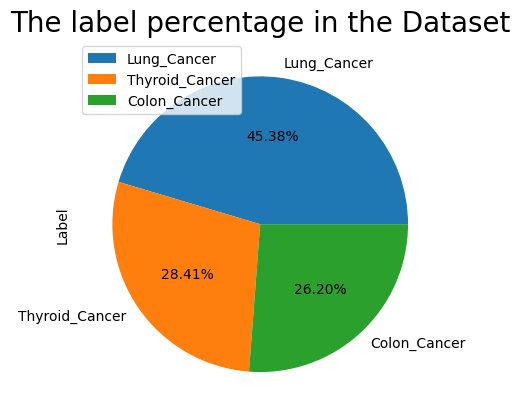

In [100]:
data['Label'].value_counts().plot(kind='pie',autopct="%1.2f%%")
plt.legend()
plt.title("The label percentage in the Dataset",fontsize=20)
plt.show()

**Bar Chart**

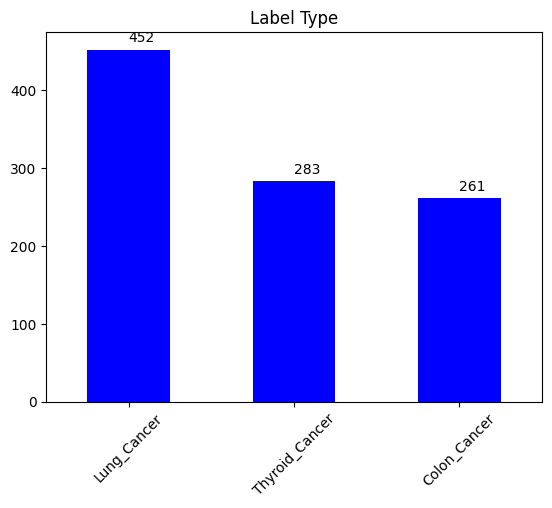

In [101]:
data['Label'].value_counts().plot(kind='bar',color='Blue')
plt.title("Label Type")
plt.xticks(rotation=45)
for i,v in enumerate(data['Label'].value_counts()):
    plt.text(i,v+10,str(v),fontweight='light')
plt.show()

**Kernel distribution of number of words**

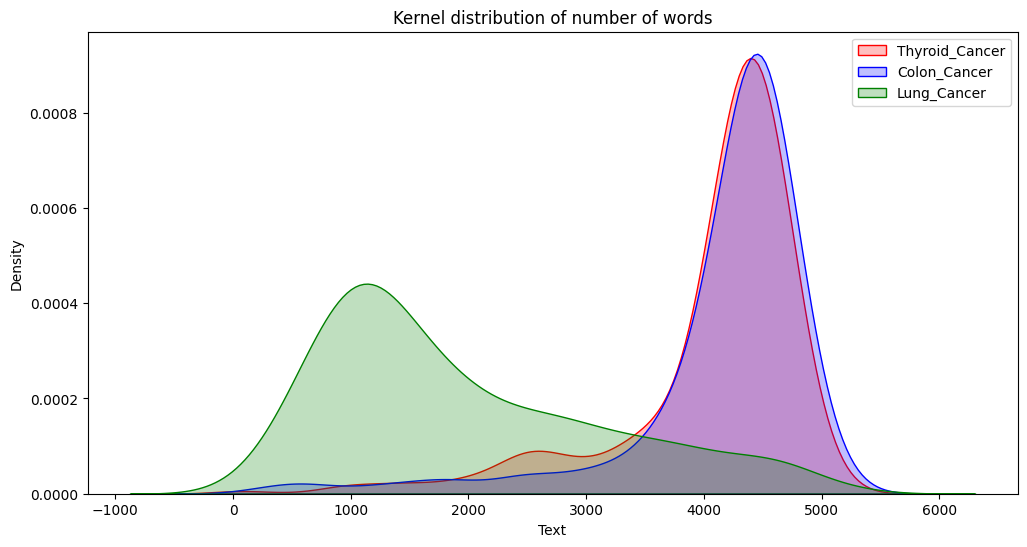

In [102]:
num_1 = data[data['Label']== 'Thyroid_Cancer']['Text'].apply(lambda x: len(x.split()))
num_2 = data[data['Label']== 'Colon_Cancer']['Text'].apply(lambda x: len(x.split()))
num_3 = data[data['Label']== 'Lung_Cancer']['Text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12,6))
sns.kdeplot(num_1, shade=True, color = 'red').set_title('Kernel distribution of number of words')
sns.kdeplot(num_2, shade=True, color = 'blue')
sns.kdeplot(num_3, shade=True, color = 'green')

plt.legend(labels=['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer'])
plt.show()

**Word Cloud**

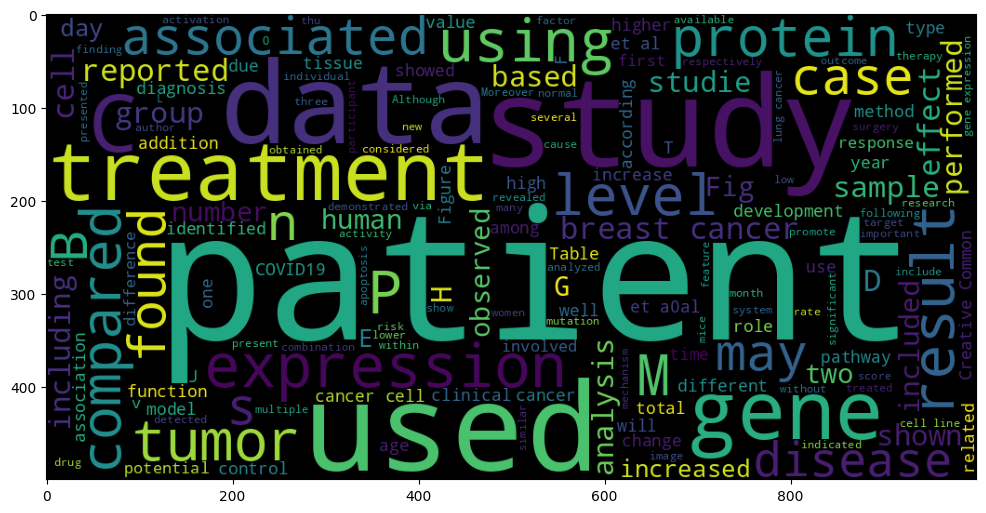

In [103]:
#Visualizing the WordCloud for Thyroid_Cancer from the dataset
plt.figure(figsize=(12,15))
wc=WordCloud(height=500,width=1000,min_font_size=10,background_color='Black')
w_c= wc.generate(data[data['Label']=='Thyroid_Cancer']['Text'].str.cat(sep=" "))
plt.imshow(w_c)


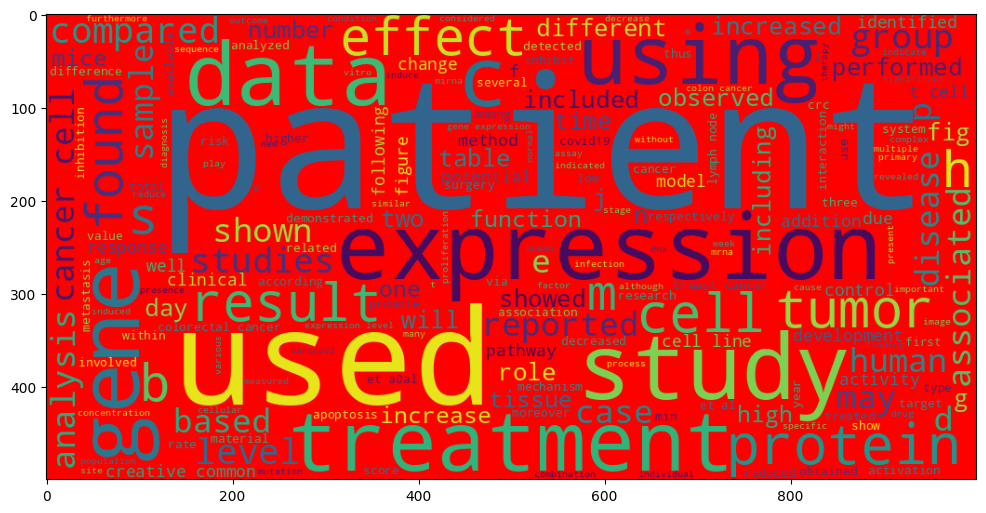

In [104]:
#Visualizing the WordCloud for Colon_Cancer from the dataset
plt.figure(figsize=(12,15))
wc=WordCloud(height=500,width=1000,min_font_size=10,background_color='Red')
wc_1=wc.generate(data[data['Label']=='Colon_Cancer']['Text'].str.cat(sep=" "))
plt.imshow(wc_1)

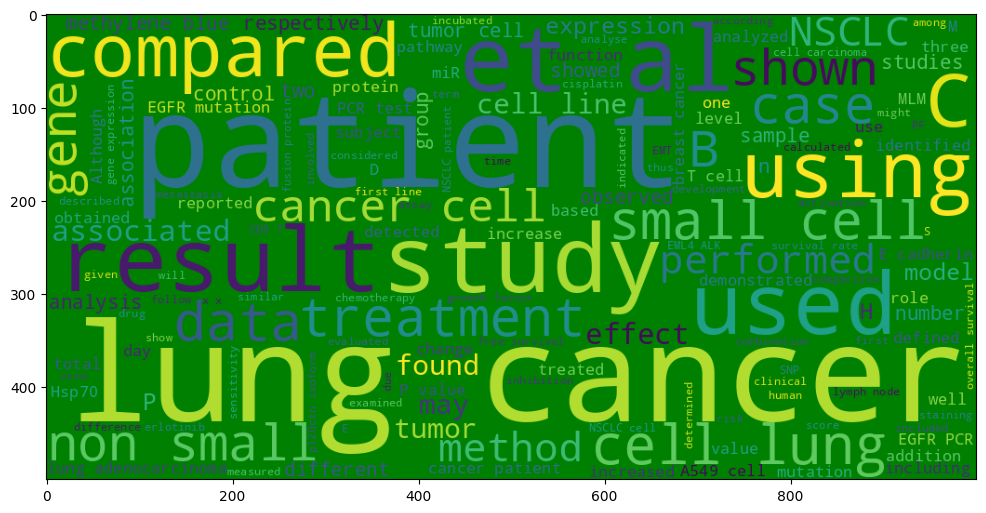

In [105]:
#Visualizing the WordCloud for Lung_Cancer from the dataset
plt.figure(figsize=(12,15))
wc=WordCloud(height=500,width=1000,min_font_size=10,background_color='Green')
wc_2=wc.generate(data[data['Label']=='Lung_Cancer']['Text'].str.cat(sep=" "))
plt.imshow(wc_2)

**DATA PREPROCESSING**

**Removing the numbers in the dataset**

In [106]:
#Define the function for remove the numbers in the dataset
def remove_number(text):
 #Create loop for remove the digits in the dataset
 text="".join([i for i in text if not i.isdigit()])
 #Return to the dataset
 return text
#Apply the above function to the dataset
data['Text']=data['Text'].apply(remove_number)

**Cleaning the text**

In [107]:
#Define the function to clean the text
def clean_text(text):
 pattern = r'[^a-zA-Z\s]'
 text=re.sub(pattern,'',text)
 return text
#Apply to the function to the dataset
data['Text']=data['Text'].apply(clean_text)

**Removing the stopwords**

In [108]:
#Create function to the remove the stopwods
import nltk
nltk.download('stopwords')
names = ['Colon_Cancer', 'Lung_Cancer', 'Thyroid_Cancer']
def clean_stop(text):
  stop_words = stopwords.words('english')
  for name in names:
    stop_words.append(name)
  return " ".join([w.lower() for w in text.split() if w.lower() not in stop_words])
#And finally apply the above function to the dataset
data['Text']=data['Text'].apply(clean_stop)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Tokenization**

In [109]:
#Define the tokenize function
nltk.download('punkt')
def tokenize(d):
 return word_tokenize(d)
data['Text']=data['Text'].apply(tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [110]:
data.head()

Label                                               Text
0  Thyroid_Cancer  [thyroid, surgery, children, single, instituti...
1  Thyroid_Cancer  [adopted, strategy, used, prior, years, based,...
2  Thyroid_Cancer  [coronary, arterybypass, grafting, thrombosis,...
3  Thyroid_Cancer  [solitary, plasmacytoma, sp, skull, uncommon, ...
4  Thyroid_Cancer  [study, aimed, investigate, serum, matrix, met...

**Removing Special Characters**

In [111]:
#removing special character
def remove_special_char(list):
    y=[]
    for string in list:
      if string.isalnum():
        y.append(string)
    return y
data['Text']=data['Text'].apply(lambda x:remove_special_char(x))

In [112]:
data.head()

Label                                               Text
0  Thyroid_Cancer  [thyroid, surgery, children, single, instituti...
1  Thyroid_Cancer  [adopted, strategy, used, prior, years, based,...
2  Thyroid_Cancer  [coronary, arterybypass, grafting, thrombosis,...
3  Thyroid_Cancer  [solitary, plasmacytoma, sp, skull, uncommon, ...
4  Thyroid_Cancer  [study, aimed, investigate, serum, matrix, met...

**Stemming process**

In [113]:
#Create a function to the stemming processs
ps=PorterStemmer()
def stemming(list):
    #Create a empty list
    y=[]
    #Create a for loop for text in list
    for text in list:
        #Then i finallay append to the empty list
        y.append(ps.stem(text))
    #then return to the empty list
    return y
data['Text']=data['Text'].apply(lambda x:stemming(x))
#join the words
data['Text']=data['Text'].apply(lambda x:" ".join(x))


In [114]:
data.head()

Label                                               Text
0  Thyroid_Cancer  thyroid surgeri children singl institut osama ...
1  Thyroid_Cancer  adopt strategi use prior year base four exclus...
2  Thyroid_Cancer  coronari arterybypass graft thrombosi brin bri...
3  Thyroid_Cancer  solitari plasmacytoma sp skull uncommon clinic...
4  Thyroid_Cancer  studi aim investig serum matrix metalloprotein...

**Finding total no. of characters,words and sentences**

In [ ]:
data['char_count']=data['Text'].apply(len)
data['word_count']=data['Text'].apply(lambda x:len(word_tokenize(x)))
data['sentence_count']=data['Text'].apply(lambda x:len(sent_tokenize(x)))
data

Label                                               Text  \
0     Thyroid_Cancer  thyroid surgeri children singl institut osama ...   
1     Thyroid_Cancer  adopt strategi use prior year base four exclus...   
2     Thyroid_Cancer  coronari arterybypass graft thrombosi brin bri...   
3     Thyroid_Cancer  solitari plasmacytoma sp skull uncommon clinic...   
4     Thyroid_Cancer  studi aim investig serum matrix metalloprotein...   
...              ...                                                ...   
6863     Lung_Cancer  missens mutat distribut exon function domain e...   
6929     Lung_Cancer  versu gemcitabinecarboplatin advanc nonsmallce...   
7040  Thyroid_Cancer  keloid patholog scar grow time extend beyond i...   
7485    Colon_Cancer  aniz cell multipl membran compart specif bioch...   
7497    Colon_Cancer  sever immunotherapeut strategi har exquisit im...   

      char_count  word_count  sentence_count  
0          14419        2020               1  
1          11359        1649               1  
2          15621        2102               1  
3          10068        1283               1  
4          17002        2104               1  
...          ...         ...             ...  
6863        6781         987               1  
6929       13475        1942               1  
7040       22072        2844               1  
7485       23123        2890               1  
7497       22811        2959               1  

[996 rows x 5 columns]

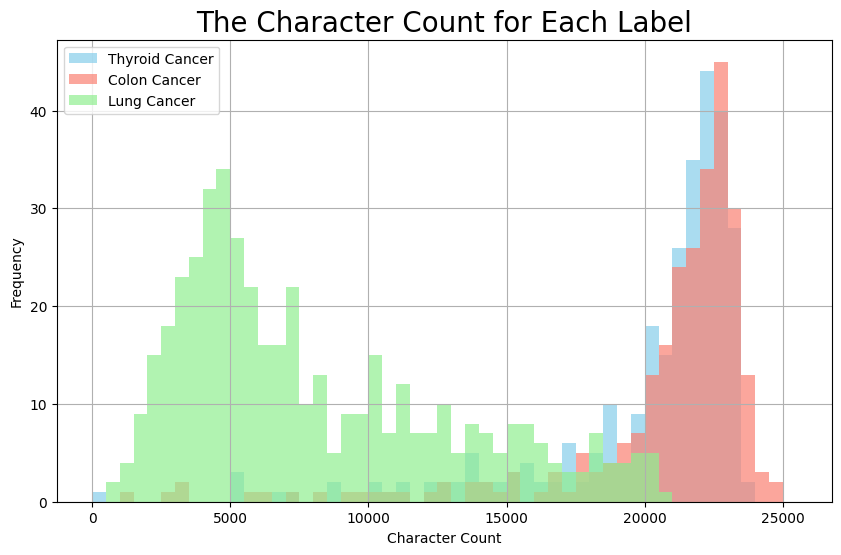

In [ ]:
import matplotlib.pyplot as plt

# Define a larger figure size for better visibility
plt.figure(figsize=(10, 6))

# Define bin edges for consistent bin sizes across all histograms
bin_edges = range(0, max(data['char_count']) + 1, 500)  # Adjust the step size as necessary

# Plot histograms with transparency (alpha) and consistent bins
data[data['Label'] == 'Thyroid_Cancer']['char_count'].plot(kind='hist', bins=bin_edges, alpha=0.7, label='Thyroid Cancer', color='skyblue')
data[data['Label'] == 'Colon_Cancer']['char_count'].plot(kind='hist', bins=bin_edges, alpha=0.7, label='Colon Cancer', color='salmon')
data[data['Label'] == 'Lung_Cancer']['char_count'].plot(kind='hist', bins=bin_edges, alpha=0.7, label='Lung Cancer', color='lightgreen')

# Add legend to the plot to identify each cancer type
plt.legend()

# Add descriptive title and axis labels
plt.title("The Character Count for Each Label", fontsize=20)
plt.xlabel("Character Count")
plt.ylabel("Frequency")

# Show grid for better readability of the plot
plt.grid(True)

# Display the plot
plt.show()

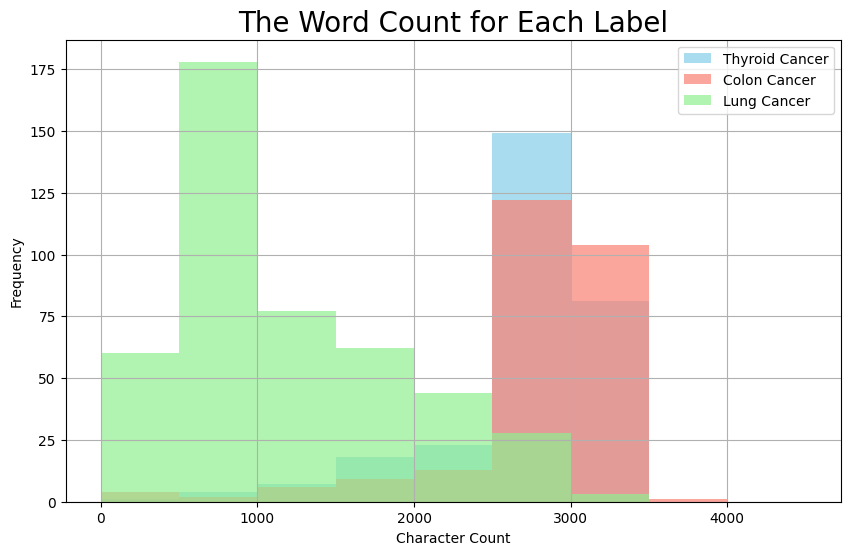

In [ ]:
import matplotlib.pyplot as plt

# Define a larger figure size for better visibility
plt.figure(figsize=(10, 6))

# Define bin edges for consistent bin sizes across all histograms
bin_edges = range(0, 5000, 500)  # Adjust the step size as necessary

# Plot histograms with transparency (alpha) and consistent bins
data[data['Label'] == 'Thyroid_Cancer']['word_count'].plot(kind='hist', bins=bin_edges, alpha=0.7, label='Thyroid Cancer', color='skyblue')
data[data['Label'] == 'Colon_Cancer']['word_count'].plot(kind='hist', bins=bin_edges, alpha=0.7, label='Colon Cancer', color='salmon')
data[data['Label'] == 'Lung_Cancer']['word_count'].plot(kind='hist', bins=bin_edges, alpha=0.7, label='Lung Cancer', color='lightgreen')

# Add legend to the plot to identify each cancer type
plt.legend()

# Add descriptive title and axis labels
plt.title("The Word Count for Each Label", fontsize=20)
plt.xlabel("Character Count")
plt.ylabel("Frequency")

# Show grid for better readability of the plot
plt.grid(True)

# Display the plot
plt.show()

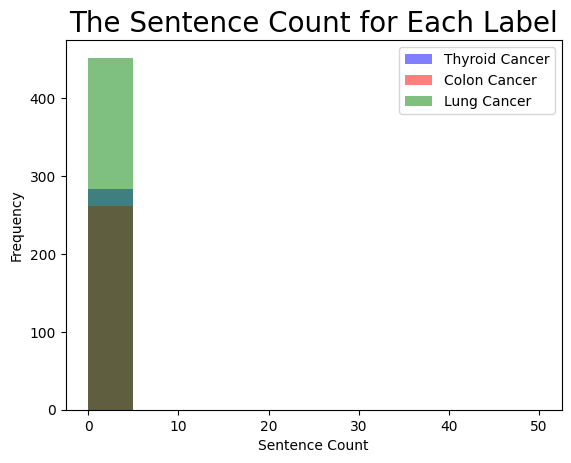

In [ ]:
# Set the bin size and alpha for better visibility
bin_size = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]  # Adjust bin size as needed
alpha_value = 0.5  # Adjust alpha for transparency

# Plot histograms for each cancer type with specified bins and transparency
data[data['Label']=='Thyroid_Cancer']['sentence_count'].plot(kind='hist', bins=bin_size, alpha=alpha_value, label='Thyroid Cancer', color='blue')
data[data['Label']=='Colon_Cancer']['sentence_count'].plot(kind='hist', bins=bin_size, alpha=alpha_value, label='Colon Cancer', color='red')
data[data['Label']=='Lung_Cancer']['sentence_count'].plot(kind='hist', bins=bin_size, alpha=alpha_value, label='Lung Cancer', color='green')

# Add legend to distinguish the cancer types
plt.legend()

# Add title and labels for clarity
plt.title("The Sentence Count for Each Label", fontsize=20)
plt.xlabel("Sentence Count")
plt.ylabel("Frequency")

# Show the plot
plt.show()

In [ ]:
data[['word_count','sentence_count','char_count']]

word_count  sentence_count  char_count
0           2020               1       14419
1           1649               1       11359
2           2102               1       15621
3           1283               1       10068
4           2104               1       17002
...          ...             ...         ...
6863         987               1        6781
6929        1942               1       13475
7040        2844               1       22072
7485        2890               1       23123
7497        2959               1       22811

[996 rows x 3 columns]

**MODEL BUILDING**

In [115]:
#Divided the data into two variables
X=data['Text']
y=data['Label']

In [116]:
#install the TfidfVectorizer
vector=TfidfVectorizer()
#Fit the X data to the TfidfVectorizer
vector.fit(X)
#And transform the
X=vector.transform(X)

In [117]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Logistic Regression**

In [118]:
#Install the logisticregression model
logistic=LogisticRegression()
#And fit the model to the train data
logistic.fit(X_train,y_train)

LogisticRegression()

In [119]:
#Prediction of the logisticregression algorithm
logistic_pred=logistic.predict(X_test)
logistic_pred

array(['Lung_Cancer', 'Lung_Cancer', 'Thyroid_Cancer', 'Lung_Cancer',
       'Thyroid_Cancer', 'Colon_Cancer', 'Colon_Cancer', 'Thyroid_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Thyroid_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Thyroid_Cancer', 'Thyroid_Cancer', 'Lung_Cancer',
       'Colon_Cancer', 'Thyroid_Cancer', 'Lung_Cancer', 'Thyroid_Cancer',
       'Lung_Cancer', 'Thyroid_Cancer', 'Thyroid_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Thyroid_Cancer', 'Lung_Cancer', 'Thyroid_Cancer',
       'Thyroid_Cancer', 'Thyroid_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Colon_Cancer', 'Thyroid_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Colon_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Thyroid_Cancer', 'Colon_Cancer',
       'Thyroid_Cancer', 'Thyroid_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Thyroid_Cancer', 'Colon_Cancer', 'Thyroid_Cancer',
       'Th

In [120]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [121]:
#Check the test score and train score to the logisticregression algorithm
print(f'The Test_accuracy: {logistic.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {logistic.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The Accuracy_score: {accuracy_score(y_test,logistic_pred)*100:.2f}')

The Test_accuracy: 70.28
The Train_accuracy: 97.32
The Accuracy_score: 70.28


**Classification_report and Confusion_matrix**

                precision    recall  f1-score   support

  Colon_Cancer       0.57      0.41      0.48        71
   Lung_Cancer       0.89      1.00      0.94       109
Thyroid_Cancer       0.49      0.54      0.51        69

      accuracy                           0.70       249
     macro avg       0.65      0.65      0.64       249
  weighted avg       0.69      0.70      0.69       249



<Axes: >

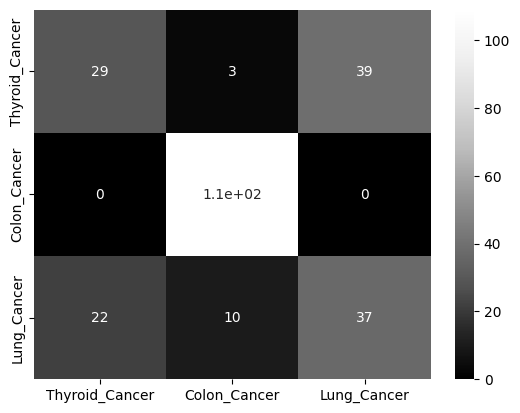

In [122]:
classes = ['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer']
#Classification report
print(classification_report(y_test,logistic_pred))
#confusion_matrix
cn=confusion_matrix(y_test,logistic_pred)
sns.heatmap(cn,annot=True,cmap='Greys_r',xticklabels=classes, yticklabels=classes)

**DecisionTree Classifier**

In [123]:
#Import the DecisionTreeClassifier algortihm
from sklearn.tree import DecisionTreeClassifier
#install the DecisionTreeClassifier model
tree=DecisionTreeClassifier()
#Fit the train data to the model
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [124]:
#Prediction of the DecisionTreeClassifier algorithm
tree_pred=tree.predict(X_test)
tree_pred

array(['Lung_Cancer', 'Lung_Cancer', 'Colon_Cancer', 'Lung_Cancer',
       'Colon_Cancer', 'Colon_Cancer', 'Thyroid_Cancer', 'Thyroid_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Thyroid_Cancer', 'Colon_Cancer',
       'Colon_Cancer', 'Thyroid_Cancer', 'Thyroid_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Colon_Cancer', 'Lung_Cancer', 'Colon_Cancer',
       'Colon_Cancer', 'Thyroid_Cancer', 'Thyroid_Cancer', 'Lung_Cancer',
       'Colon_Cancer', 'Colon_Cancer', 'Lung_Cancer', 'Colon_Cancer',
       'Colon_Cancer', 'Thyroid_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Colon_Cancer', 'Colon_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Colon_Cancer', 'Lung_Cancer', 'Thyroid_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Colon_Cancer', 'Thyroid_Cancer',
       'Colon_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Colon_Cancer', 'Colon_Cancer', 'Colon_Cancer', 'Thyroid_Cancer',
       'C

In [125]:
#Check the test score and train score to the DecisionTreeClassifier algorithm
print(f'The Test_accuracy: {tree.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {tree.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The Accuracy_score: {accuracy_score(y_test,tree_pred)*100:.2f}')

The Test_accuracy: 79.52
The Train_accuracy: 100.00
The Accuracy_score: 79.52


**Classification_report and Confusion_matrix (DT)**

                precision    recall  f1-score   support

  Colon_Cancer       0.65      0.77      0.71        71
   Lung_Cancer       0.91      0.93      0.92       109
Thyroid_Cancer       0.78      0.61      0.68        69

      accuracy                           0.80       249
     macro avg       0.78      0.77      0.77       249
  weighted avg       0.80      0.80      0.79       249



<Axes: >

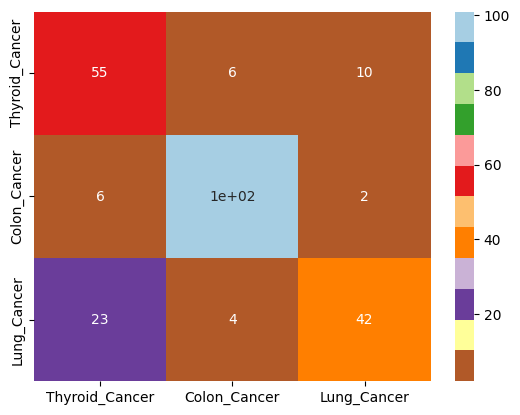

In [126]:
classes = ['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer']
#Classification report
print(classification_report(y_test,tree_pred))
#confusion_matrix
cn=confusion_matrix(y_test,tree_pred)
sns.heatmap(cn,annot=True,cmap='Paired_r',xticklabels=classes, yticklabels=classes)

**RandomForest Classifier**

In [127]:
#Import the RandomForestClassifier algortihm
from sklearn.ensemble import RandomForestClassifier
#install the DecisionTreeClassifier model
random=RandomForestClassifier()
#Fit the train data to the model
random.fit(X_train,y_train)

RandomForestClassifier()

In [128]:
#Prediction of the RandomForestClassifier algorithm
random_pred=random.predict(X_test)
random_pred

array(['Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Thyroid_Cancer', 'Colon_Cancer', 'Colon_Cancer', 'Thyroid_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Colon_Cancer', 'Thyroid_Cancer',
       'Thyroid_Cancer', 'Thyroid_Cancer', 'Thyroid_Cancer',
       'Lung_Cancer', 'Colon_Cancer', 'Thyroid_Cancer', 'Lung_Cancer',
       'Thyroid_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Thyroid_Cancer',
       'Lung_Cancer', 'Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer',
       'Thyroid_Cancer', 'Colon_Cancer', 'Colon_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Colon_Cancer', 'Colon_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Thyroid_Cancer', 'Lung_Cancer', 'Colon_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Colon_Cancer',
       'Thyroid_Cancer', 'Colon_Cancer', 'Thyroid_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Colon_Cancer', 'Colon_Cancer', 'Thyroid_Cancer',
       'Thyroid_Ca

In [129]:
#Check the test score and train score to the RandomForestClassifier algorithm
print(f'The Test_accuracy: {random.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {random.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The Accuracy_score: {accuracy_score(y_test,random_pred)*100:.2f}')

The Test_accuracy: 70.28
The Train_accuracy: 100.00
The Accuracy_score: 70.28


**Classification_report and Confusion_matrix(RF)**

                precision    recall  f1-score   support

  Colon_Cancer       0.52      0.39      0.45        71
   Lung_Cancer       0.93      1.00      0.96       109
Thyroid_Cancer       0.49      0.55      0.52        69

      accuracy                           0.70       249
     macro avg       0.65      0.65      0.64       249
  weighted avg       0.69      0.70      0.69       249



<Axes: >

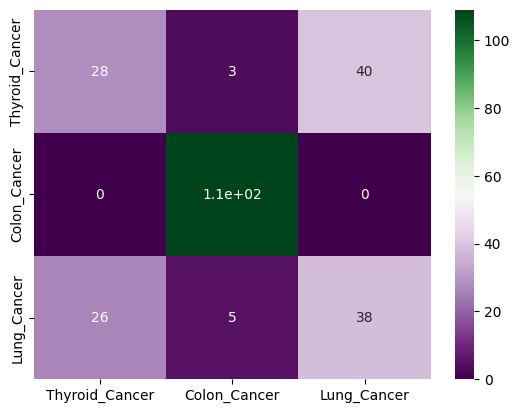

In [130]:
classes = ['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer']
#Classification report
print(classification_report(y_test,random_pred))
#confusion_matrix
cn=confusion_matrix(y_test,random_pred)
sns.heatmap(cn,annot=True,cmap='PRGn',xticklabels=classes, yticklabels=classes)

**MultinomialNB**

In [131]:
#Import the MultinomialNB algorithm to train the our model
from sklearn.naive_bayes import MultinomialNB
#install the model
multinomial=MultinomialNB()
#fit the train data to our model
multinomial.fit(X_train,y_train)

MultinomialNB()

In [132]:
#Prediction to the test data MultinomialNB
multinomial_pred=multinomial.predict(X_test)
multinomial_pred

array(['Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Thyroid_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Colon_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Lung_

In [133]:
 #Check the test score and train score to the MultinomialNB algorithm
print(f'The Test_accuracy: {multinomial.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {multinomial.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The Accuracy_score: {accuracy_score(y_test,multinomial_pred)*100:.2f}')

The Test_accuracy: 44.18
The Train_accuracy: 52.88
The Accuracy_score: 44.18


**Classification_report and Confusion_matix (MNB)**

                precision    recall  f1-score   support

  Colon_Cancer       0.00      0.00      0.00        71
   Lung_Cancer       0.44      1.00      0.62       109
Thyroid_Cancer       0.33      0.01      0.03        69

      accuracy                           0.44       249
     macro avg       0.26      0.34      0.21       249
  weighted avg       0.29      0.44      0.28       249



<Axes: >

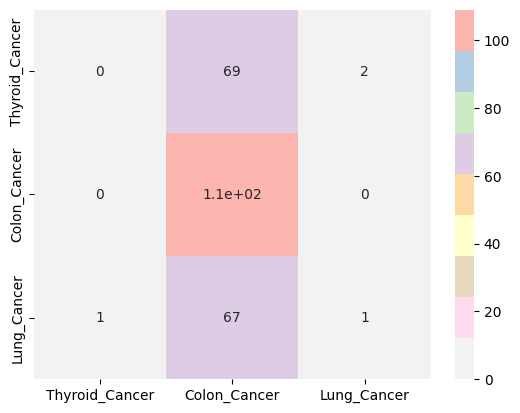

In [134]:
classes = ['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer']
#Classification report
print(classification_report(y_test,multinomial_pred))
#confusion_matrix
cn=confusion_matrix(y_test,multinomial_pred)
sns.heatmap(cn,annot=True,cmap='Pastel1_r',xticklabels=classes, yticklabels=classes)

**XGB Classifier**

In [135]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit and transform the target variable to encode the string labels to integers
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create the XGBClassifier instance
xgb = XGBClassifier()

# Fit the model with the transformed target variable
xgb.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [136]:
#Prediction to the test data XGBClassifier
xgb_pred = xgb.predict(X_test)
xgb_pred

array([1, 1, 1, 1, 2, 0, 0, 2, 1, 1, 2, 1, 2, 2, 2, 1, 0, 0, 1, 0, 1, 2,
       2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 2, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2, 2, 0, 2, 1, 2, 2,
       2, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1,
       2, 0, 0, 1, 2, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0,
       2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 2, 1, 1, 2, 1, 1, 2, 2, 1, 0, 1,
       2, 2, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1,
       1, 2, 2, 2, 1, 0, 2])

In [137]:
#Check the test score and train score to the XGBClassifier algorithm
print(f'The Test_accuracy: {xgb.score(X_test,y_test_encoded)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {xgb.score(X_train,y_train_encoded)*100:.2f}')
#Check the accuracy_score to the model
print(f'The Accuracy_score: {accuracy_score(y_test_encoded,xgb_pred)*100:.2f}')

The Test_accuracy: 87.55
The Train_accuracy: 100.00
The Accuracy_score: 87.55


**Classification_report and Confusion_matrix (XGB)**

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        71
           1       0.94      0.99      0.96       109
           2       0.84      0.70      0.76        69

    accuracy                           0.88       249
   macro avg       0.86      0.85      0.85       249
weighted avg       0.87      0.88      0.87       249



<Axes: >

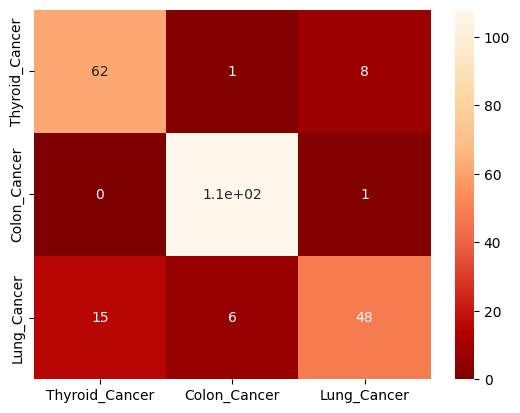

In [138]:
classes = ['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer']
#Classification report
print(classification_report(y_test_encoded,xgb_pred))
#confusion_matrix
cn=confusion_matrix(y_test_encoded,xgb_pred)
sns.heatmap(cn,annot=True,cmap='OrRd_r',xticklabels=classes, yticklabels=classes)

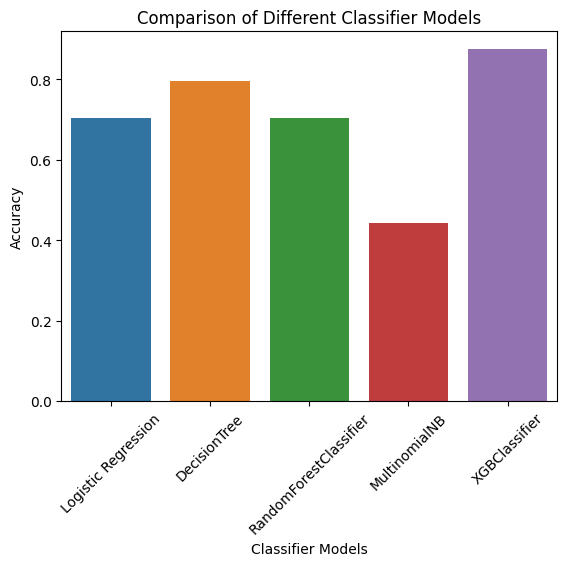

In [139]:
#comparing the accuracy of different models
models = ['Logistic Regression','DecisionTree', 'RandomForestClassifier', 'MultinomialNB', 'XGBClassifier']
preds = [logistic_pred,tree_pred,random_pred,multinomial_pred,xgb_pred]
# Calculating accuracies
accuracys = []
for i, pred in enumerate(preds):
    if models[i] == 'XGBClassifier':
        # Use y_test_encoded for XGBClassifier
        acc = accuracy_score(y_test_encoded, pred)
    else:
        # Use y_test for other models
        acc = accuracy_score(y_test, pred)
    accuracys.append(acc)

# Plotting
sns.barplot(x=models, y=accuracys)
plt.xlabel('Classifier Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Different Classifier Models')
plt.xticks(rotation=45)  # Rotating model names for better readability
plt.show()

**Deep Learning models**

In [140]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Input, Flatten, LSTM, Bidirectional, Embedding, Dropout, GlobalMaxPooling1D, TimeDistributed, GRU, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Sequential, load_model, Model
from keras.optimizers import Adam
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer

In [141]:
# Create dummy values for the dataset and split the data
y = pd.get_dummies(data['Label'])
X = data['Text']
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42)
X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, test_size=0.3, random_state=42)

In [142]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, Bidirectional, LSTM, Dropout, Dense
from keras.callbacks import EarlyStopping

# Tokenization and Padding
max_words = 5000
max_len = 300  # Adjust as necessary
tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
tokenizer.fit_on_texts(data['Text'])

def tokenize_and_pad(text):
    sequences = tokenizer.texts_to_sequences(text)
    padded = pad_sequences(sequences, maxlen=max_len, padding='post')
    return padded

# Apply to your dataset
X_trn_padded = tokenize_and_pad(X_trn)
X_vld_padded = tokenize_and_pad(X_vld)

# Model Building
vocab_size = 5000
embedding_size = 32
num_classes = y_trn.shape[1]

model = Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax' if num_classes > 2 else 'sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy', metrics=['accuracy'])

# Early Stopping
es = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

# Fit the model
history = model.fit(X_trn_padded, y_trn, validation_data=(X_vld_padded, y_vld), epochs=50, callbacks=[es])


Epoch 1/50
18/18 [==============================] - 14s 599ms/step - loss: 1.0840 - accuracy: 0.4219 - val_loss: 1.0546 - val_accuracy: 0.4728
Epoch 2/50
18/18 [==============================] - 5s 252ms/step - loss: 1.0512 - accuracy: 0.4488 - val_loss: 1.0229 - val_accuracy: 0.4728
Epoch 3/50
18/18 [==============================] - 4s 244ms/step - loss: 0.9465 - accuracy: 0.4524 - val_loss: 0.7958 - val_accuracy: 0.5146
Epoch 4/50
18/18 [==============================] - 6s 328ms/step - loss: 0.7348 - accuracy: 0.7181 - val_loss: 0.8517 - val_accuracy: 0.6485
Epoch 5/50
18/18 [==============================] - 7s 409ms/step - loss: 0.6052 - accuracy: 0.7253 - val_loss: 0.6470 - val_accuracy: 0.6485
Epoch 6/50
18/18 [==============================] - 5s 267ms/step - loss: 0.4646 - accuracy: 0.7343 - val_loss: 0.6553 - val_accuracy: 0.6527
Epoch 7/50
18/18 [==============================] - 6s 346ms/step - loss: 0.4098 - accuracy: 0.7774 - val_loss: 0.5446 - val_accuracy: 0.6820
Epoch

In [143]:
# Assuming the tokenizer and max_len are already defined and set up as shown in the previous snippet

def tokenize_and_pad(text):
    sequences = tokenizer.texts_to_sequences(text)
    padded = pad_sequences(sequences, maxlen=max_len, padding='post')
    return padded

# Preprocess the test data
X_tst_padded = tokenize_and_pad(X_tst)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_tst_padded, y_tst, verbose=0)

# Print metrics
print('Accuracy : {:.4f}'.format(accuracy))

Accuracy : 0.6850


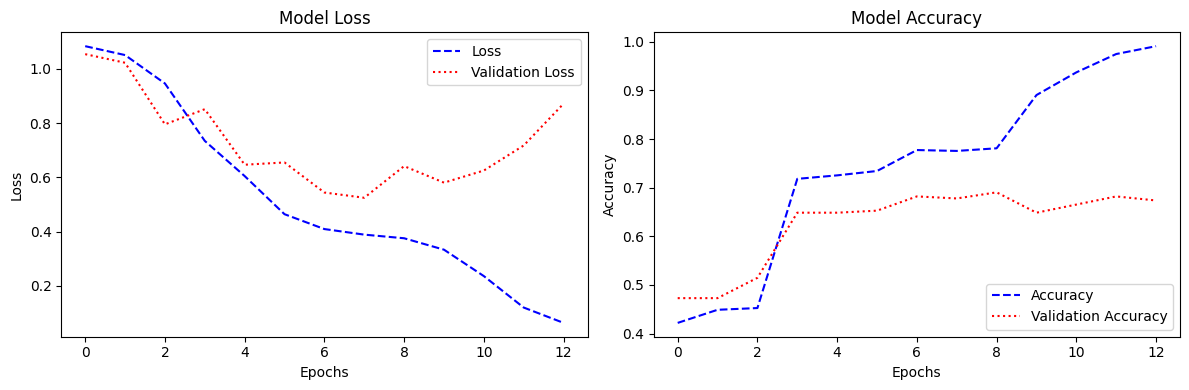

In [144]:
import matplotlib.pyplot as plt

# Assuming 'history' is the variable holding the output of the model.fit() method
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label='Loss')
plt.plot(history.history['val_loss'], 'r:', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b--', label='Accuracy')
plt.plot(history.history['val_accuracy'], 'r:', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


In [145]:
text='covid pandem emerg depart note signific decreas strokepati perform time analysi bavarian telestrok tempi work diagnosi databasemethod twelv hospit tempi network select data collect januari april year extract analyz presum definit ischem stroke amongst otherdisord addit recommend intraven thrombolysi rtpa endovascular thrombectomi evtwer note mobil data region analyz statist valid groupcomparison test fishersexact test consid unpair observ apvalu consid significantresult upon lockdown midmarch observ signific reduct recommend rtpa compar preced three year vs p recommend evt werep reflect increas import follow covid lockdown midmarch number ofevt decreas back level vs p absolut number issignificantli higher januari midmarch compar vs decreas parallel mobil data reduc stroke incid covid pandem may part explain patientavoid seek emerg stroke care may associ popul mobil increas mobilitymay induc rebound effect may conflict potenti second covid wave telemed network mayb ideal databas studi effect nearreal timekeywordstelestrok covid lockdown stroke thrombolysisd receiv may date accept june introductionimplement social distanc combat theimpact corona viru pandem sequela emergeda major strategi contain spread infectiongiven lack specic treatment covid andlimit intens care resourc major concern forstrok neurologistsin extraordinari scenarioinclud follow rapid specic managementof case acut stroke possibl covidfrom initi stroke call preclin set ambul system emerg depart hospit stroke depart thedepart neurolog univers regensburg bezirksklinikumregensburg tempi telemed stroke center regensburg germanyct herdeck germanydepart neurolog tempi telemed stroke centeracadem teach hospit univers munich munchen klinikharlach munich germanycorrespond authorfelix schlachetzki md depart neurolog univers ofregensburg center vascular neurolog intens care tempistelemed stroke center bezirksklinikum regensburguniversitatsstr regensburg germanyemail felixschlachetzkiklinikuniregensburgd c telemedicin telecar bthe factneuroradiolog depart need aid instrok diagnosi treatmentthatpati mild stroke symptom transient ischem attack tia may reluct request hospitaladmiss acut stroke c coviditself associ sever stroke syndrom issuggest recent case seri covid patientsfrom wuhan china focus neurolog symptom describ cerebrovascular event case especi elderli patient thosewith sever infect also author secondcas seri report unusu case young covidpati yr larg vessel stroke otherauthor report three stroke patient coagulopathi antiphospholipid antibodi context ofsever covid infectionsth number ofin contrast sever stroke depart germanyinclud usa china note asignific drop number stroke patient admiss corona pandem data phenomenon still scarc howeverin descriptivereport morelli piacenza lombardyitali cover period februari appear ofth rst sarscov patient record itali march stroke admissionsdecreas averag largevessel occlus lvo two tia one lvoand three lacunar stroke use commerci neuroimag databas rapid softwar platform kasangra hamilton observ decreas stroke imag procedur nadirfollow rst statewid stayathom order theusa decreas observ age sex andstrok sever subgroup within participatinghospit process overal patientsbetween juli april cardiologistsin franc observ similar signific drop admiss nine intens cardiac care unit initiationof social distanc selfquarantin midmarch overal scarc data avail theimpact covid infect cardiovascular morbid includ cerebr strokeaim hypothesisth primari aim studi evalu effectof covid pandem lockdown stroke consult treatment recommend use theacut consult databas telestrok networktempi focus data collect therst four month includ emerg corona viru pandem southeasternbavaria rst two month social distancingregion shutdown compar data withcompar data collect month inth year methodsdata daili consult clinic withoutneurolog departmentsin telestrok networktempi form basi studi consultationstook place januari april year data pseudonym weextract actual work diagnos base telemed consult neuroimag result mainlycerebr comput tomographi two major databaseswer use calcul popul within district wwwdestatisd experiencearcgiscomexperienceacebbbfdpagepag retrospect studi approvedbi local ethic committe univers ofregensburg perform accord guidelin declar helsinkimobl data avail wwwapplecomcovidmobl extract data gener rel request volum directionsin munich germani compar base volumeon januari observ relationship ofmobl report stroke declin piacenzaw also extract mobil data milan close topiacenza italyth major work diagnost group asfollow ischem stroke b tia c intracranialhaemorrhag epilept seizur e migrain andf disord includ facial palsi headacheand brain tumour also includ case whichther recommend iv thrombolysi ivrtpa endovascular therapi evt thrombectomyfor lvoexploratori descript summari statist withmean valu standard deviat appliedin analysi data cover januari aprilin year comparison data coveringth period count present agraph display show incid standard today period statist valid especi percentag recommend iv thrombolysi andthrombectomi groupcomparison test withfish exact test consid unpair observationsa pvalu consid significantresultsther telemed consult thespec time frame investig popul inth geograph area cover rural hospit hospit resid area ahigh number covid case figur cschlachetzki number covidposit case whole ofbavaria rose end februari case april public lockdownwa initi march howev recommend person quarantin peopl hadtravel northern itali broadcast earlier march munich applevr mobil trend demonstr decreas walk activ midmarch baselin levelin milan lombardi itali march walk activ began decreas soon reach baselineact remain fairli constantthereafterfigur boveral consult analys exclud nonacut consult within thenetwork ie followup examin statist signific chang number recommend foriv thrombolysi observ figur cwhile iv thrombolysi recommendedin consult suspect ischemicstrok frequenc recommend decreas p differ number ivthrombolysi recommend observ duringth time period cover januari march vs notfigur incid new covid infect bavaria april red dot indic network hospit green andyellow squar depict two academ stroke centr altern weekli tempi consult servic modifi permiss bavarian state offic health food safeti httpwwwlglbayerndegesundheitinfektionsschutzinfektionskrankheitenazcoronaviruskartecoronaviru b mobil data accord covid mobil trend report appl thedata reflect request rout appl map munich resid centr tempi network milan nearpiacenza first declin number stroke report morelli horizont dot line indic reportedreduc stroke activ piacenza c recommend absolut number applic iv thrombolysi thrombectomyvert dash line indic offici begin lockdown bavaria time patient number yaxi standard today period xaxi month compens shorter februari longer januari march month j januari first half j januari second half f februari march april work diagnos telestrokeconsult vertic dash line indic offici begin lockdown bavaria time patient number yaxi arestandard day period xaxi month compens shorter februari longer januari march month j januari first half j januari second half f februari march april c telemedicin telecar signific trend fewer recommend forevt observ march april compar time period vs howev preced time frame januari march significantli recommend thrombectomi made comparedwith vs p data reect develop consultationsand treatment recommend lvo network onward number recommend evt steadili rose increas evidencefor recan even later time window andincreas employ comput tomographi angiographi tempi network tabl show thedevelop consult end ofth studi includ lockdown period show adrop number consult importantli fewer recommend iv thrombolysisand evt suggest fewer incid ischemicstrok sever tabl figur dalthough bavaria state highestnumb covid case germani especi inour region perform telestrok consult network hospit possiblecovid infect discuss includ singlepati stroke symptom feverdiscussionth tempi telestrok work data conrm thecurr observ low stroke incid insoutheastern bavaria rel proport thework diagnosi remain similar number ofcas disabl stroke intracrani haemorrhag ischem stroke requir iv rtpa evtalso diminish challeng theori onlypati avoid call emerg treatment isrespons phenomenon studi also demonstr potenti import telestrokenetwork current covid pandemicth observ fewer stroke case thecovid pandem seem contradict two essentialassumpt regard stroke risk sarcov strong risk factor stroke b physicalinact lockdown set may increas riskof stroke especi among elderli person firstsarcov may induc hypercoagul highlevel creactiv protein ddimer interleukinplac patient risk develop thrombot complic seri intens care unit patientsin netherland report klok threestrok complic cours covid whereasth major complic includ pulmonarythrombosiscatheterassociatedembol n peripher venou thrombosisn andobserv case seri concurr covid infect complic trigger unusu ischemicstrok may well prevail case control studi focus phenomenon urgent need afrmor deni assert second physic inact aprofound effect atrial brillat obes diabetesmellitu manag hypertens among othersand contradict current recommend mid andlongterm stroke prevent recent studi consecut patient nonstseg elevationacut coronari syndrom acss optic coher tomographi culprit lesion report bykato found combin greaterphys activ outdoor ac onset high bodymass index signific effect incid ofcoronari plaqu eros interestingli mobil datasuch provid appl mobil databasevr demonstr parallel reduct incidencesof stroke ac three publish paper inaddit oursour data conrm observ morelli term phrase bafe case ischemicstrok disappear author also discuss thatthi effect can not total explain mere thereluct patient call help stroke emerg number case present withsever stroke requir evt number generalconsult tempi also decreas analysisbas larg databas associ applic rapid softwar acut stroke kansagra line observ also severestrok patient diminish earli lockdownphas number ischem core volum ml greater ml observ decreasebi respect core volum ml decreas smallcor infarct volum measur ml decreas decreas number small infarctvolum may well explain gener propos hesit seek emerg care thereduct larg ischem core volum morelik due fewer lvo observ studywith sharp declin iv thrombolysi thrombectomi recommendationsanoth explan may concurr low infect rate virus trigger atherosclerosi plaqu ruptur result neuro andcardiovascular morbid lockdown onlyreduc physic activ strict social distanc andus facial mask also lead low rate ofexposur transmiss common virusesand allergen appear triggerstrok addit studi detail analys cschlachetzki stekcarberauqsniatadhtnomehtfoshtgneltnereffidrofstnemtsudajtuohtiwtubsdoirepkeewotnidedvdiilirpayraunajrofsnoitatlusnocforebmunlatotlebatrparparamrambefbefnajnajsopdvocilatotairavabnisesacnoitaiveddradnatsdnaseulavnaemnimorfatadwohssipmetkrowtenekortsnoitatlusnoceetl snp p snpp lsisyobmorhtvi ytilibadaerrettebrofldoblynoerasrebmunldobskcattaicmehcsitneisnartatiamotamehlarudbushdsegahrromehidonhcarabushasegahrromeahlainarcartnihciigndeebllainarcartnsnsnbppcpp iid naemsnoitatlusnocekortsicmehcsid naemd naemymotcebmorhtd naemd naema tid naemh cid naemhashdsbcieniargimeruziessrehto c telemedicin telecar symptom onsettodoor time stroke sever neuroimag inammatori marker need tounderstand reason reduc number revascular therapi request covidpandemiclimit studyanalysi daili work diagnos tempistelestrok network advantag highlytim yet lack specic nal diagnosismay differ initi one may compens creation larg common databas fortelestrok network incorpor correct forth actual popul cover analys otherstrokerel databas one associatedwith rapid softwar healthcar provid databasesand common stroke registri qualiti control thedecreas number thrombectomi recommend cohort midmarch reach statist signic compar sameperiod year rate forthi procedur increas accord level evid agreement develop thrombectomi recommend tempi neurologist prior covid pandem occur morefrequ previou yearssour studi use tempi telestrok databas conrm lower incid ischem stroke otheracut neurolog disord requir consultationsuch intracerebr haemorrhag seizur disorderand migrain next reluct within popul seek immedi medic assist acutestrok covid lockdown result inless physic activ fewer common infect may also respons fewer numberof patient sever stroke especi withintracrani haemorrhag elig recan therapi lockdownassoci factor areinde respons lower stroke incid mayexpect rebound effect follow lockdown periodwith increas incid stroke well ofmyocardi infarct traumat brain injuri aspati frailti may increas lockdown analys larg stroke databas may revealfurth insight phenomenon howev telestrok network tempi may ideal tool tomonitor stroke occurr real timeacknowledgmentsth author acknowledg consult neurologist intempi colleaguesin badin partner hospitalsebersbergburglengenfeldreichenhalleggenfeldenerd freis kelheim mu hldorf rotthalmu nstervilsbiburg dingolng zwiesel author like tothank jo ann elison elsdfor edit thispap english grammar languagedeclar conflict intereststh author declar potenti conict interest withrespect research authorship andor public thisarticleanonym data avail requestfundingth author receiv nancial support researchauthorship andor public articleorcid idfelix schlachetzkiorcidorgrefer jawaid protect older adult social distanc scienc khosravani h rajendram p notario l protectedcod stroke hyperacut stroke manag thecoronaviru diseas covid pandem stroke marku hs brainin covid stroke global world stroke organ perspect int jstroke mao l jin h wang neurolog manifestationsof hospit patient coronaviru diseas inwuhan china jama neurol oxley tj mocco j majidi largevessel stroke asa present featur covid young n engl jmed e zhang xiao zhang coagulopathi andantiphospholipid antibodi patient covidn engl j med e zhao j rudd liu r challeng potentialsolut stroke care coronaviru diseas covid outbreak stroke morelli n rota e terracciano c bafe caseofischem stroke disappear casualtydepart covid era eur neurol kansagra ap goyal ms hamilton collateraleffect covid stroke evalu unitedst n englnejmc onlin ahead printj meddoi huet f prieur c schurtz g one train may hideanoth acut cardiovascular diseas could neglectedbecaus covid pandem arch cardiovasc di bansal cardiovascular diseas coviddiabet metab syndr audebert hj schenkel j heuschmann pu effectsof implement telemed stroke networkth telemed pilot project integr stroke care cschlachetzki tempi bavaria germani lancet neurol patel uk malik p demasi multidisciplinaryapproach outcom teleneurolog reviewcureu e terpo e ntanasisstathopoulo elalami hematolog nding complic covid j hematol klok fa kruip van der meer njm incidenceof thrombot complic critic ill icu patientswith covid thromb re kyu hh bachman vf alexand lt physicalact risk breast cancer colon cancer diabetesischem heart diseas ischem stroke eventsaystemat review doserespons metaanalysi forth global burden diseas studi bmj kato minami katsura physic exert asa trigger acut coronari syndrom caus plaqueeros j thromb thrombolysi grau aj urbanek c palm f common infectionsand risk stroke nat rev neurol pagliano p spera ascion infect caus stroke strokelik syndrom infect campbel bcv donnan ga lee kr endovascular stent thrombectomi new standardof care larg vessel ischaem stroke lancet neurol vinni pw vishnu vy padma srivastava mvthrombectomi hour stroke n engl jmed c'
text=[text]
text_int=vector.transform(text)
prediction=tree.predict(text_int)
f" Biomedical text document classification is {prediction[0]}"

' Biomedical text document classification is Colon_Cancer'

In [146]:
text='covid pandem emerg depart note signific decreas strokepati perform time analysi bavarian telestrok tempi work diagnosi databasemethod twelv hospit tempi network select data collect januari april year extract analyz presum definit ischem stroke amongst otherdisord addit recommend intraven thrombolysi rtpa endovascular thrombectomi evtwer note mobil data region analyz statist valid groupcomparison test fishersexact test consid unpair observ apvalu consid significantresult upon lockdown midmarch observ signific reduct recommend rtpa compar preced three year vs p recommend evt werep reflect increas import follow covid lockdown midmarch number ofevt decreas back level vs p absolut number issignificantli higher januari midmarch compar vs decreas parallel mobil data reduc stroke incid covid pandem may part explain patientavoid seek emerg stroke care may associ popul mobil increas mobilitymay induc rebound effect may conflict potenti second covid wave telemed network mayb ideal databas studi effect nearreal timekeywordstelestrok covid lockdown stroke thrombolysisd receiv may date accept june introductionimplement social distanc combat theimpact corona viru pandem sequela emergeda major strategi contain spread infectiongiven lack specic treatment covid andlimit intens care resourc major concern forstrok neurologistsin extraordinari scenarioinclud follow rapid specic managementof case acut stroke possibl covidfrom initi stroke call preclin set ambul system emerg depart hospit stroke depart thedepart neurolog univers regensburg bezirksklinikumregensburg tempi telemed stroke center regensburg germanyct herdeck germanydepart neurolog tempi telemed stroke centeracadem teach hospit univers munich munchen klinikharlach munich germanycorrespond authorfelix schlachetzki md depart neurolog univers ofregensburg center vascular neurolog intens care tempistelemed stroke center bezirksklinikum regensburguniversitatsstr regensburg germanyemail felixschlachetzkiklinikuniregensburgd c telemedicin telecar bthe factneuroradiolog depart need aid instrok diagnosi treatmentthatpati mild stroke symptom transient ischem attack tia may reluct request hospitaladmiss acut stroke c coviditself associ sever stroke syndrom issuggest recent case seri covid patientsfrom wuhan china focus neurolog symptom describ cerebrovascular event case especi elderli patient thosewith sever infect also author secondcas seri report unusu case young covidpati yr larg vessel stroke otherauthor report three stroke patient coagulopathi antiphospholipid antibodi context ofsever covid infectionsth number ofin contrast sever stroke depart germanyinclud usa china note asignific drop number stroke patient admiss corona pandem data phenomenon still scarc howeverin descriptivereport morelli piacenza lombardyitali cover period februari appear ofth rst sarscov patient record itali march stroke admissionsdecreas averag largevessel occlus lvo two tia one lvoand three lacunar stroke use commerci neuroimag databas rapid softwar platform kasangra hamilton observ decreas stroke imag procedur nadirfollow rst statewid stayathom order theusa decreas observ age sex andstrok sever subgroup within participatinghospit process overal patientsbetween juli april cardiologistsin franc observ similar signific drop admiss nine intens cardiac care unit initiationof social distanc selfquarantin midmarch overal scarc data avail theimpact covid infect cardiovascular morbid includ cerebr strokeaim hypothesisth primari aim studi evalu effectof covid pandem lockdown stroke consult treatment recommend use theacut consult databas telestrok networktempi focus data collect therst four month includ emerg corona viru pandem southeasternbavaria rst two month social distancingregion shutdown compar data withcompar data collect month inth year methodsdata daili consult clinic withoutneurolog departmentsin telestrok networktempi form basi studi consultationstook place januari april year data pseudonym weextract actual work diagnos base telemed consult neuroimag result mainlycerebr comput tomographi two major databaseswer use calcul popul within district wwwdestatisd experiencearcgiscomexperienceacebbbfdpagepag retrospect studi approvedbi local ethic committe univers ofregensburg perform accord guidelin declar helsinkimobl data avail wwwapplecomcovidmobl extract data gener rel request volum directionsin munich germani compar base volumeon januari observ relationship ofmobl report stroke declin piacenzaw also extract mobil data milan close topiacenza italyth major work diagnost group asfollow ischem stroke b tia c intracranialhaemorrhag epilept seizur e migrain andf disord includ facial palsi headacheand brain tumour also includ case whichther recommend iv thrombolysi ivrtpa endovascular therapi evt thrombectomyfor lvoexploratori descript summari statist withmean valu standard deviat appliedin analysi data cover januari aprilin year comparison data coveringth period count present agraph display show incid standard today period statist valid especi percentag recommend iv thrombolysi andthrombectomi groupcomparison test withfish exact test consid unpair observationsa pvalu consid significantresultsther telemed consult thespec time frame investig popul inth geograph area cover rural hospit hospit resid area ahigh number covid case figur cschlachetzki number covidposit case whole ofbavaria rose end februari case april public lockdownwa initi march howev recommend person quarantin peopl hadtravel northern itali broadcast earlier march munich applevr mobil trend demonstr decreas walk activ midmarch baselin levelin milan lombardi itali march walk activ began decreas soon reach baselineact remain fairli constantthereafterfigur boveral consult analys exclud nonacut consult within thenetwork ie followup examin statist signific chang number recommend foriv thrombolysi observ figur cwhile iv thrombolysi recommendedin consult suspect ischemicstrok frequenc recommend decreas p differ number ivthrombolysi recommend observ duringth time period cover januari march vs notfigur incid new covid infect bavaria april red dot indic network hospit green andyellow squar depict two academ stroke centr altern weekli tempi consult servic modifi permiss bavarian state offic health food safeti httpwwwlglbayerndegesundheitinfektionsschutzinfektionskrankheitenazcoronaviruskartecoronaviru b mobil data accord covid mobil trend report appl thedata reflect request rout appl map munich resid centr tempi network milan nearpiacenza first declin number stroke report morelli horizont dot line indic reportedreduc stroke activ piacenza c recommend absolut number applic iv thrombolysi thrombectomyvert dash line indic offici begin lockdown bavaria time patient number yaxi standard today period xaxi month compens shorter februari longer januari march month j januari first half j januari second half f februari march april work diagnos telestrokeconsult vertic dash line indic offici begin lockdown bavaria time patient number yaxi arestandard day period xaxi month compens shorter februari longer januari march month j januari first half j januari second half f februari march april c telemedicin telecar signific trend fewer recommend forevt observ march april compar time period vs howev preced time frame januari march significantli recommend thrombectomi made comparedwith vs p data reect develop consultationsand treatment recommend lvo network onward number recommend evt steadili rose increas evidencefor recan even later time window andincreas employ comput tomographi angiographi tempi network tabl show thedevelop consult end ofth studi includ lockdown period show adrop number consult importantli fewer recommend iv thrombolysisand evt suggest fewer incid ischemicstrok sever tabl figur dalthough bavaria state highestnumb covid case germani especi inour region perform telestrok consult network hospit possiblecovid infect discuss includ singlepati stroke symptom feverdiscussionth tempi telestrok work data conrm thecurr observ low stroke incid insoutheastern bavaria rel proport thework diagnosi remain similar number ofcas disabl stroke intracrani haemorrhag ischem stroke requir iv rtpa evtalso diminish challeng theori onlypati avoid call emerg treatment isrespons phenomenon studi also demonstr potenti import telestrokenetwork current covid pandemicth observ fewer stroke case thecovid pandem seem contradict two essentialassumpt regard stroke risk sarcov strong risk factor stroke b physicalinact lockdown set may increas riskof stroke especi among elderli person firstsarcov may induc hypercoagul highlevel creactiv protein ddimer interleukinplac patient risk develop thrombot complic seri intens care unit patientsin netherland report klok threestrok complic cours covid whereasth major complic includ pulmonarythrombosiscatheterassociatedembol n peripher venou thrombosisn andobserv case seri concurr covid infect complic trigger unusu ischemicstrok may well prevail case control studi focus phenomenon urgent need afrmor deni assert second physic inact aprofound effect atrial brillat obes diabetesmellitu manag hypertens among othersand contradict current recommend mid andlongterm stroke prevent recent studi consecut patient nonstseg elevationacut coronari syndrom acss optic coher tomographi culprit lesion report bykato found combin greaterphys activ outdoor ac onset high bodymass index signific effect incid ofcoronari plaqu eros interestingli mobil datasuch provid appl mobil databasevr demonstr parallel reduct incidencesof stroke ac three publish paper inaddit oursour data conrm observ morelli term phrase bafe case ischemicstrok disappear author also discuss thatthi effect can not total explain mere thereluct patient call help stroke emerg number case present withsever stroke requir evt number generalconsult tempi also decreas analysisbas larg databas associ applic rapid softwar acut stroke kansagra line observ also severestrok patient diminish earli lockdownphas number ischem core volum ml greater ml observ decreasebi respect core volum ml decreas smallcor infarct volum measur ml decreas decreas number small infarctvolum may well explain gener propos hesit seek emerg care thereduct larg ischem core volum morelik due fewer lvo observ studywith sharp declin iv thrombolysi thrombectomi recommendationsanoth explan may concurr low infect rate virus trigger atherosclerosi plaqu ruptur result neuro andcardiovascular morbid lockdown onlyreduc physic activ strict social distanc andus facial mask also lead low rate ofexposur transmiss common virusesand allergen appear triggerstrok addit studi detail analys cschlachetzki stekcarberauqsniatadhtnomehtfoshtgneltnereffidrofstnemtsudajtuohtiwtubsdoirepkeewotnidedvdiilirpayraunajrofsnoitatlusnocforebmunlatotlebatrparparamrambefbefnajnajsopdvocilatotairavabnisesacnoitaiveddradnatsdnaseulavnaemnimorfatadwohssipmetkrowtenekortsnoitatlusnoceetl snp p snpp lsisyobmorhtvi ytilibadaerrettebrofldoblynoerasrebmunldobskcattaicmehcsitneisnartatiamotamehlarudbushdsegahrromehidonhcarabushasegahrromeahlainarcartnihciigndeebllainarcartnsnsnbppcpp iid naemsnoitatlusnocekortsicmehcsid naemd naemymotcebmorhtd naemd naema tid naemh cid naemhashdsbcieniargimeruziessrehto c telemedicin telecar symptom onsettodoor time stroke sever neuroimag inammatori marker need tounderstand reason reduc number revascular therapi request covidpandemiclimit studyanalysi daili work diagnos tempistelestrok network advantag highlytim yet lack specic nal diagnosismay differ initi one may compens creation larg common databas fortelestrok network incorpor correct forth actual popul cover analys otherstrokerel databas one associatedwith rapid softwar healthcar provid databasesand common stroke registri qualiti control thedecreas number thrombectomi recommend cohort midmarch reach statist signic compar sameperiod year rate forthi procedur increas accord level evid agreement develop thrombectomi recommend tempi neurologist prior covid pandem occur morefrequ previou yearssour studi use tempi telestrok databas conrm lower incid ischem stroke otheracut neurolog disord requir consultationsuch intracerebr haemorrhag seizur disorderand migrain next reluct within popul seek immedi medic assist acutestrok covid lockdown result inless physic activ fewer common infect may also respons fewer numberof patient sever stroke especi withintracrani haemorrhag elig recan therapi lockdownassoci factor areinde respons lower stroke incid mayexpect rebound effect follow lockdown periodwith increas incid stroke well ofmyocardi infarct traumat brain injuri aspati frailti may increas lockdown analys larg stroke databas may revealfurth insight phenomenon howev telestrok network tempi may ideal tool tomonitor stroke occurr real timeacknowledgmentsth author acknowledg consult neurologist intempi colleaguesin badin partner hospitalsebersbergburglengenfeldreichenhalleggenfeldenerd freis kelheim mu hldorf rotthalmu nstervilsbiburg dingolng zwiesel author like tothank jo ann elison elsdfor edit thispap english grammar languagedeclar conflict intereststh author declar potenti conict interest withrespect research authorship andor public thisarticleanonym data avail requestfundingth author receiv nancial support researchauthorship andor public articleorcid idfelix schlachetzkiorcidorgrefer jawaid protect older adult social distanc scienc khosravani h rajendram p notario l protectedcod stroke hyperacut stroke manag thecoronaviru diseas covid pandem stroke marku hs brainin covid stroke global world stroke organ perspect int jstroke mao l jin h wang neurolog manifestationsof hospit patient coronaviru diseas inwuhan china jama neurol oxley tj mocco j majidi largevessel stroke asa present featur covid young n engl jmed e zhang xiao zhang coagulopathi andantiphospholipid antibodi patient covidn engl j med e zhao j rudd liu r challeng potentialsolut stroke care coronaviru diseas covid outbreak stroke morelli n rota e terracciano c bafe caseofischem stroke disappear casualtydepart covid era eur neurol kansagra ap goyal ms hamilton collateraleffect covid stroke evalu unitedst n englnejmc onlin ahead printj meddoi huet f prieur c schurtz g one train may hideanoth acut cardiovascular diseas could neglectedbecaus covid pandem arch cardiovasc di bansal cardiovascular diseas coviddiabet metab syndr audebert hj schenkel j heuschmann pu effectsof implement telemed stroke networkth telemed pilot project integr stroke care cschlachetzki tempi bavaria germani lancet neurol patel uk malik p demasi multidisciplinaryapproach outcom teleneurolog reviewcureu e terpo e ntanasisstathopoulo elalami hematolog nding complic covid j hematol klok fa kruip van der meer njm incidenceof thrombot complic critic ill icu patientswith covid thromb re kyu hh bachman vf alexand lt physicalact risk breast cancer colon cancer diabetesischem heart diseas ischem stroke eventsaystemat review doserespons metaanalysi forth global burden diseas studi bmj kato minami katsura physic exert asa trigger acut coronari syndrom caus plaqueeros j thromb thrombolysi grau aj urbanek c palm f common infectionsand risk stroke nat rev neurol pagliano p spera ascion infect caus stroke strokelik syndrom infect campbel bcv donnan ga lee kr endovascular stent thrombectomi new standardof care larg vessel ischaem stroke lancet neurol vinni pw vishnu vy padma srivastava mvthrombectomi hour stroke n engl jmed c'
text=[text]
text_int=vector.transform(text)
prediction=multinomial.predict(text_int)
f" Biomedical text document classification is {prediction[0]}"

' Biomedical text document classification is Lung_Cancer'

In [147]:
text='covid pandem emerg depart note signific decreas strokepati perform time analysi bavarian telestrok tempi work diagnosi databasemethod twelv hospit tempi network select data collect januari april year extract analyz presum definit ischem stroke amongst otherdisord addit recommend intraven thrombolysi rtpa endovascular thrombectomi evtwer note mobil data region analyz statist valid groupcomparison test fishersexact test consid unpair observ apvalu consid significantresult upon lockdown midmarch observ signific reduct recommend rtpa compar preced three year vs p recommend evt werep reflect increas import follow covid lockdown midmarch number ofevt decreas back level vs p absolut number issignificantli higher januari midmarch compar vs decreas parallel mobil data reduc stroke incid covid pandem may part explain patientavoid seek emerg stroke care may associ popul mobil increas mobilitymay induc rebound effect may conflict potenti second covid wave telemed network mayb ideal databas studi effect nearreal timekeywordstelestrok covid lockdown stroke thrombolysisd receiv may date accept june introductionimplement social distanc combat theimpact corona viru pandem sequela emergeda major strategi contain spread infectiongiven lack specic treatment covid andlimit intens care resourc major concern forstrok neurologistsin extraordinari scenarioinclud follow rapid specic managementof case acut stroke possibl covidfrom initi stroke call preclin set ambul system emerg depart hospit stroke depart thedepart neurolog univers regensburg bezirksklinikumregensburg tempi telemed stroke center regensburg germanyct herdeck germanydepart neurolog tempi telemed stroke centeracadem teach hospit univers munich munchen klinikharlach munich germanycorrespond authorfelix schlachetzki md depart neurolog univers ofregensburg center vascular neurolog intens care tempistelemed stroke center bezirksklinikum regensburguniversitatsstr regensburg germanyemail felixschlachetzkiklinikuniregensburgd c telemedicin telecar bthe factneuroradiolog depart need aid instrok diagnosi treatmentthatpati mild stroke symptom transient ischem attack tia may reluct request hospitaladmiss acut stroke c coviditself associ sever stroke syndrom issuggest recent case seri covid patientsfrom wuhan china focus neurolog symptom describ cerebrovascular event case especi elderli patient thosewith sever infect also author secondcas seri report unusu case young covidpati yr larg vessel stroke otherauthor report three stroke patient coagulopathi antiphospholipid antibodi context ofsever covid infectionsth number ofin contrast sever stroke depart germanyinclud usa china note asignific drop number stroke patient admiss corona pandem data phenomenon still scarc howeverin descriptivereport morelli piacenza lombardyitali cover period februari appear ofth rst sarscov patient record itali march stroke admissionsdecreas averag largevessel occlus lvo two tia one lvoand three lacunar stroke use commerci neuroimag databas rapid softwar platform kasangra hamilton observ decreas stroke imag procedur nadirfollow rst statewid stayathom order theusa decreas observ age sex andstrok sever subgroup within participatinghospit process overal patientsbetween juli april cardiologistsin franc observ similar signific drop admiss nine intens cardiac care unit initiationof social distanc selfquarantin midmarch overal scarc data avail theimpact covid infect cardiovascular morbid includ cerebr strokeaim hypothesisth primari aim studi evalu effectof covid pandem lockdown stroke consult treatment recommend use theacut consult databas telestrok networktempi focus data collect therst four month includ emerg corona viru pandem southeasternbavaria rst two month social distancingregion shutdown compar data withcompar data collect month inth year methodsdata daili consult clinic withoutneurolog departmentsin telestrok networktempi form basi studi consultationstook place januari april year data pseudonym weextract actual work diagnos base telemed consult neuroimag result mainlycerebr comput tomographi two major databaseswer use calcul popul within district wwwdestatisd experiencearcgiscomexperienceacebbbfdpagepag retrospect studi approvedbi local ethic committe univers ofregensburg perform accord guidelin declar helsinkimobl data avail wwwapplecomcovidmobl extract data gener rel request volum directionsin munich germani compar base volumeon januari observ relationship ofmobl report stroke declin piacenzaw also extract mobil data milan close topiacenza italyth major work diagnost group asfollow ischem stroke b tia c intracranialhaemorrhag epilept seizur e migrain andf disord includ facial palsi headacheand brain tumour also includ case whichther recommend iv thrombolysi ivrtpa endovascular therapi evt thrombectomyfor lvoexploratori descript summari statist withmean valu standard deviat appliedin analysi data cover januari aprilin year comparison data coveringth period count present agraph display show incid standard today period statist valid especi percentag recommend iv thrombolysi andthrombectomi groupcomparison test withfish exact test consid unpair observationsa pvalu consid significantresultsther telemed consult thespec time frame investig popul inth geograph area cover rural hospit hospit resid area ahigh number covid case figur cschlachetzki number covidposit case whole ofbavaria rose end februari case april public lockdownwa initi march howev recommend person quarantin peopl hadtravel northern itali broadcast earlier march munich applevr mobil trend demonstr decreas walk activ midmarch baselin levelin milan lombardi itali march walk activ began decreas soon reach baselineact remain fairli constantthereafterfigur boveral consult analys exclud nonacut consult within thenetwork ie followup examin statist signific chang number recommend foriv thrombolysi observ figur cwhile iv thrombolysi recommendedin consult suspect ischemicstrok frequenc recommend decreas p differ number ivthrombolysi recommend observ duringth time period cover januari march vs notfigur incid new covid infect bavaria april red dot indic network hospit green andyellow squar depict two academ stroke centr altern weekli tempi consult servic modifi permiss bavarian state offic health food safeti httpwwwlglbayerndegesundheitinfektionsschutzinfektionskrankheitenazcoronaviruskartecoronaviru b mobil data accord covid mobil trend report appl thedata reflect request rout appl map munich resid centr tempi network milan nearpiacenza first declin number stroke report morelli horizont dot line indic reportedreduc stroke activ piacenza c recommend absolut number applic iv thrombolysi thrombectomyvert dash line indic offici begin lockdown bavaria time patient number yaxi standard today period xaxi month compens shorter februari longer januari march month j januari first half j januari second half f februari march april work diagnos telestrokeconsult vertic dash line indic offici begin lockdown bavaria time patient number yaxi arestandard day period xaxi month compens shorter februari longer januari march month j januari first half j januari second half f februari march april c telemedicin telecar signific trend fewer recommend forevt observ march april compar time period vs howev preced time frame januari march significantli recommend thrombectomi made comparedwith vs p data reect develop consultationsand treatment recommend lvo network onward number recommend evt steadili rose increas evidencefor recan even later time window andincreas employ comput tomographi angiographi tempi network tabl show thedevelop consult end ofth studi includ lockdown period show adrop number consult importantli fewer recommend iv thrombolysisand evt suggest fewer incid ischemicstrok sever tabl figur dalthough bavaria state highestnumb covid case germani especi inour region perform telestrok consult network hospit possiblecovid infect discuss includ singlepati stroke symptom feverdiscussionth tempi telestrok work data conrm thecurr observ low stroke incid insoutheastern bavaria rel proport thework diagnosi remain similar number ofcas disabl stroke intracrani haemorrhag ischem stroke requir iv rtpa evtalso diminish challeng theori onlypati avoid call emerg treatment isrespons phenomenon studi also demonstr potenti import telestrokenetwork current covid pandemicth observ fewer stroke case thecovid pandem seem contradict two essentialassumpt regard stroke risk sarcov strong risk factor stroke b physicalinact lockdown set may increas riskof stroke especi among elderli person firstsarcov may induc hypercoagul highlevel creactiv protein ddimer interleukinplac patient risk develop thrombot complic seri intens care unit patientsin netherland report klok threestrok complic cours covid whereasth major complic includ pulmonarythrombosiscatheterassociatedembol n peripher venou thrombosisn andobserv case seri concurr covid infect complic trigger unusu ischemicstrok may well prevail case control studi focus phenomenon urgent need afrmor deni assert second physic inact aprofound effect atrial brillat obes diabetesmellitu manag hypertens among othersand contradict current recommend mid andlongterm stroke prevent recent studi consecut patient nonstseg elevationacut coronari syndrom acss optic coher tomographi culprit lesion report bykato found combin greaterphys activ outdoor ac onset high bodymass index signific effect incid ofcoronari plaqu eros interestingli mobil datasuch provid appl mobil databasevr demonstr parallel reduct incidencesof stroke ac three publish paper inaddit oursour data conrm observ morelli term phrase bafe case ischemicstrok disappear author also discuss thatthi effect can not total explain mere thereluct patient call help stroke emerg number case present withsever stroke requir evt number generalconsult tempi also decreas analysisbas larg databas associ applic rapid softwar acut stroke kansagra line observ also severestrok patient diminish earli lockdownphas number ischem core volum ml greater ml observ decreasebi respect core volum ml decreas smallcor infarct volum measur ml decreas decreas number small infarctvolum may well explain gener propos hesit seek emerg care thereduct larg ischem core volum morelik due fewer lvo observ studywith sharp declin iv thrombolysi thrombectomi recommendationsanoth explan may concurr low infect rate virus trigger atherosclerosi plaqu ruptur result neuro andcardiovascular morbid lockdown onlyreduc physic activ strict social distanc andus facial mask also lead low rate ofexposur transmiss common virusesand allergen appear triggerstrok addit studi detail analys cschlachetzki stekcarberauqsniatadhtnomehtfoshtgneltnereffidrofstnemtsudajtuohtiwtubsdoirepkeewotnidedvdiilirpayraunajrofsnoitatlusnocforebmunlatotlebatrparparamrambefbefnajnajsopdvocilatotairavabnisesacnoitaiveddradnatsdnaseulavnaemnimorfatadwohssipmetkrowtenekortsnoitatlusnoceetl snp p snpp lsisyobmorhtvi ytilibadaerrettebrofldoblynoerasrebmunldobskcattaicmehcsitneisnartatiamotamehlarudbushdsegahrromehidonhcarabushasegahrromeahlainarcartnihciigndeebllainarcartnsnsnbppcpp iid naemsnoitatlusnocekortsicmehcsid naemd naemymotcebmorhtd naemd naema tid naemh cid naemhashdsbcieniargimeruziessrehto c telemedicin telecar symptom onsettodoor time stroke sever neuroimag inammatori marker need tounderstand reason reduc number revascular therapi request covidpandemiclimit studyanalysi daili work diagnos tempistelestrok network advantag highlytim yet lack specic nal diagnosismay differ initi one may compens creation larg common databas fortelestrok network incorpor correct forth actual popul cover analys otherstrokerel databas one associatedwith rapid softwar healthcar provid databasesand common stroke registri qualiti control thedecreas number thrombectomi recommend cohort midmarch reach statist signic compar sameperiod year rate forthi procedur increas accord level evid agreement develop thrombectomi recommend tempi neurologist prior covid pandem occur morefrequ previou yearssour studi use tempi telestrok databas conrm lower incid ischem stroke otheracut neurolog disord requir consultationsuch intracerebr haemorrhag seizur disorderand migrain next reluct within popul seek immedi medic assist acutestrok covid lockdown result inless physic activ fewer common infect may also respons fewer numberof patient sever stroke especi withintracrani haemorrhag elig recan therapi lockdownassoci factor areinde respons lower stroke incid mayexpect rebound effect follow lockdown periodwith increas incid stroke well ofmyocardi infarct traumat brain injuri aspati frailti may increas lockdown analys larg stroke databas may revealfurth insight phenomenon howev telestrok network tempi may ideal tool tomonitor stroke occurr real timeacknowledgmentsth author acknowledg consult neurologist intempi colleaguesin badin partner hospitalsebersbergburglengenfeldreichenhalleggenfeldenerd freis kelheim mu hldorf rotthalmu nstervilsbiburg dingolng zwiesel author like tothank jo ann elison elsdfor edit thispap english grammar languagedeclar conflict intereststh author declar potenti conict interest withrespect research authorship andor public thisarticleanonym data avail requestfundingth author receiv nancial support researchauthorship andor public articleorcid idfelix schlachetzkiorcidorgrefer jawaid protect older adult social distanc scienc khosravani h rajendram p notario l protectedcod stroke hyperacut stroke manag thecoronaviru diseas covid pandem stroke marku hs brainin covid stroke global world stroke organ perspect int jstroke mao l jin h wang neurolog manifestationsof hospit patient coronaviru diseas inwuhan china jama neurol oxley tj mocco j majidi largevessel stroke asa present featur covid young n engl jmed e zhang xiao zhang coagulopathi andantiphospholipid antibodi patient covidn engl j med e zhao j rudd liu r challeng potentialsolut stroke care coronaviru diseas covid outbreak stroke morelli n rota e terracciano c bafe caseofischem stroke disappear casualtydepart covid era eur neurol kansagra ap goyal ms hamilton collateraleffect covid stroke evalu unitedst n englnejmc onlin ahead printj meddoi huet f prieur c schurtz g one train may hideanoth acut cardiovascular diseas could neglectedbecaus covid pandem arch cardiovasc di bansal cardiovascular diseas coviddiabet metab syndr audebert hj schenkel j heuschmann pu effectsof implement telemed stroke networkth telemed pilot project integr stroke care cschlachetzki tempi bavaria germani lancet neurol patel uk malik p demasi multidisciplinaryapproach outcom teleneurolog reviewcureu e terpo e ntanasisstathopoulo elalami hematolog nding complic covid j hematol klok fa kruip van der meer njm incidenceof thrombot complic critic ill icu patientswith covid thromb re kyu hh bachman vf alexand lt physicalact risk breast cancer colon cancer diabetesischem heart diseas ischem stroke eventsaystemat review doserespons metaanalysi forth global burden diseas studi bmj kato minami katsura physic exert asa trigger acut coronari syndrom caus plaqueeros j thromb thrombolysi grau aj urbanek c palm f common infectionsand risk stroke nat rev neurol pagliano p spera ascion infect caus stroke strokelik syndrom infect campbel bcv donnan ga lee kr endovascular stent thrombectomi new standardof care larg vessel ischaem stroke lancet neurol vinni pw vishnu vy padma srivastava mvthrombectomi hour stroke n engl jmed c'
text=[text]
text_int=vector.transform(text)
prediction=random.predict(text_int)
f" Biomedical text document classification is {prediction[0]}"

' Biomedical text document classification is Colon_Cancer'

# **Handling Data by removing Duplicates and using SMOTE method for handling imbalaced classification and Splitting the test train data before pre-processing for preventing data leakage and HyperTuning the Paramaters**

**Flushing the previous data variable**

In [148]:
data= None
data=data_raw

In [149]:
#Checking the data columns
data.columns

Index(['Label', 'Text'], dtype='object')

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 7497
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   996 non-null    object
 1   Text    996 non-null    object
dtypes: object(2)
memory usage: 55.6+ KB


**Splitting the data into training and testing sets before pre-processing**

In [151]:
#Divided the data into two variables
X=data['Text']
y=data['Label']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**DATA PREPROCESSING**

**Removing the numbers in the dataset**

In [153]:
#Define the function for remove the numbers in the dataset
def remove_number(text):
 #Create loop for remove the digits in the dataset
 text="".join([i for i in text if not i.isdigit()])
 #Return to the dataset
 return text
#Apply the above function to the dataset
data['Text']=data['Text'].apply(remove_number)

**Cleaning the text**

In [154]:
#Define the function to clean the text
def clean_text(text):
 pattern = r'[^a-zA-Z\s]'
 text=re.sub(pattern,'',text)
 return text
#Apply to the function to the dataset
data['Text']=data['Text'].apply(clean_text)

**Removing the stopwords**

In [155]:
#Create function to the remove the stopwods
import nltk
nltk.download('stopwords')
names = ['Colon_Cancer', 'Lung_Cancer', 'Thyroid_Cancer']
def clean_stop(text):
  stop_words = stopwords.words('english')
  for name in names:
    stop_words.append(name)
  return " ".join([w.lower() for w in text.split() if w.lower() not in stop_words])
#And finally apply the above function to the dataset
data['Text']=data['Text'].apply(clean_stop)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Tokenization**

In [156]:
#Define the tokenize function
nltk.download('punkt')
def tokenize(d):
 return word_tokenize(d)
data['Text']=data['Text'].apply(tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [157]:
data.head()

Label                                               Text
0  Thyroid_Cancer  [thyroid, surgeri, children, singl, institut, ...
1  Thyroid_Cancer  [adopt, strategi, use, prior, year, base, four...
2  Thyroid_Cancer  [coronari, arterybypass, graft, thrombosi, bri...
3  Thyroid_Cancer  [solitari, plasmacytoma, sp, skull, uncommon, ...
4  Thyroid_Cancer  [studi, aim, investig, serum, matrix, metallop...

**Removing Special Characters**

In [158]:
#removing special character
def remove_special_char(list):
    y=[]
    for string in list:
      if string.isalnum():
        y.append(string)
    return y
data['Text']=data['Text'].apply(lambda x:remove_special_char(x))

In [159]:
data.head()

Label                                               Text
0  Thyroid_Cancer  [thyroid, surgeri, children, singl, institut, ...
1  Thyroid_Cancer  [adopt, strategi, use, prior, year, base, four...
2  Thyroid_Cancer  [coronari, arterybypass, graft, thrombosi, bri...
3  Thyroid_Cancer  [solitari, plasmacytoma, sp, skull, uncommon, ...
4  Thyroid_Cancer  [studi, aim, investig, serum, matrix, metallop...

**Stemming process**

In [160]:
#Create a function to the stemming processs
ps=PorterStemmer()
def stemming(list):
    #Create a empty list
    y=[]
    #Create a for loop for text in list
    for text in list:
        #Then i finallay append to the empty list
        y.append(ps.stem(text))
    #then return to the empty list
    return y
data['Text']=data['Text'].apply(lambda x:stemming(x))
#join the words
data['Text']=data['Text'].apply(lambda x:" ".join(x))


In [161]:
data.head()

Label                                               Text
0  Thyroid_Cancer  thyroid surgeri children singl institut osama ...
1  Thyroid_Cancer  adopt strategi use prior year base four exclu ...
2  Thyroid_Cancer  coronari arterybypass graft thrombosi brin bri...
3  Thyroid_Cancer  solitari plasmacytoma sp skull uncommon clinic...
4  Thyroid_Cancer  studi aim investig serum matrix metalloprotein...

**Applying pre-processing to the training and testing data**

In [162]:
# Apply pre-processing to the training and testing data
def preprocess_data(data):
    data = data.apply(remove_number)
    data = data.apply(clean_text)
    data = data.apply(clean_stop)
    data = data.apply(tokenize)
    data = data.apply(remove_special_char)
    data = data.apply(stemming)
    return data.apply(lambda x: " ".join(x))

In [163]:
X_train_processed = preprocess_data(X_train)
X_test_processed = preprocess_data(X_test)

In [164]:
#install the TfidfVectorizer
vector=TfidfVectorizer()
#Fit the X data to the TfidfVectorizer
X_train_vectorized = vector.fit_transform(X_train_processed)
#And transform the
X_test_vectorized = vector.transform(X_test_processed)

In [165]:
# Initialize SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# Fit and apply the transform with SMOTE on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_vectorized, y_train)

# Check the class distribution after applying SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Class distribution after SMOTE:
Lung_Cancer       343
Thyroid_Cancer    343
Colon_Cancer      343
Name: Label, dtype: int64


**MODEL BUILDING**

**Logistic Regression**

**FOR SMOTE BALANCED DATA**

In [166]:
#Install the logisticregression model
logistic=LogisticRegression()
#And fit the model to the train data
logistic.fit(X_train_smote,y_train_smote )

LogisticRegression()

In [167]:
#Prediction of the logisticregression algorithm
logistic_pred=logistic.predict(X_test_vectorized)
logistic_pred

array(['Lung_Cancer', 'Lung_Cancer', 'Thyroid_Cancer', 'Lung_Cancer',
       'Thyroid_Cancer', 'Colon_Cancer', 'Colon_Cancer', 'Thyroid_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Thyroid_Cancer', 'Thyroid_Cancer',
       'Lung_Cancer', 'Thyroid_Cancer', 'Thyroid_Cancer', 'Lung_Cancer',
       'Colon_Cancer', 'Thyroid_Cancer', 'Lung_Cancer', 'Thyroid_Cancer',
       'Lung_Cancer', 'Thyroid_Cancer', 'Thyroid_Cancer', 'Lung_Cancer',
       'Colon_Cancer', 'Thyroid_Cancer', 'Lung_Cancer', 'Thyroid_Cancer',
       'Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Colon_Cancer', 'Thyroid_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Colon_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Thyroid_Cancer', 'Colon_Cancer',
       'Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Colon_Cancer', 'Colon_Cancer', 'Thyroid_Cancer', 'Thyroid_Can

In [168]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [169]:
#Check the test score and train score to the logisticregression algorithm
print(f'The Test_accuracy: {logistic.score(X_test_vectorized,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {logistic.score(X_train_smote,y_train_smote )*100:.2f}')
#Check the accuracy_score to the model
print(f'The Accuracy_score: {accuracy_score(y_test,logistic_pred)*100:.2f}')

The Test_accuracy: 73.49
The Train_accuracy: 97.86
The Accuracy_score: 73.49


**Classification_report and Confusion_matrix**

                precision    recall  f1-score   support

  Colon_Cancer       0.57      0.55      0.56        71
   Lung_Cancer       0.96      0.99      0.97       109
Thyroid_Cancer       0.53      0.52      0.53        69

      accuracy                           0.73       249
     macro avg       0.69      0.69      0.69       249
  weighted avg       0.73      0.73      0.73       249



<Axes: >

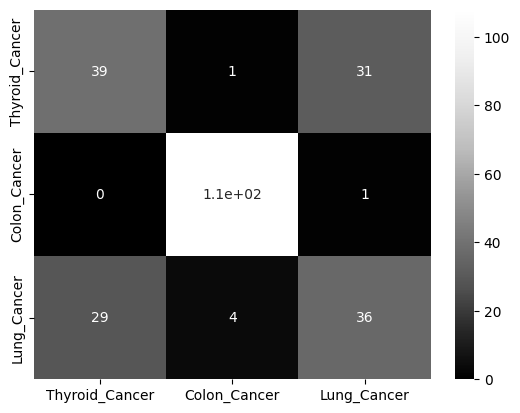

In [170]:
classes = ['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer']
#Classification report
print(classification_report(y_test,logistic_pred))
#confusion_matrix
cn=confusion_matrix(y_test,logistic_pred)
sns.heatmap(cn,annot=True,cmap='Greys_r',xticklabels=classes, yticklabels=classes)

**Hyperparameter tuning for Logistic Regression**

In [171]:
# Define hyperparameters to tune
from sklearn.model_selection import GridSearchCV, cross_val_score
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],              # Type of regularization
    'solver': ['liblinear']               # Solver that supports L1 regularization
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [172]:
# Evaluate on Test Set
best_logistic = grid_search.best_estimator_

In [173]:
logistic_pred = best_logistic.predict(X_test_vectorized)
logistic_pred

array(['Lung_Cancer', 'Lung_Cancer', 'Thyroid_Cancer', 'Lung_Cancer',
       'Thyroid_Cancer', 'Colon_Cancer', 'Colon_Cancer', 'Thyroid_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Thyroid_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Thyroid_Cancer', 'Thyroid_Cancer', 'Lung_Cancer',
       'Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer', 'Thyroid_Cancer',
       'Lung_Cancer', 'Thyroid_Cancer', 'Thyroid_Cancer', 'Lung_Cancer',
       'Colon_Cancer', 'Thyroid_Cancer', 'Lung_Cancer', 'Colon_Cancer',
       'Thyroid_Cancer', 'Thyroid_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Colon_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Thyroid_Cancer', 'Thyroid_Cancer',
       'Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Colon_Cancer', 'Colon_Cancer', 'Colon_Cancer', 'Thyroid_Cancer

In [174]:
#Check the test score and train score to the logisticregression algorithm
print(f'The Test_accuracy: {best_logistic.score(X_test_vectorized,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {best_logistic.score(X_train_smote,y_train_smote)*100:.2f}')
#Check the accuracy_score to the model
print(f'The Accuracy_score: {accuracy_score(y_test,logistic_pred)*100:.2f}')

The Test_accuracy: 82.33
The Train_accuracy: 99.90
The Accuracy_score: 82.33


**Classification_report and Confusion_matrix**

                precision    recall  f1-score   support

  Colon_Cancer       0.78      0.70      0.74        71
   Lung_Cancer       0.93      0.97      0.95       109
Thyroid_Cancer       0.69      0.71      0.70        69

      accuracy                           0.82       249
     macro avg       0.80      0.80      0.80       249
  weighted avg       0.82      0.82      0.82       249



<Axes: >

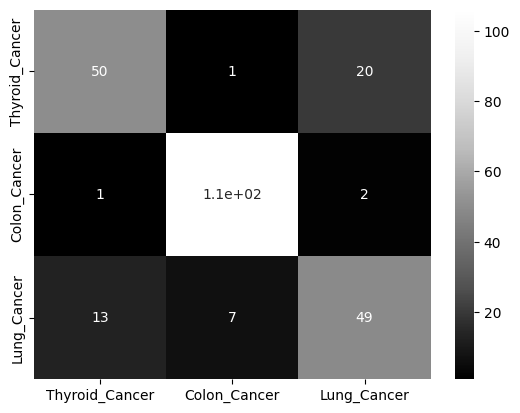

In [175]:
classes = ['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer']
#Classification report
print(classification_report(y_test,logistic_pred))
#confusion_matrix
cn=confusion_matrix(y_test,logistic_pred)
sns.heatmap(cn,annot=True,cmap='Greys_r',xticklabels=classes, yticklabels=classes)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'C': 100, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
The Test_accuracy: 76.31
The Train_accuracy: 99.51
The Accuracy_score: 76.31
                precision    recall  f1-score   support

  Colon_Cancer       0.62      0.56      0.59        71
   Lung_Cancer       0.96      1.00      0.98       109
Thyroid_Cancer       0.58      0.59      0.59        69

      accuracy                           0.76       249
     macro avg       0.72      0.72      0.72       249
  weighted avg       0.76      0.76      0.76       249



<Axes: >

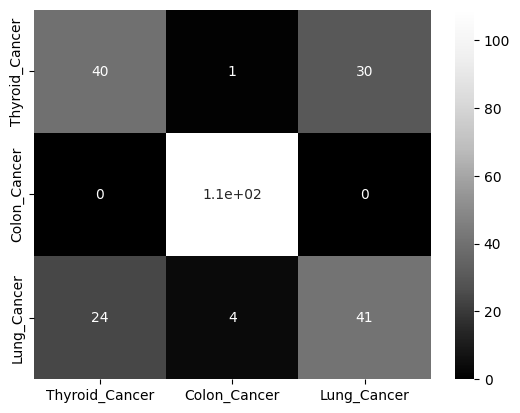

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Updated hyperparameters grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 50, 100],  # Wider range for C
    'penalty': ['elasticnet'],          # Using elastic net regularization
    'solver': ['saga'],                 # Solver that supports elasticnet
    'l1_ratio': [0, 0.5, 1]             # L1 ratio for elastic net
}

# Logistic Regression with Grid Search and Cross-Validation
logistic = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate on Test Set
best_logistic = grid_search.best_estimator_
logistic_pred = best_logistic.predict(X_test_vectorized)

# Evaluation
print(f'The Test_accuracy: {best_logistic.score(X_test_vectorized, y_test) * 100:.2f}')
print(f'The Train_accuracy: {best_logistic.score(X_train_smote, y_train_smote) * 100:.2f}')
print(f'The Accuracy_score: {accuracy_score(y_test, logistic_pred) * 100:.2f}')

# Classification report and Confusion Matrix
print(classification_report(y_test, logistic_pred))
cn = confusion_matrix(y_test, logistic_pred)
sns.heatmap(cn, annot=True, cmap='Greys_r', xticklabels=classes, yticklabels=classes)

**DecisionTree Classifier**

In [176]:
#Import the DecisionTreeClassifier algortihm
from sklearn.tree import DecisionTreeClassifier
#install the DecisionTreeClassifier model
tree=DecisionTreeClassifier()
#Fit the train data to the model
tree.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier()

In [177]:
#Prediction of the DecisionTreeClassifier algorithm
tree_pred=tree.predict(X_test_vectorized)
tree_pred

array(['Lung_Cancer', 'Lung_Cancer', 'Colon_Cancer', 'Lung_Cancer',
       'Thyroid_Cancer', 'Thyroid_Cancer', 'Colon_Cancer',
       'Thyroid_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Thyroid_Cancer',
       'Lung_Cancer', 'Thyroid_Cancer', 'Thyroid_Cancer',
       'Thyroid_Cancer', 'Lung_Cancer', 'Colon_Cancer', 'Colon_Cancer',
       'Lung_Cancer', 'Colon_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Thyroid_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Colon_Cancer',
       'Lung_Cancer', 'Colon_Cancer', 'Lung_Cancer', 'Colon_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Thyroid_Cancer', 'Colon_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Colon_Cancer', 'Lung_Cancer',
       'Colon_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Colon_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Thyroid_Cancer', 'Thyroid_Cancer', 'Colon_Cancer', 'Colon_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Colon_Cancer', 'Thyroid_Cancer',
       'Colon_Cancer', 'Thyroid_Cancer', 

In [178]:
#Check the test score and train score to the DecisionTreeClassifier algorithm
print(f'The Test_accuracy: {tree.score(X_test_vectorized,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {tree.score(X_train_smote,y_train_smote)*100:.2f}')
#Check the accuracy_score to the model
print(f'The Accuracy_score: {accuracy_score(y_test,tree_pred)*100:.2f}')

The Test_accuracy: 80.32
The Train_accuracy: 100.00
The Accuracy_score: 80.32


**Classification_report and Confusion_matrix (DT)**

                precision    recall  f1-score   support

  Colon_Cancer       0.70      0.73      0.72        71
   Lung_Cancer       0.93      0.92      0.93       109
Thyroid_Cancer       0.71      0.70      0.70        69

      accuracy                           0.80       249
     macro avg       0.78      0.78      0.78       249
  weighted avg       0.81      0.80      0.80       249



<Axes: >

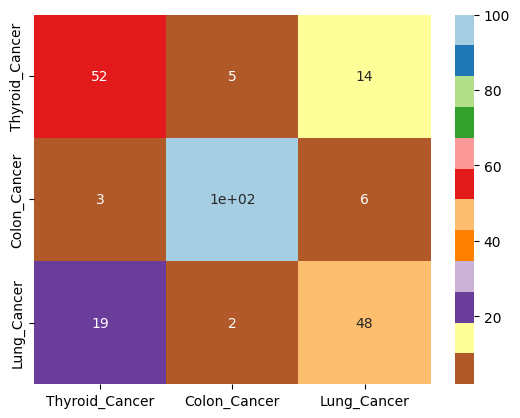

In [179]:
classes = ['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer']
#Classification report
print(classification_report(y_test,tree_pred))
#confusion_matrix
cn=confusion_matrix(y_test,tree_pred)
sns.heatmap(cn,annot=True,cmap='Paired_r',xticklabels=classes, yticklabels=classes)

**Handling Overfitting by pruning the DT**

In [180]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Install the DecisionTreeClassifier model with pruning
tree = DecisionTreeClassifier(max_depth=3, min_samples_split=4, min_samples_leaf=2)

# Fit the train data to the model
tree.fit(X_train_smote, y_train_smote)

# Prediction of the DecisionTreeClassifier algorithm
tree_pred = tree.predict(X_test_vectorized)

# Check the test score and train score for the DecisionTreeClassifier algorithm
print(f'The Test_accuracy: {tree.score(X_test_vectorized, y_test) * 100:.2f}')
print(f'The Train_accuracy: {tree.score(X_train_smote, y_train_smote) * 100:.2f}')
print(f'The Accuracy_score: {accuracy_score(y_test, tree_pred) * 100:.2f}')

The Test_accuracy: 76.31
The Train_accuracy: 85.03
The Accuracy_score: 76.31


                precision    recall  f1-score   support

  Colon_Cancer       0.61      0.80      0.70        71
   Lung_Cancer       0.86      0.88      0.87       109
Thyroid_Cancer       0.82      0.54      0.65        69

      accuracy                           0.76       249
     macro avg       0.77      0.74      0.74       249
  weighted avg       0.78      0.76      0.76       249



<Axes: >

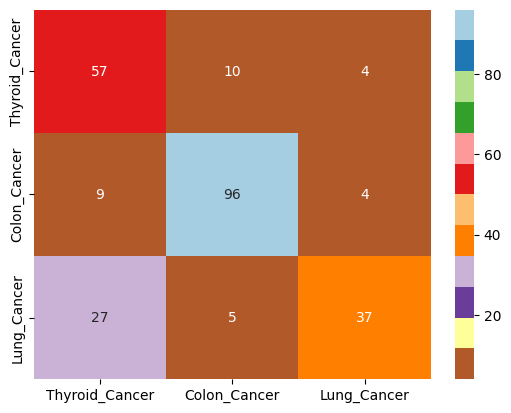

In [181]:
classes = ['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer']
#Classification report
print(classification_report(y_test,tree_pred))
#confusion_matrix
cn=confusion_matrix(y_test,tree_pred)
sns.heatmap(cn,annot=True,cmap='Paired_r',xticklabels=classes, yticklabels=classes)

The Best Parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
The Test_accuracy: 83.13
The Train_accuracy: 98.45
                precision    recall  f1-score   support

  Colon_Cancer       0.74      0.80      0.77        71
   Lung_Cancer       0.93      0.92      0.92       109
Thyroid_Cancer       0.78      0.72      0.75        69

      accuracy                           0.83       249
     macro avg       0.82      0.81      0.81       249
  weighted avg       0.83      0.83      0.83       249



<Axes: >

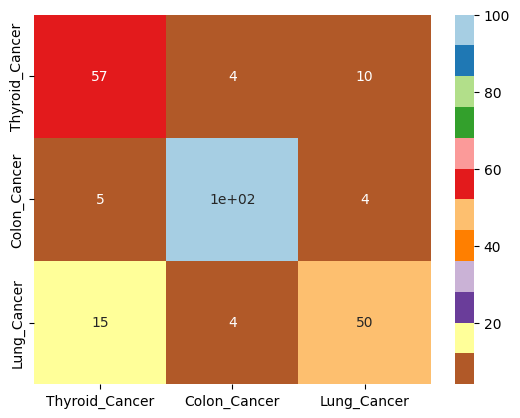

In [204]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define hyperparameters grid
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],  # Increasing depth
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Initialize DecisionTreeClassifier
tree = DecisionTreeClassifier()

# GridSearchCV for parameter tuning
grid_search = GridSearchCV(tree, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train_smote, y_train_smote)

# Best estimator
best_tree = grid_search.best_estimator_

# Prediction
tree_pred = best_tree.predict(X_test_vectorized)

# Evaluation
print(f"The Best Parameters: {grid_search.best_params_}")
print(f"The Test_accuracy: {best_tree.score(X_test_vectorized, y_test) * 100:.2f}")
print(f"The Train_accuracy: {best_tree.score(X_train_smote, y_train_smote) * 100:.2f}")

# Classification report and Confusion Matrix
print(classification_report(y_test, tree_pred))
cn = confusion_matrix(y_test, tree_pred)
sns.heatmap(cn, annot=True, cmap='Paired_r', xticklabels=classes, yticklabels=classes)

**RandomForest Classifier**

In [182]:
#Import the RandomForestClassifier algortihm
from sklearn.ensemble import RandomForestClassifier
#install the DecisionTreeClassifier model
random=RandomForestClassifier()
#Fit the train data to the model
random.fit(X_train_smote,y_train_smote)

RandomForestClassifier()

In [183]:
#Prediction of the RandomForestClassifier algorithm
random_pred=random.predict(X_test_vectorized)
random_pred

array(['Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Thyroid_Cancer', 'Colon_Cancer', 'Colon_Cancer', 'Thyroid_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Colon_Cancer', 'Thyroid_Cancer',
       'Colon_Cancer', 'Thyroid_Cancer', 'Thyroid_Cancer', 'Lung_Cancer',
       'Colon_Cancer', 'Thyroid_Cancer', 'Lung_Cancer', 'Thyroid_Cancer',
       'Lung_Cancer', 'Thyroid_Cancer', 'Thyroid_Cancer', 'Lung_Cancer',
       'Colon_Cancer', 'Colon_Cancer', 'Lung_Cancer', 'Thyroid_Cancer',
       'Colon_Cancer', 'Colon_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Colon_Cancer', 'Thyroid_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Thyroid_Cancer', 'Lung_Cancer', 'Colon_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Thyroid_Cancer', 'Colon_Cancer',
       'Colon_Cancer', 'Colon_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Colon_Cancer', 'Colon_Cancer', 'Colon_Cancer', 'Thyroid_Cancer',
   

In [184]:
#Check the test score and train score to the RandomForestClassifier algorithm
print(f'The Test_accuracy: {random.score(X_test_vectorized,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {random.score(X_train_smote,y_train_smote)*100:.2f}')
#Check the accuracy_score to the model
print(f'The Accuracy_score: {accuracy_score(y_test,random_pred)*100:.2f}')

The Test_accuracy: 76.31
The Train_accuracy: 100.00
The Accuracy_score: 76.31


**Classification_report and Confusion_matrix(RF)**

                precision    recall  f1-score   support

  Colon_Cancer       0.61      0.63      0.62        71
   Lung_Cancer       0.96      1.00      0.98       109
Thyroid_Cancer       0.59      0.52      0.55        69

      accuracy                           0.76       249
     macro avg       0.72      0.72      0.72       249
  weighted avg       0.76      0.76      0.76       249



<Axes: >

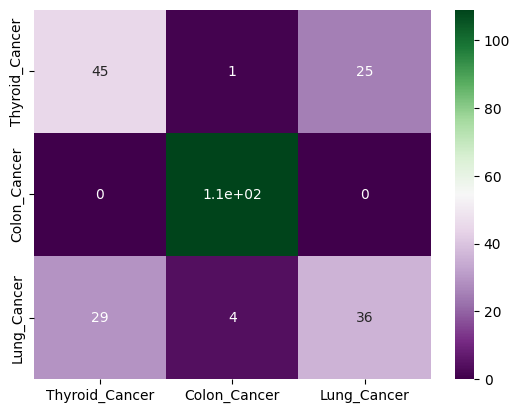

In [185]:
classes = ['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer']
#Classification report
print(classification_report(y_test,random_pred))
#confusion_matrix
cn=confusion_matrix(y_test,random_pred)
sns.heatmap(cn,annot=True,cmap='PRGn',xticklabels=classes, yticklabels=classes)

**Hyperparameter Tuning for Random Forest**

In [186]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Reduced parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize RandomForestClassifier
random = RandomForestClassifier()

# RandomizedSearchCV for parameter tuning
random_search = RandomizedSearchCV(estimator=random, param_distributions=param_grid, n_iter=10, cv=3, n_jobs=-1, verbose=2)
random_search.fit(X_train_smote, y_train_smote)

# Best estimator
best_random = random_search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [187]:
# Best parameters
print(f"Best Parameters: {random_search.best_params_}")

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}


In [188]:
#Prediction of the RandomForestClassifier algorithm
random_pred=best_random.predict(X_test_vectorized)
random_pred

array(['Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Thyroid_Cancer', 'Colon_Cancer', 'Thyroid_Cancer',
       'Thyroid_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Colon_Cancer',
       'Lung_Cancer', 'Thyroid_Cancer', 'Thyroid_Cancer',
       'Thyroid_Cancer', 'Lung_Cancer', 'Colon_Cancer', 'Colon_Cancer',
       'Lung_Cancer', 'Thyroid_Cancer', 'Lung_Cancer', 'Thyroid_Cancer',
       'Thyroid_Cancer', 'Lung_Cancer', 'Colon_Cancer', 'Colon_Cancer',
       'Lung_Cancer', 'Colon_Cancer', 'Colon_Cancer', 'Colon_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Colon_Cancer', 'Thyroid_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Thyroid_Cancer', 'Lung_Cancer',
       'Colon_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Thyroid_Cancer', 'Colon_Cancer', 'Colon_Cancer', 'Thyroid_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Colon_Cancer', 'Colon_Cancer',
       'Colon_Cancer', 'Thyroid_Cancer

In [189]:
#Check the test score and train score to the RandomForestClassifier algorithm
print(f'The Test_accuracy: {best_random.score(X_test_vectorized,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {best_random.score(X_train_smote,y_train_smote)*100:.2f}')
#Check the accuracy_score to the model
print(f'The Accuracy_score: {accuracy_score(y_test,random_pred)*100:.2f}')

The Test_accuracy: 74.70
The Train_accuracy: 99.61
The Accuracy_score: 74.70


**Classification_report and Confusion_matrix(RF)**

                precision    recall  f1-score   support

  Colon_Cancer       0.59      0.55      0.57        71
   Lung_Cancer       0.95      1.00      0.97       109
Thyroid_Cancer       0.56      0.55      0.55        69

      accuracy                           0.75       249
     macro avg       0.70      0.70      0.70       249
  weighted avg       0.74      0.75      0.74       249



<Axes: >

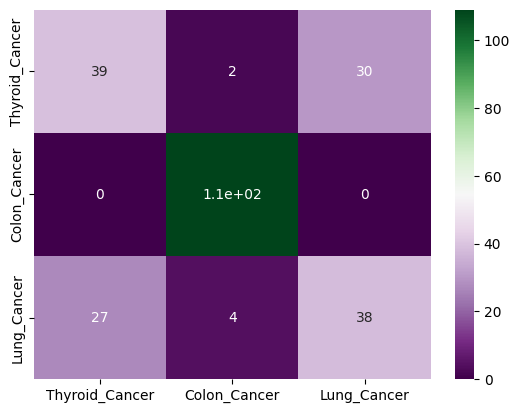

In [190]:
classes = ['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer']
#Classification report
print(classification_report(y_test,random_pred))
#confusion_matrix
cn=confusion_matrix(y_test,random_pred)
sns.heatmap(cn,annot=True,cmap='PRGn',xticklabels=classes, yticklabels=classes)

***Hyper parameter tuning for RF (2)***

In [191]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Extended parameter grid with adjusted hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300, 400],  # Increased number of estimators
    'max_depth': [None, 5, 10, 15],        # Adjusted maximum depth
    'min_samples_split': [2, 5, 10],       # Increased minimum samples split
    'min_samples_leaf': [1, 2, 4]          # Increased minimum samples leaf
}

# Initialize RandomForestClassifier
random = RandomForestClassifier()

# RandomizedSearchCV with adjusted parameters and increased cross-validation folds
random_search = RandomizedSearchCV(estimator=random, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, verbose=2)
random_search.fit(X_train_smote, y_train_smote)

# Best estimator
best_random = random_search.best_estimator_

# Print the best parameters
print(f"Best Parameters: {random_search.best_params_}")

# Prediction of the RandomForestClassifier algorithm
random_pred = best_random.predict(X_test_vectorized)

# Check the test score and train score for the RandomForestClassifier algorithm
print(f'The Test_accuracy for Random Forest Classifier: {best_random.score(X_test_vectorized, y_test) * 100:.2f}')
print(f'The Train_accuracy for Random Forest Classifier: {best_random.score(X_train_smote, y_train_smote) * 100:.2f}')

# Accuracy score of the model
print(f'The Accuracy_score for Random Forest Classifier: {accuracy_score(y_test, random_pred) * 100:.2f}')


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None}
The Test_accuracy for Random Forest Classifier: 75.90
The Train_accuracy for Random Forest Classifier: 98.45
The Accuracy_score for Random Forest Classifier: 75.90


                precision    recall  f1-score   support

  Colon_Cancer       0.61      0.61      0.61        71
   Lung_Cancer       0.94      1.00      0.97       109
Thyroid_Cancer       0.59      0.54      0.56        69

      accuracy                           0.76       249
     macro avg       0.71      0.71      0.71       249
  weighted avg       0.75      0.76      0.75       249



<Axes: >

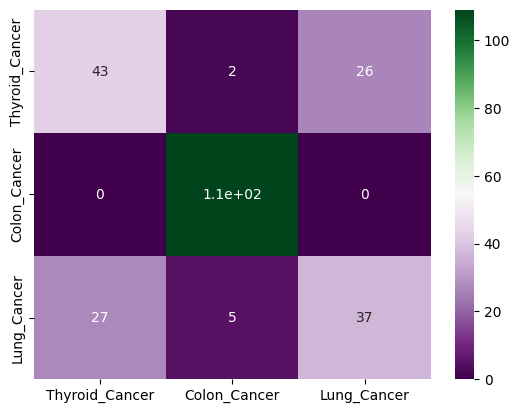

In [192]:
classes = ['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer']
#Classification report
print(classification_report(y_test,random_pred))
#confusion_matrix
cn=confusion_matrix(y_test,random_pred)
sns.heatmap(cn,annot=True,cmap='PRGn',xticklabels=classes, yticklabels=classes)

**MultinomialNB**

In [193]:
#Import the MultinomialNB algorithm to train the our model
from sklearn.naive_bayes import MultinomialNB
#install the model
multinomial=MultinomialNB()
#fit the train data to our model
multinomial.fit(X_train_smote,y_train_smote)

MultinomialNB()

In [194]:
#Prediction to the test data MultinomialNB
multinomial_pred=multinomial.predict(X_test_vectorized)
multinomial_pred

array(['Lung_Cancer', 'Lung_Cancer', 'Thyroid_Cancer', 'Lung_Cancer',
       'Thyroid_Cancer', 'Colon_Cancer', 'Colon_Cancer', 'Thyroid_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Colon_Cancer', 'Thyroid_Cancer',
       'Lung_Cancer', 'Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer',
       'Colon_Cancer', 'Thyroid_Cancer', 'Lung_Cancer', 'Thyroid_Cancer',
       'Lung_Cancer', 'Thyroid_Cancer', 'Thyroid_Cancer', 'Lung_Cancer',
       'Colon_Cancer', 'Colon_Cancer', 'Lung_Cancer', 'Thyroid_Cancer',
       'Colon_Cancer', 'Colon_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Thyroid_Cancer', 'Thyroid_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Colon_Cancer', 'Lung_Cancer', 'Colon_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Lung_Cancer', 'Lung_Cancer', 'Thyroid_Cancer', 'Colon_Cancer',
       'Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer', 'Lung_Cancer',
       'Colon_Cancer', 'Colon_Cancer', 'Lung_Cancer', 'Thyroid_Cancer',
  

In [195]:
 #Check the test score and train score to the MultinomialNB algorithm
print(f'The Test_accuracy: {multinomial.score(X_test_vectorized,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {multinomial.score(X_train_smote,y_train_smote)*100:.2f}')
#Check the accuracy_score to the model
print(f'The Accuracy_score: {accuracy_score(y_test,multinomial_pred)*100:.2f}')

The Test_accuracy: 74.30
The Train_accuracy: 96.99
The Accuracy_score: 74.30


**Classification_report and Confusion_matix (MNB)**

                precision    recall  f1-score   support

  Colon_Cancer       0.58      0.61      0.59        71
   Lung_Cancer       0.94      1.00      0.97       109
Thyroid_Cancer       0.56      0.48      0.52        69

      accuracy                           0.74       249
     macro avg       0.69      0.69      0.69       249
  weighted avg       0.73      0.74      0.74       249



<Axes: >

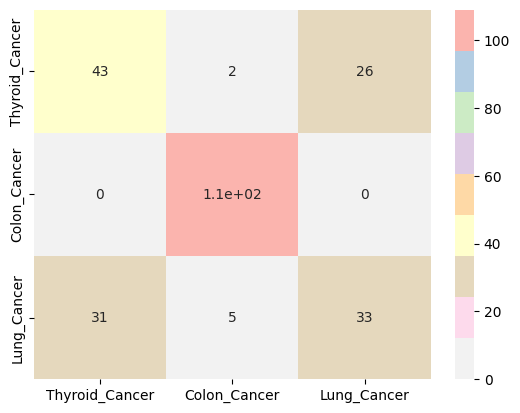

In [196]:
classes = ['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer']
#Classification report
print(classification_report(y_test,multinomial_pred))
#confusion_matrix
cn=confusion_matrix(y_test,multinomial_pred)
sns.heatmap(cn,annot=True,cmap='Pastel1_r',xticklabels=classes, yticklabels=classes)

**Hyper Parameter Tuning for Overfitting MNB**

The Best Alpha: 0.1
The Test_accuracy for Multinomial NB: 75.50
The Train_accuracy for Multinomial NB: 94.27
The Accuracy_score for Multinomial NB: 75.50
                precision    recall  f1-score   support

  Colon_Cancer       0.63      0.65      0.64        71
   Lung_Cancer       0.92      0.98      0.95       109
Thyroid_Cancer       0.58      0.51      0.54        69

      accuracy                           0.76       249
     macro avg       0.71      0.71      0.71       249
  weighted avg       0.75      0.76      0.75       249



<Axes: >

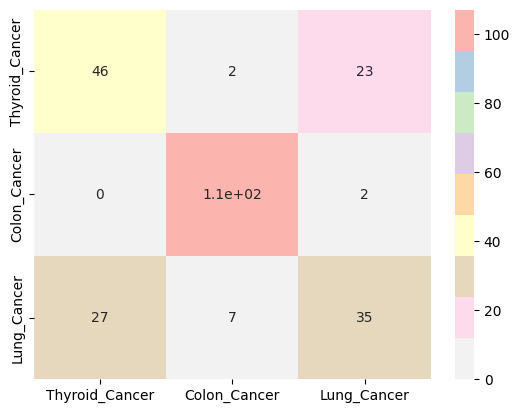

In [197]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2

# Adjusted feature selection - experimenting with a different number of features
# You may need to experiment with this number to find the optimal value
selector = SelectKBest(chi2, k=800)  # Adjusted 'k' to select more features
X_train_selected = selector.fit_transform(X_train_smote, y_train_smote)
X_test_selected = selector.transform(X_test_vectorized)

# Initialize and fit the MultinomialNB model with a wider range of alpha values
alpha_values = [0.01, 0.05, 0.1, 0.5, 1, 5, 10]  # Extended range of alpha values
best_score = 0
best_alpha = 1

for alpha in alpha_values:
    multinomial = MultinomialNB(alpha=alpha)
    multinomial.fit(X_train_selected, y_train_smote)
    score = multinomial.score(X_test_selected, y_test)
    if score > best_score:
        best_score = score
        best_alpha = alpha

# Train the model with the best alpha
multinomial = MultinomialNB(alpha=best_alpha)
multinomial.fit(X_train_selected, y_train_smote)

# Prediction
multinomial_pred = multinomial.predict(X_test_selected)

# Evaluation
print(f"The Best Alpha: {best_alpha}")
print(f"The Test_accuracy for Multinomial NB: {multinomial.score(X_test_selected, y_test) * 100:.2f}")
print(f"The Train_accuracy for Multinomial NB: {multinomial.score(X_train_selected, y_train_smote) * 100:.2f}")
print(f"The Accuracy_score for Multinomial NB: {accuracy_score(y_test, multinomial_pred) * 100:.2f}")

# Classification report and Confusion Matrix
print(classification_report(y_test, multinomial_pred))
cn = confusion_matrix(y_test, multinomial_pred)
sns.heatmap(cn, annot=True, cmap='Pastel1_r', xticklabels=classes, yticklabels=classes)


**XGB Classifier**

In [198]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit and transform the target variable to encode the string labels to integers
y_train_encoded = label_encoder.fit_transform(y_train_smote)
y_test_encoded = label_encoder.transform(y_test)

# Create the XGBClassifier instance
xgb = XGBClassifier()

# Fit the model with the transformed target variable
xgb.fit(X_train_smote, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [199]:
#Prediction to the test data XGBClassifier
xgb_pred = xgb.predict(X_test_vectorized)
xgb_pred

array([1, 1, 1, 1, 2, 0, 0, 2, 1, 1, 2, 1, 2, 2, 2, 1, 0, 0, 1, 0, 1, 2,
       2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 2, 1, 0, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 2, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2, 2, 0, 2, 1, 2, 2,
       2, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1,
       2, 0, 0, 1, 2, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 1, 2, 1, 0,
       2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 2, 1, 1, 2, 1, 1, 2, 2, 1, 0, 1,
       0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 0, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1,
       1, 2, 2, 2, 1, 0, 2])

In [200]:
#Check the test score and train score to the XGBClassifier algorithm
print(f'The Test_accuracy: {xgb.score(X_test_vectorized,y_test_encoded)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {xgb.score(X_train_smote,y_train_encoded)*100:.2f}')
#Check the accuracy_score to the model
print(f'The Accuracy_score: {accuracy_score(y_test_encoded,xgb_pred)*100:.2f}')

The Test_accuracy: 87.55
The Train_accuracy: 100.00
The Accuracy_score: 87.55


**Classification_report and Confusion_matrix (XGB)**

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        71
           1       0.95      0.99      0.97       109
           2       0.83      0.71      0.77        69

    accuracy                           0.88       249
   macro avg       0.86      0.85      0.85       249
weighted avg       0.87      0.88      0.87       249



<Axes: >

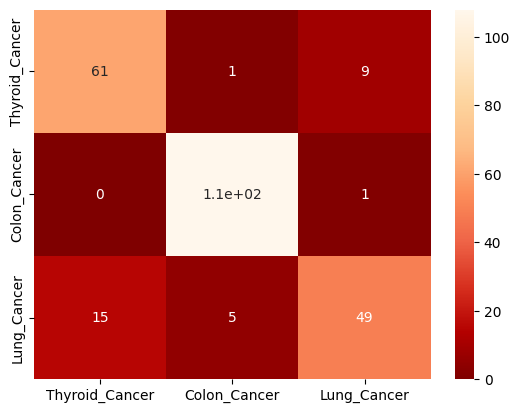

In [201]:
classes = ['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer']
#Classification report
print(classification_report(y_test_encoded,xgb_pred))
#confusion_matrix
cn=confusion_matrix(y_test_encoded,xgb_pred)
sns.heatmap(cn,annot=True,cmap='OrRd_r',xticklabels=classes, yticklabels=classes)

**Hyper parameter Tuning for XGB**

CV Accuracy: 94.47% ± 4.24%
The Test_accuracy: 87.95
The Train_accuracy: 94.47
              precision    recall  f1-score   support

           0       0.81      0.86      0.84        71
           1       0.95      0.99      0.97       109
           2       0.83      0.72      0.78        69

    accuracy                           0.88       249
   macro avg       0.86      0.86      0.86       249
weighted avg       0.88      0.88      0.88       249



<Axes: >

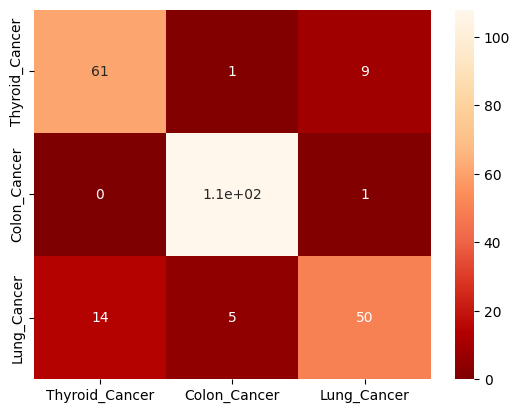

In [202]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import numpy as np

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train_smote)
y_test_encoded = label_encoder.transform(y_test)

# Hyperparameter tuning
params = {
    'n_estimators': 100,  # Adjust as needed
    'max_depth': 5,       # Typically 3-10. Adjust based on dataset size and features
    'learning_rate': 0.1, # Lower values prevent overfitting
    'subsample': 0.8,     # Consider setting to 0.5-1
    'colsample_bytree': 0.8 # Fraction of features to use. Adjust as needed
}

# Create the XGBClassifier instance with tuned parameters
xgb = XGBClassifier(**params)

# Fit the model
xgb.fit(X_train_smote, y_train_encoded)

# Cross-validation to check for overfitting
cv_scores = cross_val_score(xgb, X_train_smote, y_train_encoded, cv=5)
print(f"CV Accuracy: {np.mean(cv_scores)*100:.2f}% ± {np.std(cv_scores)*100:.2f}%")

# Prediction
xgb_pred = xgb.predict(X_test_vectorized)

# Evaluation
print(f'The Test_accuracy: {xgb.score(X_test_vectorized, y_test_encoded) * 100:.2f}')
print(f'The Train_accuracy: {np.mean(cv_scores) * 100:.2f}')

# Classification report and Confusion Matrix
print(classification_report(y_test_encoded, xgb_pred))
cn = confusion_matrix(y_test_encoded, xgb_pred)
sns.heatmap(cn, annot=True, cmap='OrRd_r', xticklabels=classes, yticklabels=classes)


**Comparing all Models**

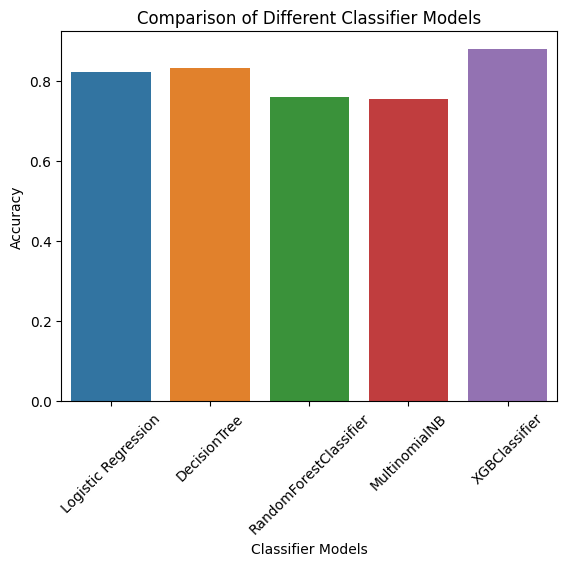

In [205]:
#comparing the accuracy of different models
models = ['Logistic Regression','DecisionTree', 'RandomForestClassifier', 'MultinomialNB', 'XGBClassifier']
preds = [logistic_pred,tree_pred,random_pred,multinomial_pred,xgb_pred]
# Calculating accuracies
accuracys = []
for i, pred in enumerate(preds):
    if models[i] == 'XGBClassifier':
        # Use y_test_encoded for XGBClassifier
        acc = accuracy_score(y_test_encoded, pred)
    else:
        # Use y_test for other models
        acc = accuracy_score(y_test, pred)
    accuracys.append(acc)

# Plotting
sns.barplot(x=models, y=accuracys)
plt.xlabel('Classifier Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Different Classifier Models')
plt.xticks(rotation=45)  # Rotating model names for better readability
plt.show()

**Deep Learning models**

In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Input, Flatten, LSTM, Bidirectional, Embedding, Dropout, GlobalMaxPooling1D, TimeDistributed, GRU, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Sequential, load_model, Model
from keras.optimizers import Adam
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer

In [ ]:
# Create dummy values for the dataset and split the data
y = pd.get_dummies(data['Label'])
X = data['Text']
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42)
X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, test_size=0.3, random_state=42)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, Bidirectional, LSTM, Dropout, Dense
from keras.callbacks import EarlyStopping

# Tokenization and Padding
max_words = 5000
max_len = 300  # Adjust as necessary
tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
tokenizer.fit_on_texts(data['Text'])

def tokenize_and_pad(text):
    sequences = tokenizer.texts_to_sequences(text)
    padded = pad_sequences(sequences, maxlen=max_len, padding='post')
    return padded

# Apply to your dataset
X_trn_padded = tokenize_and_pad(X_trn)
X_vld_padded = tokenize_and_pad(X_vld)

# Model Building
vocab_size = 5000
embedding_size = 32
num_classes = y_trn.shape[1]

model = Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax' if num_classes > 2 else 'sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy', metrics=['accuracy'])

# Early Stopping
es = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

# Fit the model
history = model.fit(X_trn_padded, y_trn, validation_data=(X_vld_padded, y_vld), epochs=50, callbacks=[es])


Epoch 1/50
18/18 [==============================] - 12s 460ms/step - loss: 1.0890 - accuracy: 0.4327 - val_loss: 1.0688 - val_accuracy: 0.4728
Epoch 2/50
18/18 [==============================] - 5s 263ms/step - loss: 1.0507 - accuracy: 0.4488 - val_loss: 1.0261 - val_accuracy: 0.4728
Epoch 3/50
18/18 [==============================] - 5s 258ms/step - loss: 0.9463 - accuracy: 0.4596 - val_loss: 0.8004 - val_accuracy: 0.5607
Epoch 4/50
18/18 [==============================] - 7s 420ms/step - loss: 0.7346 - accuracy: 0.7002 - val_loss: 0.6998 - val_accuracy: 0.6360
Epoch 5/50
18/18 [==============================] - 5s 261ms/step - loss: 0.6078 - accuracy: 0.7828 - val_loss: 0.7694 - val_accuracy: 0.6695
Epoch 6/50
18/18 [==============================] - 5s 256ms/step - loss: 0.5094 - accuracy: 0.8061 - val_loss: 0.5781 - val_accuracy: 0.6946
Epoch 7/50
18/18 [==============================] - 7s 416ms/step - loss: 0.3536 - accuracy: 0.8707 - val_loss: 0.6100 - val_accuracy: 0.6695
Epoch

In [ ]:
# Assuming the tokenizer and max_len are already defined and set up as shown in the previous snippet

def tokenize_and_pad(text):
    sequences = tokenizer.texts_to_sequences(text)
    padded = pad_sequences(sequences, maxlen=max_len, padding='post')
    return padded

# Preprocess the test data
X_tst_padded = tokenize_and_pad(X_tst)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_tst_padded, y_tst, verbose=0)

# Print metrics
print('Accuracy : {:.4f}'.format(accuracy))

Accuracy : 0.6800


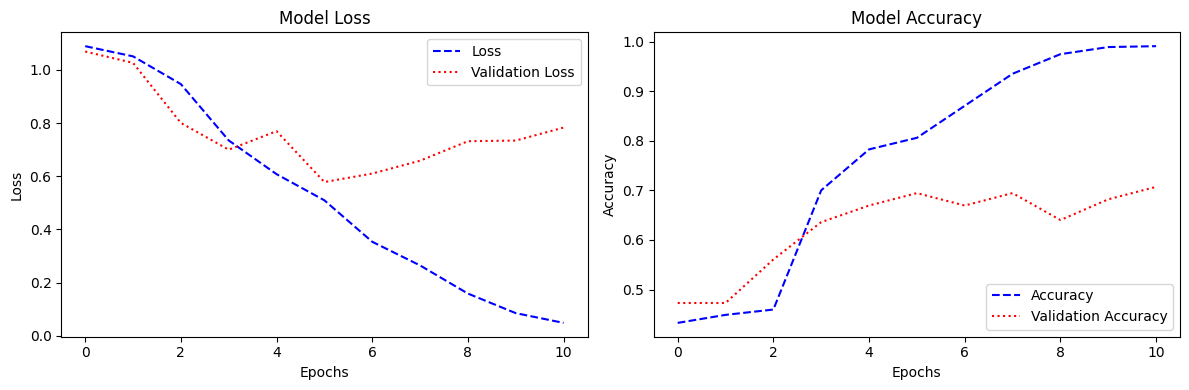

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the variable holding the output of the model.fit() method
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label='Loss')
plt.plot(history.history['val_loss'], 'r:', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b--', label='Accuracy')
plt.plot(history.history['val_accuracy'], 'r:', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


In [ ]:
text='thyroid carcinoma present malign rapidli increas incid worldand wide recogn endocrin carcinoma western world thyroid cancer derivedfrom follicular thyroid cell sort papillari thyroid carcinoma ptc follicular thyroid carcinoma ftc anaplast thyroid carcinoma atc accord histolog subtyp clinicalresult vari across subtypesth annual rate thyroid cancer doubl within past two decad vast major increas ascrib ptc account thyroid carcinoma inaddit patient ptc suffer cervic lymph node metastasi remot metastasi leadsto unfavor result approxim case may progress potenti fatal recurrentail due reason uncov caus ptc fundament mechan andfind molecular biomark earli diagnosi custom treatment signific import author open access publish portland press limit behalf biochem societi distribut creativ common attributionlicens cc cbioscienc report bsrbsrtaskswith advanc continu improv gene sequenc geneedit technolog nowconveni recogn hub biomark relat neoplasm metastasi surviv statu use larg amountof inform avail appli bioinformat current effect sensit biomark earlydiagnosi treatment prevent lymph node metastasi ptc examin differenti expressedgen deg tumor paracarcinoma tissu may help identifi critic biomark papillari thyroidcarcinoma form molecular marker mrna contain abund genet inform necessaryfor protein translat separ patholog process cancer variou stage studiesutil public databas cancer genom atla tcga gene express omnibu geo toidentifi signific biomark papillari thyroid carcinoma howev investig found onsingl dataset constrain sampl size base onlin databas use screen degsin present studi analyz deg ptc tissu versu match adjac tissu rnaseq andbioinformat method obtain deg screen key modul extract key gene inthos modul construct deg interact network possibl role differenti express geneswa analyz use go annot kegg pathway enrich analysi express valid survivalanalysi function enrich analysi key gene conduct use relev databas final wefound three gene adora apo lpar highli express ptc associ withptc methyl tnm stage immun infiltrationmethodstissu samplesthirti pair ptc adjac tissu collect januari juli first affili hospitalof hebei north univers experi approv ethic committe first affili hospitaland patient provid inform consent tissu frozen liquid nitrogen surgic resectionrna librari construct sequencingtot rna isol four adjac normal cancer thyroid sampl util trizol reagent qiagenvalencia ca usa indic manufactur guidelin rna ptc tissu paracancer tissuessampl number c p c p c p c p number repres differ sampl c indic cancersampl p repres match paracancer tissu sampl use six librari built utilizingan illumina standard kit indic manufactur protocol sequenc carri illuminahiseq lc bio chinadifferenti express gene screeningth level express mrna evalu use stringti calcul fpkm deg ptcand paracancer tissu screen log fold chang p regard statist signific analys conduct use r packag ballgown function enrich analysi pathway analysisto reveal function role deg annot visual integr discoveri function annot tool david httpdavidabccncifcrfgovhomejsp use perform gene ontolog go enrichmentanalysi kyoto encyclopedia gene genom kegg pathway enrich analysi p valu less consid cutoff criteriappi network construct ident hub genesppi network construct success use string databas tringdb interact ofdeg combin score set signific cytoscap softwar version util tovisu analyz result string databas find key hub gene ppi network significantmodul analyz use plugin mcode cytoscap softwar criteria select set thedefault key gene chosen degre subsequ gene modul use analys theirfunct role funrich softwar author open access publish portland press limit behalf biochem societi distribut creativ common attributionlicens cc cbioscienc report bsrbsrtabl pcr primersgen symboladoraactinapoelparbp base pair f forward primer r revers primerprim sequencefcidccacagacctacttccacacccidrcidtaccggagagggatcttgacccidfcidcactcttccagccttccttcccidrcidaggtctttgcggatgtccaccidfcid gttgctggtcacattcctgg cidrcid gcaggtaatcccaaaagcgaccidfcid cacttggtggtctacagcttgcidrcid gcgtagtaggagagacgaacgciddata valid analysisto verifi accuraci rnaseq result use gene express profil interact analysi databaseto verifi express key gene ptc adjac tissu overal surviv diseasefre survivalanalys perform kaplanmei plot ptcrelat hub gene genet alter hub genesin ptc correl gene analyz util cbioport cancer genom hub genesrel clinicopatholog featur analyz use onlin databas ualcan httpualcanpathuabedu correl adora apo lpar express immun infiltr level ptc theexpress three gene differ kind cancer perform use tumor immun estimationresourc databas qrtpcr analysi total rna isol normal cancer papillari thyroid sampl utilizingtrizol reagent qiagen valencia ca usa cdna synthes rna revers transcript kit tiangenbiotech beij china qrtpcr perform abi realtim pcr system appli biosystem life technolog usa express gene interest normal actin primer foradora apo lpar actin shown tabl western blot ripa buffer use extract protein four pair tissu ptc patient theprotein concentr measur via bca method briefli sdspage gel use electrophoresi andpdvf membran use transmembran transfer pdvf membran block incub primari antiadora antibodi dilut bioss bsr apo dilut bioss bsr lparantibodi dilut bioss bsr actin dilut bioss bsr c overnight follow incub secondari antibodi zhongshanjinqiao dilut c h signal wasdetect use ecl methodstatist analysisal data analyz r spss spss inc usa kaplanmei method use estim thesignific differ surviv overexpress group lowexpress group key gene inpapillari thyroid carcinoma statist differ set p resultsdifferenti express gene screen base rnaseqto screen gene modul may play role promot cancer papillari thyroid carcinoma weperform rnaseq experi four pair thyroid cancer tissu match paracancer tissu toobtain differenti express gene rnaseq acquir million read sampl fold changesbetween ptc cancer tissu match paracancer sampl calcul set cutoff criterion pvalu fold chang upregul downregul gene degswer consid candid gene subsequ studi figur show express top gene inptc versu match paracancer tissuesfunct enrich analysi pathway analysisconsid mani falseposit gene among deg verifi result one onethrough tcga databas found gene data consist gene express author open access publish portland press limit behalf biochem societi distribut creativ common attributionlicens cc cbioscienc report bsrbsrfigur ident deg rnaseqth heat map ppi network deg b c volcano plot deg signific modul selectedbi mcode cytoscap red repres upregul gene blue repres downregul genesfigur go kegg pathway enrich analysi deg rnaseqa bubbl plot gene ontolog enrich analysi deg b bubbl plot kyoto encyclopaedia gene genomespathway enrich analysi degstcga databas investig potenti function deg ptc gene function enrich conduct use go kegg pathway analys biolog process categori deg significantli involv regul axonogenesi regul cell morphogenesi extracellular structur aniz extracellular matrix aniz synaps aniz cellsubstr adhes urogenit system develop thecellular compon categori result show ptcrelat deg enrich collagencontain extracellularmatrix synapt membran cellcel junction glutamaterg synaps neurontoneuron synaps postsynapt membran basolater plasma membran deg molecular function mainli involv cell adhes moleculebind passiv transmembran transport activ extracellular matrix structur constitu glycosaminoglycanbind growth factor bind transmembran receptor protein kinas activ transmembran receptor proteintyrosin kinas activ figur aa figur b show kegg pathway result show deg enrich cytokinecytokin receptorinteract mapk signal pathway proteoglycan cancer rap signal pathway axon guidanc cush author open access publish portland press limit behalf biochem societi distribut creativ common attributionlicens cc cbioscienc report bsrbsrfigur go enrich analysi kegg analysi key genesa top element involv biolog process b top element involv molecular function c top elementsinvolv cellular compon top pathway relat key gene kegg analysissyndrom parathyroid hormon synthesi secret action agerag signal pathway diabet complic growth hormon synthesi secret action salivari secret circadian entrain cholinerg synaps p signal pathway ecmreceptor interact arrhythmogen right ventricular cardiomyopathyarvc endocrin resist renin secret type ii diabet mellitu bladder cancer nicotin nicotinamidemetabol apoptosismultipl speciesppi network construct modul analysisppi network construct success databas load ptc relat dge stringdatabas figur bc use cytoscap analyz signific modul ppi network figur dthe ppi network consist node edg follow use mcode cytoscap significantmodul select top hub gene adci adora adrac apo car ccl ccl cdhchgb cxcl evaa fama fn gnai gpc grm lpar meltf mfi mfge nmu oprmserpina sstr timp tnc evalu degre ppi network figur resultsshow function key gene mainli concentr signal transduct cell communicationgprotein coupl receptor activ cell adhes molecul activ gpcr ligand bind figur data analysi validationaft key gene select express key gene ptc adjac tissu verifi thegepia databas figur adora apo evaa lpar mfge oprm serpina sstr timpwer posit relat overal surviv analysi ptc patient car gnai negativelyrel figur adci adora chgb fn lpar nmu tnc show posit associ withdiseasefre surviv analysi ptc patient apo figur next analyz alter key gene use cbioport databas figur key geneswer chang queri sampl figur b figur show frequenc alter eachptc relat key gene sstr fn adora alter respect figur dshow network gene alter neighbour gene ptc patient total among gene adora apo lpar gene simultan show statist signific foroveral surviv analysi diseasefre surviv analysi ptc patient qpcr experi western blotdata verifi three survivalrel gene overexpress ptc figur base ual author open access publish portland press limit behalf biochem societi distribut creativ common attributionlicens cc cbioscienc report bsrbsrfigur valid key deg gepia databaseadora apo ccl cdh cxcl evaa fama fn gnai lpar mfge nmu serpina timp tnc areoverexpress ptc tissu compar paracancer tissu gnai gpc downregul author open access publish portland press limit behalf biochem societi distribut creativ common attributionlicens cc cbioscienc report bsrbsrfigur overal surviv analysi key gene ptc use kaplanmei plotsexpress level adora apo car evaa fama gnai lpar mfge oprm serpina sstr timpar relat overal surviv patient ptccan clinic featur degre methyl three gene analyz transcript level ofadora apo lpar significantli higher ptc patient normal tissu accord subgroupsof sampl type individu stage nodal metastasi statu figur addit ador lpar exhibiteda hypomethyl state cancer group apo show hypermethyl state ptc sampl figureato clarifi role gene conduct analysi immun infiltr ador express level posit corel infiltr level b cell r pe cd cell rpe neutrophil r pe dc r pe express apo author open access publish portland press limit behalf biochem societi distribut creativ common attributionlicens cc cbioscienc report bsrbsrfigur diseasefre surviv analysi key gene ptc use kaplanmei plotsexpress level adci adora apo chgb fn lpar nmu tnc significantli relat diseasefreesurviv patient ptcposit associ b cell r pe cd cell partialcor pe neutrophil r pe dc partialcor pe lpar express level posit relat b cell r pe cd cell r pe macrophag rpe neutrophil r pe dc r pe neg relat puriti r pe cd cell r pe figur b find stronglysuggest lpar ador apo may play specif role immun infiltr ptc especi ofdc final examin express three gene common cancer tissu adjac tissu wefound three gene highli express cancer tissu figur author open access publish portland press limit behalf biochem societi distribut creativ common attributionlicens cc cbioscienc report bsrbsrfigur key gene express mutat analysi ptc cbioport cancer genomicsa genet alter key gene ptc sampl queri gene alter queri patientssamplesb express heatmap key gene c alter frequenc key gene ptc network key genesmut frequent alter neighbor gene ptc author open access publish portland press limit behalf biochem societi distribut creativ common attributionlicens cc cbioscienc report bsrbsrfigur mrna protein express adora apo lpar ptc tissuesac valid express level adora apo lpar rtqpcr case ptc match adjac tissuesd adora apo lpar protein level increas four case ptc match adjac tissu measur bywestern blot pdiscussionptc common cancer great heterogen morpholog featur prognosi although papillari thyroid carcinoma exhibit low biolog activ still patient higher invas metastaticclin featur activ oncogen express loss function tumor suppressor gene may lead toth develop progress ptc better clarifi molecular mechan ptc occurr develop metastasi identifi key gene relat ptc progress comprehens bioinformaticsmethod screen three ptc prognosisrel gene comprehens analysisin present studi identifi differenti express gene rnaseq go enrich analysi show deg enrich regul axonogenesi regul cell morphogenesi extracellular structur aniz extracellular matrix aniz synaps aniz cellsubstr adhes urogenit system develop collagencontain extracellular matrix synapt membran cellcel junction glutamaterg synaps neuron neuron synaps postsynapt membran basolater plasma membranecel adhes molecul bind passiv transmembran transport activ extracellular matrix structur constitu glycosaminoglycan bind growth factor bind transmembran receptor protein kinas activ andtransmembran receptor protein tyrosin kinas activ kegg pathway result show deg enrichedin cytokinecytokin receptor interact mapk signal pathway proteoglycan cancer rap signal pathway axon guidanc cush syndrom parathyroid hormon synthesi secret action agerag signalingpathway diabet complic growth hormon synthesi secret action salivari secret circadian entrain cholinerg synaps p signal pathway ecmreceptor interact arrhythmogen right ventricularcardiomyopathi arvc endocrin resist renin secret type ii diabet mellitu bladder cancer nicotinateand nicotinamid metabol apoptosismultipl speciesto explor interrelationship differenti express gene papillari thyroid carcinoma construct ppi regulatori network total deg node greater screen networkth key gene adci adora adrac apo car ccl ccl cdh chgb cxcl evaafama fn gnai gpc grm lpar meltf mfge nmu oprm serpina sstr timp andtnc biolog process molecular function analys key deg indic significantli author open access publish portland press limit behalf biochem societi distribut creativ common attributionlicens cc cbioscienc report bsrbsrfigur rel express adora apo lpar normal thyroid tissu ptc tissu individu cancerstag nodal metastasi statu respect ualcanpinvolv cancer regul process adjust cell growth mainten cell immun respons celladhes molecular activ extracellular matrix structur constituentto verifi credibl experi data deg screen verifi gepia databaseamong select gene gene show express differ consist rnaseq data among author open access publish portland press limit behalf biochem societi distribut creativ common attributionlicens cc cbioscienc report bsrbsrfigur methyl level immun inltrat level adora apo lpara rel methyl level adora apo lpar base normal thyroid tissu ptc tissu individu cancerstag nodal metastasi statu respect ualcan b correl three gene tiic timer tiicstumor infiltr immun cell gene adora apo ccl cdh evaa fama fn lpar mfge nmu serpina timpand tnc level overexpress ptc tissu gpc gnai downregulatedadora belong gprotein coupl receptor famili protect human tissu cell physiolog condit lin et al suggest adora may promot prolifer breast cancer cellsbi posit regul oestrogen receptoralpha breast cancer cell similarli jayakar indic knockdown apo express reduc level mmp regul ap signal pathway thu reduceth invas metastasi oral squamou cell carcinoma bioinformat predict apo mrnashow signific increas ptc ccl code gene involv immun regul inflammatoryrespons report ccl role promot prolifer tumorform volumein nude mice cdh overexpress variou cancer research result indic overexpress ofcdh increas invas abil induc emt lung cancer cell qiu et al confirm cdh actsa oncogen papillari thyroid carcinoma consist find evaa act regulatorof program cell death shen et al indic evaa inhibit prolifer gbm cell induc autophagi apoptosi via inactiv mtorrpskb signal pathway fama may play keyrol haematopoiesi report relationship fama cancer experimentfound fama highli express papillari thyroid carcinoma cancer fn involvedin regul cell adhes cell movement wound heal maintain cell morpholog researchersind fn particip regul mani type cancer progress gastric cancer skin squamou cell carcinoma papillari thyroid carcinoma shown lpar relat toth pathogenesi pancreat cancer consist studi zhang et al believ lpar may involv develop papillari thyroid carcinoma accord previou report mfge involvedin progress variou malign breast cancer melanoma bladder tumor ovarian cancer author open access publish portland press limit behalf biochem societi distribut creativ common attributionlicens cc cbioscienc report bsrbsrfigur express adora apo lpar thyroid cancer tissu normal thyroid tissuesth three gene express analyz differ kind cancer tissu normal tissu via timer databas pp p author open access publish portland press limit behalf biochem societi distribut creativ common attributionlicens cc cbioscienc report bsrbsr mfge consid potenti therapeut target ovarian cancer owe carcinogen effect consist data zhang et al indic nmu one deg papillari thyroid carcinoma recent research shown abnorm express nmu associ varieti cancer serpina current six point serpina may key gene ptc consistentwith result clinic studi shown high express timp posit correl witha poor prognosi colon brain prostat breast lung sever cancer tnc compon theextracellular matrix ecm close relat malign biolog behavior cancer particular tncoverexpress posit associ liver cancer oral squamou cell carcinoma lymph node metastasisof breast cancer gpc belong glypican famili report overexpress gpccan promot metastasi hepatocellular carcinoma found express low level ptcsimilar gpc scholar believ gnai tumorpromot gene report upregul gnaimrna human glioma inconsist data adora apo lpar gene simultan show statist signific overal survivaland diseasefre surviv ptc patient consid occurr metastasi cancer complexand multiregul process analyz regulatori mechan three gene found thatth mrna methyl level three gene significantli correl tnm stage additionadora apo lpar relat immun infiltr especi dendrit cell final foundthat three gene highli express cancer tissu match adjac tissueshowev research certain limit first four pair cancer adjac tissu analyzedus rnaseq experi research requir larger sampl size second experi areneed valid specif mechan key genesdata availabilityth data use support find studi avail correspond author upon requestcompet intereststh author declar compet interest associ manuscriptfundingthi studi support grant hebei provinci depart financ specialist capac build specialistleadership program grant number hebei provinci natur scienc foundat project grant number hand hebei north univers basic research busi expens project grant number jytauthor contributionxu lin conduct bioinformat analysi xu lin gang xue contribut first author xu lin wrote manuscriptjingfang wu gang xue critic revis gang xue da pei obtain clinic specimen other contribut verif rnaseq resultsabbreviationsatc anaplast thyroid carcinoma ecm extracellular matrix ftc follicular thyroid carcinoma ptc papillari thyroid carcinomarefer kitahara cm sosa ja chang incid thyroid cancer nat rev endocrinol nrendo aschebrookkilfoy b ward mh sabra mm devesa ss thyroid cancer incid pattern unit state histolog type thyroid thi pourseira shishehgar ashraf mj faramarzi papillari carcinoma thyroid nasal caviti metastas case report iranj med sci ullmann tm gray kd moor md zarnegar r fahey iii tj current controversi futur direct diagnosi andmanag differenti thyroid cancer gland surg gs jin x deng b ye k et al comprehens express prole bioinformat analysi reveal special circular rna express potentialpredict peripher blood human idiopath membran nephropathi mol med rep mmr rapisuwon vietsch ee wellstein circul biomark monitor cancer progress treatment comput struct biotechnolj jcsbj author open access publish portland press limit behalf biochem societi distribut creativ commonsattribut licens cc cbioscienc report bsrbsr pertea pertea gm antonescu cm et al stringti enabl improv reconstruct transcriptom rnaseq read natbiotechnol nbt fraze ac pertea g jaff ae et al ballgown bridg gap transcriptom assembl express analysi nat biotechnol nbt von mere c huynen jaeggi et al string databas predict function associ protein nucleic acid re nargkg chandrashekar ds bashel b balasubramanya sah et al ualcan portal facilit tumor subgroup gene express survivalanalys neoplasia jneo li fan j wang b et al timer web server comprehens analysi tumorinltr immun cell cancer re eecan nikiforov ye nikiforova mn molecular genet diagnosi thyroid cancer nat rev endocrinol nrendo pusztaszeri auger updat cytolog featur papillari thyroid carcinoma variant diagn cytopathol dc borea pa gessi merighi varani k adenosin multisignal guardian angel human diseas howdo exert protect effect trend pharmacol sci jtip lin z yin p reierstad et al adenosin receptor target regul estrogen receptoralpha action mediat proliferativeeffect estradiol breast cancer oncogen onc jayakar sk loudig brandweingensl et al apolipoprotein e promot invas oral squamou cell carcinoma j pathol jajpath tan j qian x song b et al integr bioinformat analysi reveal express cathepsin associ lymph nodemetastasi poor prognosi papillari thyroid cancer oncol rep kuo cy wang jc hsu sl hwang gy function character hepat b viru x protein base inhibit oftumorigenesi nude mice inject cclhbx cell intervirolog yamauchi yoshino yamaguchi r et al ncadherin express potenti surviv mechan getinibresist lung cancer cellsam j cancer re qiu j zhang w zang c et al ident key gene mirna marker papillari thyroid cancer biol re shen x kan liu z et al evaa inhibit gbm cell prolifer induc autophagi apoptosi exp cell re jyexcr liao yx zhang zp zhao j liu jp effect fibronectin cell prolifer senesc apoptosi human glioma cellsthrough pikakt signal pathway cell physiol biochem'
text=[text]
text_int=vector.transform(text)
prediction=logistic.predict(text_int)
f" Biomedical text document classification is {prediction[0]}"

' Biomedical text document classification is Colon_Cancer'

In [ ]:
text='thyroid carcinoma present malign rapidli increas incid worldand wide recogn endocrin carcinoma western world thyroid cancer derivedfrom follicular thyroid cell sort papillari thyroid carcinoma ptc follicular thyroid carcinoma ftc anaplast thyroid carcinoma atc accord histolog subtyp clinicalresult vari across subtypesth annual rate thyroid cancer doubl within past two decad vast major increas ascrib ptc account thyroid carcinoma inaddit patient ptc suffer cervic lymph node metastasi remot metastasi leadsto unfavor result approxim case may progress potenti fatal recurrentail due reason uncov caus ptc fundament mechan andfind molecular biomark earli diagnosi custom treatment signific import author open access publish portland press limit behalf biochem societi distribut creativ common attributionlicens cc cbioscienc report bsrbsrtaskswith advanc continu improv gene sequenc geneedit technolog nowconveni recogn hub biomark relat neoplasm metastasi surviv statu use larg amountof inform avail appli bioinformat current effect sensit biomark earlydiagnosi treatment prevent lymph node metastasi ptc examin differenti expressedgen deg tumor paracarcinoma tissu may help identifi critic biomark papillari thyroidcarcinoma form molecular marker mrna contain abund genet inform necessaryfor protein translat separ patholog process cancer variou stage studiesutil public databas cancer genom atla tcga gene express omnibu geo toidentifi signific biomark papillari thyroid carcinoma howev investig found onsingl dataset constrain sampl size base onlin databas use screen degsin present studi analyz deg ptc tissu versu match adjac tissu rnaseq andbioinformat method obtain deg screen key modul extract key gene inthos modul construct deg interact network possibl role differenti express geneswa analyz use go annot kegg pathway enrich analysi express valid survivalanalysi function enrich analysi key gene conduct use relev databas final wefound three gene adora apo lpar highli express ptc associ withptc methyl tnm stage immun infiltrationmethodstissu samplesthirti pair ptc adjac tissu collect januari juli first affili hospitalof hebei north univers experi approv ethic committe first affili hospitaland patient provid inform consent tissu frozen liquid nitrogen surgic resectionrna librari construct sequencingtot rna isol four adjac normal cancer thyroid sampl util trizol reagent qiagenvalencia ca usa indic manufactur guidelin rna ptc tissu paracancer tissuessampl number c p c p c p c p number repres differ sampl c indic cancersampl p repres match paracancer tissu sampl use six librari built utilizingan illumina standard kit indic manufactur protocol sequenc carri illuminahiseq lc bio chinadifferenti express gene screeningth level express mrna evalu use stringti calcul fpkm deg ptcand paracancer tissu screen log fold chang p regard statist signific analys conduct use r packag ballgown function enrich analysi pathway analysisto reveal function role deg annot visual integr discoveri function annot tool david httpdavidabccncifcrfgovhomejsp use perform gene ontolog go enrichmentanalysi kyoto encyclopedia gene genom kegg pathway enrich analysi p valu less consid cutoff criteriappi network construct ident hub genesppi network construct success use string databas tringdb interact ofdeg combin score set signific cytoscap softwar version util tovisu analyz result string databas find key hub gene ppi network significantmodul analyz use plugin mcode cytoscap softwar criteria select set thedefault key gene chosen degre subsequ gene modul use analys theirfunct role funrich softwar author open access publish portland press limit behalf biochem societi distribut creativ common attributionlicens cc cbioscienc report bsrbsrtabl pcr primersgen symboladoraactinapoelparbp base pair f forward primer r revers primerprim sequencefcidccacagacctacttccacacccidrcidtaccggagagggatcttgacccidfcidcactcttccagccttccttcccidrcidaggtctttgcggatgtccaccidfcid gttgctggtcacattcctgg cidrcid gcaggtaatcccaaaagcgaccidfcid cacttggtggtctacagcttgcidrcid gcgtagtaggagagacgaacgciddata valid analysisto verifi accuraci rnaseq result use gene express profil interact analysi databaseto verifi express key gene ptc adjac tissu overal surviv diseasefre survivalanalys perform kaplanmei plot ptcrelat hub gene genet alter hub genesin ptc correl gene analyz util cbioport cancer genom hub genesrel clinicopatholog featur analyz use onlin databas ualcan httpualcanpathuabedu correl adora apo lpar express immun infiltr level ptc theexpress three gene differ kind cancer perform use tumor immun estimationresourc databas qrtpcr analysi total rna isol normal cancer papillari thyroid sampl utilizingtrizol reagent qiagen valencia ca usa cdna synthes rna revers transcript kit tiangenbiotech beij china qrtpcr perform abi realtim pcr system appli biosystem life technolog usa express gene interest normal actin primer foradora apo lpar actin shown tabl western blot ripa buffer use extract protein four pair tissu ptc patient theprotein concentr measur via bca method briefli sdspage gel use electrophoresi andpdvf membran use transmembran transfer pdvf membran block incub primari antiadora antibodi dilut bioss bsr apo dilut bioss bsr lparantibodi dilut bioss bsr actin dilut bioss bsr c overnight follow incub secondari antibodi zhongshanjinqiao dilut c h signal wasdetect use ecl methodstatist analysisal data analyz r spss spss inc usa kaplanmei method use estim thesignific differ surviv overexpress group lowexpress group key gene inpapillari thyroid carcinoma statist differ set p resultsdifferenti express gene screen base rnaseqto screen gene modul may play role promot cancer papillari thyroid carcinoma weperform rnaseq experi four pair thyroid cancer tissu match paracancer tissu toobtain differenti express gene rnaseq acquir million read sampl fold changesbetween ptc cancer tissu match paracancer sampl calcul set cutoff criterion pvalu fold chang upregul downregul gene degswer consid candid gene subsequ studi figur show express top gene inptc versu match paracancer tissuesfunct enrich analysi pathway analysisconsid mani falseposit gene among deg verifi result one onethrough tcga databas found gene data consist gene express author open access publish portland press limit behalf biochem societi distribut creativ common attributionlicens cc cbioscienc report bsrbsrfigur ident deg rnaseqth heat map ppi network deg b c volcano plot deg signific modul selectedbi mcode cytoscap red repres upregul gene blue repres downregul genesfigur go kegg pathway enrich analysi deg rnaseqa bubbl plot gene ontolog enrich analysi deg b bubbl plot kyoto encyclopaedia gene genomespathway enrich analysi degstcga databas investig potenti function deg ptc gene function enrich conduct use go kegg pathway analys biolog process categori deg significantli involv regul axonogenesi regul cell morphogenesi extracellular structur aniz extracellular matrix aniz synaps aniz cellsubstr adhes urogenit system develop thecellular compon categori result show ptcrelat deg enrich collagencontain extracellularmatrix synapt membran cellcel junction glutamaterg synaps neurontoneuron synaps postsynapt membran basolater plasma membran deg molecular function mainli involv cell adhes moleculebind passiv transmembran transport activ extracellular matrix structur constitu glycosaminoglycanbind growth factor bind transmembran receptor protein kinas activ transmembran receptor proteintyrosin kinas activ figur aa figur b show kegg pathway result show deg enrich cytokinecytokin receptorinteract mapk signal pathway proteoglycan cancer rap signal pathway axon guidanc cush author open access publish portland press limit behalf biochem societi distribut creativ common attributionlicens cc cbioscienc report bsrbsrfigur go enrich analysi kegg analysi key genesa top element involv biolog process b top element involv molecular function c top elementsinvolv cellular compon top pathway relat key gene kegg analysissyndrom parathyroid hormon synthesi secret action agerag signal pathway diabet complic growth hormon synthesi secret action salivari secret circadian entrain cholinerg synaps p signal pathway ecmreceptor interact arrhythmogen right ventricular cardiomyopathyarvc endocrin resist renin secret type ii diabet mellitu bladder cancer nicotin nicotinamidemetabol apoptosismultipl speciesppi network construct modul analysisppi network construct success databas load ptc relat dge stringdatabas figur bc use cytoscap analyz signific modul ppi network figur dthe ppi network consist node edg follow use mcode cytoscap significantmodul select top hub gene adci adora adrac apo car ccl ccl cdhchgb cxcl evaa fama fn gnai gpc grm lpar meltf mfi mfge nmu oprmserpina sstr timp tnc evalu degre ppi network figur resultsshow function key gene mainli concentr signal transduct cell communicationgprotein coupl receptor activ cell adhes molecul activ gpcr ligand bind figur data analysi validationaft key gene select express key gene ptc adjac tissu verifi thegepia databas figur adora apo evaa lpar mfge oprm serpina sstr timpwer posit relat overal surviv analysi ptc patient car gnai negativelyrel figur adci adora chgb fn lpar nmu tnc show posit associ withdiseasefre surviv analysi ptc patient apo figur next analyz alter key gene use cbioport databas figur key geneswer chang queri sampl figur b figur show frequenc alter eachptc relat key gene sstr fn adora alter respect figur dshow network gene alter neighbour gene ptc patient total among gene adora apo lpar gene simultan show statist signific foroveral surviv analysi diseasefre surviv analysi ptc patient qpcr experi western blotdata verifi three survivalrel gene overexpress ptc figur base ual author open access publish portland press limit behalf biochem societi distribut creativ common attributionlicens cc cbioscienc report bsrbsrfigur valid key deg gepia databaseadora apo ccl cdh cxcl evaa fama fn gnai lpar mfge nmu serpina timp tnc areoverexpress ptc tissu compar paracancer tissu gnai gpc downregul author open access publish portland press limit behalf biochem societi distribut creativ common attributionlicens cc cbioscienc report bsrbsrfigur overal surviv analysi key gene ptc use kaplanmei plotsexpress level adora apo car evaa fama gnai lpar mfge oprm serpina sstr timpar relat overal surviv patient ptccan clinic featur degre methyl three gene analyz transcript level ofadora apo lpar significantli higher ptc patient normal tissu accord subgroupsof sampl type individu stage nodal metastasi statu figur addit ador lpar exhibiteda hypomethyl state cancer group apo show hypermethyl state ptc sampl figureato clarifi role gene conduct analysi immun infiltr ador express level posit corel infiltr level b cell r pe cd cell rpe neutrophil r pe dc r pe express apo author open access publish portland press limit behalf biochem societi distribut creativ common attributionlicens cc cbioscienc report bsrbsrfigur diseasefre surviv analysi key gene ptc use kaplanmei plotsexpress level adci adora apo chgb fn lpar nmu tnc significantli relat diseasefreesurviv patient ptcposit associ b cell r pe cd cell partialcor pe neutrophil r pe dc partialcor pe lpar express level posit relat b cell r pe cd cell r pe macrophag rpe neutrophil r pe dc r pe neg relat puriti r pe cd cell r pe figur b find stronglysuggest lpar ador apo may play specif role immun infiltr ptc especi ofdc final examin express three gene common cancer tissu adjac tissu wefound three gene highli express cancer tissu figur author open access publish portland press limit behalf biochem societi distribut creativ common attributionlicens cc cbioscienc report bsrbsrfigur key gene express mutat analysi ptc cbioport cancer genomicsa genet alter key gene ptc sampl queri gene alter queri patientssamplesb express heatmap key gene c alter frequenc key gene ptc network key genesmut frequent alter neighbor gene ptc author open access publish portland press limit behalf biochem societi distribut creativ common attributionlicens cc cbioscienc report bsrbsrfigur mrna protein express adora apo lpar ptc tissuesac valid express level adora apo lpar rtqpcr case ptc match adjac tissuesd adora apo lpar protein level increas four case ptc match adjac tissu measur bywestern blot pdiscussionptc common cancer great heterogen morpholog featur prognosi although papillari thyroid carcinoma exhibit low biolog activ still patient higher invas metastaticclin featur activ oncogen express loss function tumor suppressor gene may lead toth develop progress ptc better clarifi molecular mechan ptc occurr develop metastasi identifi key gene relat ptc progress comprehens bioinformaticsmethod screen three ptc prognosisrel gene comprehens analysisin present studi identifi differenti express gene rnaseq go enrich analysi show deg enrich regul axonogenesi regul cell morphogenesi extracellular structur aniz extracellular matrix aniz synaps aniz cellsubstr adhes urogenit system develop collagencontain extracellular matrix synapt membran cellcel junction glutamaterg synaps neuron neuron synaps postsynapt membran basolater plasma membranecel adhes molecul bind passiv transmembran transport activ extracellular matrix structur constitu glycosaminoglycan bind growth factor bind transmembran receptor protein kinas activ andtransmembran receptor protein tyrosin kinas activ kegg pathway result show deg enrichedin cytokinecytokin receptor interact mapk signal pathway proteoglycan cancer rap signal pathway axon guidanc cush syndrom parathyroid hormon synthesi secret action agerag signalingpathway diabet complic growth hormon synthesi secret action salivari secret circadian entrain cholinerg synaps p signal pathway ecmreceptor interact arrhythmogen right ventricularcardiomyopathi arvc endocrin resist renin secret type ii diabet mellitu bladder cancer nicotinateand nicotinamid metabol apoptosismultipl speciesto explor interrelationship differenti express gene papillari thyroid carcinoma construct ppi regulatori network total deg node greater screen networkth key gene adci adora adrac apo car ccl ccl cdh chgb cxcl evaafama fn gnai gpc grm lpar meltf mfge nmu oprm serpina sstr timp andtnc biolog process molecular function analys key deg indic significantli author open access publish portland press limit behalf biochem societi distribut creativ common attributionlicens cc cbioscienc report bsrbsrfigur rel express adora apo lpar normal thyroid tissu ptc tissu individu cancerstag nodal metastasi statu respect ualcanpinvolv cancer regul process adjust cell growth mainten cell immun respons celladhes molecular activ extracellular matrix structur constituentto verifi credibl experi data deg screen verifi gepia databaseamong select gene gene show express differ consist rnaseq data among author open access publish portland press limit behalf biochem societi distribut creativ common attributionlicens cc cbioscienc report bsrbsrfigur methyl level immun inltrat level adora apo lpara rel methyl level adora apo lpar base normal thyroid tissu ptc tissu individu cancerstag nodal metastasi statu respect ualcan b correl three gene tiic timer tiicstumor infiltr immun cell gene adora apo ccl cdh evaa fama fn lpar mfge nmu serpina timpand tnc level overexpress ptc tissu gpc gnai downregulatedadora belong gprotein coupl receptor famili protect human tissu cell physiolog condit lin et al suggest adora may promot prolifer breast cancer cellsbi posit regul oestrogen receptoralpha breast cancer cell similarli jayakar indic knockdown apo express reduc level mmp regul ap signal pathway thu reduceth invas metastasi oral squamou cell carcinoma bioinformat predict apo mrnashow signific increas ptc ccl code gene involv immun regul inflammatoryrespons report ccl role promot prolifer tumorform volumein nude mice cdh overexpress variou cancer research result indic overexpress ofcdh increas invas abil induc emt lung cancer cell qiu et al confirm cdh actsa oncogen papillari thyroid carcinoma consist find evaa act regulatorof program cell death shen et al indic evaa inhibit prolifer gbm cell induc autophagi apoptosi via inactiv mtorrpskb signal pathway fama may play keyrol haematopoiesi report relationship fama cancer experimentfound fama highli express papillari thyroid carcinoma cancer fn involvedin regul cell adhes cell movement wound heal maintain cell morpholog researchersind fn particip regul mani type cancer progress gastric cancer skin squamou cell carcinoma papillari thyroid carcinoma shown lpar relat toth pathogenesi pancreat cancer consist studi zhang et al believ lpar may involv develop papillari thyroid carcinoma accord previou report mfge involvedin progress variou malign breast cancer melanoma bladder tumor ovarian cancer author open access publish portland press limit behalf biochem societi distribut creativ common attributionlicens cc cbioscienc report bsrbsrfigur express adora apo lpar thyroid cancer tissu normal thyroid tissuesth three gene express analyz differ kind cancer tissu normal tissu via timer databas pp p author open access publish portland press limit behalf biochem societi distribut creativ common attributionlicens cc cbioscienc report bsrbsr mfge consid potenti therapeut target ovarian cancer owe carcinogen effect consist data zhang et al indic nmu one deg papillari thyroid carcinoma recent research shown abnorm express nmu associ varieti cancer serpina current six point serpina may key gene ptc consistentwith result clinic studi shown high express timp posit correl witha poor prognosi colon brain prostat breast lung sever cancer tnc compon theextracellular matrix ecm close relat malign biolog behavior cancer particular tncoverexpress posit associ liver cancer oral squamou cell carcinoma lymph node metastasisof breast cancer gpc belong glypican famili report overexpress gpccan promot metastasi hepatocellular carcinoma found express low level ptcsimilar gpc scholar believ gnai tumorpromot gene report upregul gnaimrna human glioma inconsist data adora apo lpar gene simultan show statist signific overal survivaland diseasefre surviv ptc patient consid occurr metastasi cancer complexand multiregul process analyz regulatori mechan three gene found thatth mrna methyl level three gene significantli correl tnm stage additionadora apo lpar relat immun infiltr especi dendrit cell final foundthat three gene highli express cancer tissu match adjac tissueshowev research certain limit first four pair cancer adjac tissu analyzedus rnaseq experi research requir larger sampl size second experi areneed valid specif mechan key genesdata availabilityth data use support find studi avail correspond author upon requestcompet intereststh author declar compet interest associ manuscriptfundingthi studi support grant hebei provinci depart financ specialist capac build specialistleadership program grant number hebei provinci natur scienc foundat project grant number hand hebei north univers basic research busi expens project grant number jytauthor contributionxu lin conduct bioinformat analysi xu lin gang xue contribut first author xu lin wrote manuscriptjingfang wu gang xue critic revis gang xue da pei obtain clinic specimen other contribut verif rnaseq resultsabbreviationsatc anaplast thyroid carcinoma ecm extracellular matrix ftc follicular thyroid carcinoma ptc papillari thyroid carcinomarefer kitahara cm sosa ja chang incid thyroid cancer nat rev endocrinol nrendo aschebrookkilfoy b ward mh sabra mm devesa ss thyroid cancer incid pattern unit state histolog type thyroid thi pourseira shishehgar ashraf mj faramarzi papillari carcinoma thyroid nasal caviti metastas case report iranj med sci ullmann tm gray kd moor md zarnegar r fahey iii tj current controversi futur direct diagnosi andmanag differenti thyroid cancer gland surg gs jin x deng b ye k et al comprehens express prole bioinformat analysi reveal special circular rna express potentialpredict peripher blood human idiopath membran nephropathi mol med rep mmr rapisuwon vietsch ee wellstein circul biomark monitor cancer progress treatment comput struct biotechnolj jcsbj author open access publish portland press limit behalf biochem societi distribut creativ commonsattribut licens cc cbioscienc report bsrbsr pertea pertea gm antonescu cm et al stringti enabl improv reconstruct transcriptom rnaseq read natbiotechnol nbt fraze ac pertea g jaff ae et al ballgown bridg gap transcriptom assembl express analysi nat biotechnol nbt von mere c huynen jaeggi et al string databas predict function associ protein nucleic acid re nargkg chandrashekar ds bashel b balasubramanya sah et al ualcan portal facilit tumor subgroup gene express survivalanalys neoplasia jneo li fan j wang b et al timer web server comprehens analysi tumorinltr immun cell cancer re eecan nikiforov ye nikiforova mn molecular genet diagnosi thyroid cancer nat rev endocrinol nrendo pusztaszeri auger updat cytolog featur papillari thyroid carcinoma variant diagn cytopathol dc borea pa gessi merighi varani k adenosin multisignal guardian angel human diseas howdo exert protect effect trend pharmacol sci jtip lin z yin p reierstad et al adenosin receptor target regul estrogen receptoralpha action mediat proliferativeeffect estradiol breast cancer oncogen onc jayakar sk loudig brandweingensl et al apolipoprotein e promot invas oral squamou cell carcinoma j pathol jajpath tan j qian x song b et al integr bioinformat analysi reveal express cathepsin associ lymph nodemetastasi poor prognosi papillari thyroid cancer oncol rep kuo cy wang jc hsu sl hwang gy function character hepat b viru x protein base inhibit oftumorigenesi nude mice inject cclhbx cell intervirolog yamauchi yoshino yamaguchi r et al ncadherin express potenti surviv mechan getinibresist lung cancer cellsam j cancer re qiu j zhang w zang c et al ident key gene mirna marker papillari thyroid cancer biol re shen x kan liu z et al evaa inhibit gbm cell prolifer induc autophagi apoptosi exp cell re jyexcr liao yx zhang zp zhao j liu jp effect fibronectin cell prolifer senesc apoptosi human glioma cellsthrough pikakt signal pathway cell physiol biochem'
text=[text]
text_int=vector.transform(text)
prediction=random.predict(text_int)
f" Biomedical text document classification is {prediction[0]}"

NotFittedError: ignored

In [ ]:
text="scfvmtbhsp fusion protein increas tumor antigen present crosspresent dc vitro current studi demonstr splenic cd cell scfvmtbhsptreat tumorbear mice could produc cytokin upon specif tumor antigen stimul ex vivo associ antitumor therapeut efficaci vivo determin whether scfvmtbhsp promot tumor specif tcell respons enhanc antigen present crosspresent antigen present cell cocultur brfvb tumor cellprim cell dc puls brfvb tumor cell presenc scfvmtbhsp mtbhsp pb scfvmtbhsptumor cellpuls dc induc significantli higher product ifn granzym b cd cd tumor cellprim cell compar mtbhsp pb indic scfvmtbhsp enhanc tumor antigen present crosspresent dc figur c scfvmtbhsp enhanc tumor cell immunogen vivo demonstr vitro scfvmtbhsp enhanc tumor antigen present crosspresent dc next explor whether scfvmtbhsp enhanc tumor antigen present crosspresent dc consequ enhanc tumor cell immunogen vivo demonstr high densiti dc dermal site facilit captur tumor antigen local inflamm induc dc matur migrat drain lymph node present antigen nave cell gener tumor specif immun respons prime fvb mice intraderm id inject mitomycin ctreat brfvb tumor cell follow booster id inject brfvb tumor cell without scfvmtbhsp mtbhsp day dissoci skindrain lymph node restimul lymph node lymphocyt herneu peptid mitomycin ctreat brfvb tumor cell brfvb tumor cell lysat perform flow cytometr analysi presenc granzym bgener cd cd cell shown figur e demonstr granzym bgener cd cd cell significantli enhanc mice immun scfvmtbhspbound tumor cell compar mice immun tumor cell alon mtbhspbound tumor cell salin discuss develop novel proteinbas immunotherapi consist fusion antimsln scfv human origin recombin mycobacteri heat shock protein abil adjuv signific tcell respons specif tumor antigen p scfv direct msln surfac antigen overexpress sever type tumor cell use mean target immunotherapeut agent demonstr bifunct fusion protein effect bind brfvb ovarian cancer cell l mesothelioma cell interact scfv msln surfac tumor cell found fusion protein significantli prolong surviv time syngen mous model papillari ovarian cancer malign mesothelioma treatment fusion protein induc signific tumorspecif cd tcell immun respons splenocyt ovarian tumorbear mice furthermor vivo cd tcell deplet studi demonstr protect antitumor effect mainli mediat tumorspecif cd cell treatment use mixtur mtbhsp plu p scfv ovarian tumor malign mesotheliomabear mice increas surviv enhanc tumorspecif immun respons suggest fusion two element immun system effect activ also demonstr approach induc inflamm abdomin intestin mesotheli tissu result bystand interact msln normal mesotheli cell sever properti mtbhsp appear studi contribut gener tumorspecif cd cd tcell immun respons first induc matur dc although sever previou studi suggest mtbhsp proinflammatori properti contamin lp studi decis demonstr mtbhsp alon lp promot dc matur innat immun respons studi use fusion protein gener mammalian cell express system ensur minim amount lp contamin also incub dc amount lp found fusion protein fail replic effect observ fusion protein support view matur dc attribut fusion protein rather lp secondli mtbhsp capabl deliv epitop enhanc process mhci present dc nave cd cell process known crosspresent mycobacteri hsp fusion protein shown elicit cd cd tcell respons although prime cd cell appear requir cd cell demonstr studi mslntarget fusion protein elicit signific tumorspecif cd tcell immun respons ovarian cancerbear mice adapt antitumor respons absolut requir tumorspecif cd cell although dose schedul use studi tumorspecif tcell respons eventu lead reject establish tumor significantli prolong surviv time tumorbear mice dc believ play pivot role initi program tumorspecif tcell respons becom essenti target effort gener therapeut immun cancer two main approach current consider provid dc tumorspecif antigen one approach cultur patientderiv dc ex vivo adjuv induc dc matur presenc tumor specif antigen follow adopt transfer patient approach fraught technic practic difficulti select suitabl antigen target inappropri matur state select dc difficulti gener suffici number dc ex vivo addit number investig recent report ex vivoderiv dc vaccin insignific role direct prime cell vivo altern approach gener tumorspecif antigen bear dc induc take tumorspecif antigen vivo shown vivo specif target tumor antigen dc improv induct antigenspecif cd cd tcell immun studi agonist anticd monoclon antibodi use matur dc elimin antigenspecif toler mtbhsp also shown stimul inflamm dc matur via interact cd receptor dc monocyt thu act altern ligand cdl studi show fusion protein upregul surfac express phenotyp marker dc matur interestingli addit cd cd mhc class ii molecul express cd also enhanc indic possibl posit feedback loop involv cd signal compon beyond promot dc matur scfvmtbhsp fusion protein also target tumor cell toward matur dc propos bind fusion protein tumor cell dc improv phagocytosi part tumor cell dc therefor tumor antigen process load mhc class ii mhc class molecul present cd cd cell could explain observ augment tumor antigen present crosspresent brought fusion protein vitro may also explain observ increas antiherneu cd tcell respons scfvmtbhsptreat ovarian tumor bear mice although herneu directli target recapitul vitro find vivo tumor cell immunogen studi use fusion protein activ matur dc skin langerhan cell dc captur tumor cell tumor cell fragment connect establish fusion protein migrat drain lymphoid organ present tumor antigen nave cell cell recov drain lymph node show significantli enhanc respons stimul rang tumor antigen conclus studi provid preclin evid support proteinbas immunotherapi induc antitumor immun respons normal requir dendrit cellbas approach mslntarget mtbhsp fusion protein bind msln tumor cell recruit activ apc includ dc load dc vivo broadest profil natur process tumor antigen promot tumor antigen present crosspresent enhanc tumor specif cd cd tcell respons figur studi support continu explor novel fusion protein alon combin immun checkpoint inhibitor follow convent surgic reduct chemotherapi mslnexpress cancer new approach could significantli increas time recurr surviv human ovarian cancer mesothelioma effect second line treatment option limit figur schemat model show scfvmtbhsp fusion protein bind msln tumor cell activ antigen present cell apc thu promot uptak tumor cell tumor cell fragment promot tumor antigen present crosspresent well adjuv tumor specif cd cd tcell respons method product protein plasmid pqemtbhsp encod full length mtbhsp gener gift dr peter sveshnikov moscow medic academi russia plasmid ptorscfv encod scfv fragment specif msln recombin p scfv protein gener purifi yeast gener gift dr nathali scholler penn ovarian cancer research center univers pennsylvania dna fragment correspond amino acid linker ggggsggggsgggg"
text=[text]
text_int=vector.transform(text)
prediction=multinomial.predict(text_int)
f" Biomedical text document classification is {prediction[0]}"